<h3>Importing required libraries</h3>

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense

<h3>Importing training data</h3>

In [12]:
df = pd.read_csv('../data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


<h2>Following features can be used to predict the loan amount</h2>
<p>1. Gender</p>

In [78]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History']]
yes_no_dict = {'Yes':1 , 'No': 0}
X['Gender'].replace({'Male':1, 'Female':0}, inplace = True)
X['Married'].replace(yes_no_dict, inplace = True)
X['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace = True)
X['Self_Employed'].replace(yes_no_dict, inplace = True)
X['Dependents'].replace({'1':1,'2':2,'3+':3,'0':0}, inplace =True)
X.dropna(axis = 0, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1 to 613
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             492 non-null    float64
 1   Married            492 non-null    float64
 2   Dependents         492 non-null    float64
 3   Education          492 non-null    int64  
 4   Self_Employed      492 non-null    float64
 5   ApplicantIncome    492 non-null    int64  
 6   CoapplicantIncome  492 non-null    float64
 7   LoanAmount         492 non-null    float64
 8   Credit_History     492 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 38.4 KB


In [79]:
y = X['LoanAmount']
X.drop(['LoanAmount'], axis = 1, inplace = True)
X.shape

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(492, 8)

Epoch 1/20000
11/11 [==============================] - 1s 8ms/step - loss: 24685958.0000
Epoch 2/20000
11/11 [==============================] - 0s 4ms/step - loss: 24082156.0000
Epoch 3/20000
11/11 [==============================] - 0s 3ms/step - loss: 23558014.0000
Epoch 4/20000
11/11 [==============================] - 0s 3ms/step - loss: 22983052.0000
Epoch 5/20000
11/11 [==============================] - 0s 3ms/step - loss: 22448556.0000
Epoch 6/20000
11/11 [==============================] - 0s 4ms/step - loss: 21897942.0000
Epoch 7/20000
11/11 [==============================] - 0s 4ms/step - loss: 21340978.0000
Epoch 8/20000
11/11 [==============================] - 0s 4ms/step - loss: 20801022.0000
Epoch 9/20000
11/11 [==============================] - 0s 4ms/step - loss: 20290644.0000
Epoch 10/20000
11/11 [==============================] - 0s 5ms/step - loss: 19857732.0000
Epoch 11/20000
11/11 [==============================] - 0s 3ms/step - loss: 19298298.0000
Epoch 12/20000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 1466243.2500
Epoch 93/20000
11/11 [==============================] - 0s 3ms/step - loss: 1413387.2500
Epoch 94/20000
11/11 [==============================] - 0s 3ms/step - loss: 1353273.2500
Epoch 95/20000
11/11 [==============================] - 0s 5ms/step - loss: 1308276.5000
Epoch 96/20000
11/11 [==============================] - 0s 5ms/step - loss: 1253172.5000
Epoch 97/20000
11/11 [==============================] - 0s 6ms/step - loss: 1202437.6250
Epoch 98/20000
11/11 [==============================] - 0s 4ms/step - loss: 1164319.5000
Epoch 99/20000
11/11 [==============================] - 0s 3ms/step - loss: 1105156.7500
Epoch 100/20000
11/11 [==============================] - 0s 4ms/step - loss: 1075128.3750
Epoch 101/20000
11/11 [==============================] - 0s 3ms/step - loss: 1024398.1250
Epoch 102/20000
11/11 [==============================] - 0s 3ms/step - loss: 980773.3750
Epoch 103/20000
11/11 [===========

11/11 [==============================] - 0s 3ms/step - loss: 22102.0312
Epoch 185/20000
11/11 [==============================] - 0s 4ms/step - loss: 21293.6855
Epoch 186/20000
11/11 [==============================] - 0s 3ms/step - loss: 20316.9004
Epoch 187/20000
11/11 [==============================] - 0s 3ms/step - loss: 19708.4316
Epoch 188/20000
11/11 [==============================] - 0s 4ms/step - loss: 18973.2520
Epoch 189/20000
11/11 [==============================] - 0s 3ms/step - loss: 18217.3906
Epoch 190/20000
11/11 [==============================] - 0s 4ms/step - loss: 17678.4688
Epoch 191/20000
11/11 [==============================] - 0s 4ms/step - loss: 17070.1660
Epoch 192/20000
11/11 [==============================] - 0s 3ms/step - loss: 16475.4805
Epoch 193/20000
11/11 [==============================] - 0s 3ms/step - loss: 15937.9102
Epoch 194/20000
11/11 [==============================] - 0s 3ms/step - loss: 15442.9307
Epoch 195/20000
11/11 [=========================

Epoch 278/20000
11/11 [==============================] - 0s 3ms/step - loss: 8901.0439
Epoch 279/20000
11/11 [==============================] - 0s 4ms/step - loss: 8909.4727
Epoch 280/20000
11/11 [==============================] - 0s 3ms/step - loss: 8884.4238
Epoch 281/20000
11/11 [==============================] - 0s 3ms/step - loss: 8881.3994
Epoch 282/20000
11/11 [==============================] - 0s 3ms/step - loss: 8881.3809
Epoch 283/20000
11/11 [==============================] - 0s 4ms/step - loss: 8886.7246
Epoch 284/20000
11/11 [==============================] - 0s 10ms/step - loss: 8895.3232
Epoch 285/20000
11/11 [==============================] - 0s 4ms/step - loss: 8903.1934
Epoch 286/20000
11/11 [==============================] - 0s 3ms/step - loss: 8884.3994
Epoch 287/20000
11/11 [==============================] - 0s 3ms/step - loss: 8886.9697
Epoch 288/20000
11/11 [==============================] - 0s 3ms/step - loss: 8882.8682
Epoch 289/20000
11/11 [===================

Epoch 372/20000
11/11 [==============================] - 0s 3ms/step - loss: 8833.3525
Epoch 373/20000
11/11 [==============================] - 0s 3ms/step - loss: 8831.2119
Epoch 374/20000
11/11 [==============================] - 0s 4ms/step - loss: 8904.1240
Epoch 375/20000
11/11 [==============================] - 0s 4ms/step - loss: 8818.1143
Epoch 376/20000
11/11 [==============================] - 0s 3ms/step - loss: 8830.4619
Epoch 377/20000
11/11 [==============================] - 0s 4ms/step - loss: 8869.8994
Epoch 378/20000
11/11 [==============================] - 0s 3ms/step - loss: 8855.1807
Epoch 379/20000
11/11 [==============================] - 0s 3ms/step - loss: 8852.8291
Epoch 380/20000
11/11 [==============================] - 0s 3ms/step - loss: 8873.4531
Epoch 381/20000
11/11 [==============================] - 0s 3ms/step - loss: 8825.0420
Epoch 382/20000
11/11 [==============================] - 0s 3ms/step - loss: 8847.4756
Epoch 383/20000
11/11 [====================

11/11 [==============================] - 0s 3ms/step - loss: 8803.5264
Epoch 467/20000
11/11 [==============================] - 0s 3ms/step - loss: 8796.4414
Epoch 468/20000
11/11 [==============================] - 0s 3ms/step - loss: 8741.1748
Epoch 469/20000
11/11 [==============================] - 0s 4ms/step - loss: 8786.7588
Epoch 470/20000
11/11 [==============================] - 0s 3ms/step - loss: 8753.1182
Epoch 471/20000
11/11 [==============================] - 0s 4ms/step - loss: 8800.0752
Epoch 472/20000
11/11 [==============================] - 0s 4ms/step - loss: 8736.3984
Epoch 473/20000
11/11 [==============================] - 0s 3ms/step - loss: 8744.5977
Epoch 474/20000
11/11 [==============================] - 0s 3ms/step - loss: 8743.5723
Epoch 475/20000
11/11 [==============================] - 0s 4ms/step - loss: 8737.6211
Epoch 476/20000
11/11 [==============================] - 0s 4ms/step - loss: 8736.6572
Epoch 477/20000
11/11 [==============================] - 0s

11/11 [==============================] - 0s 3ms/step - loss: 8641.9062
Epoch 561/20000
11/11 [==============================] - 0s 4ms/step - loss: 8781.8506
Epoch 562/20000
11/11 [==============================] - 0s 3ms/step - loss: 8611.7539
Epoch 563/20000
11/11 [==============================] - 0s 3ms/step - loss: 8707.5869
Epoch 564/20000
11/11 [==============================] - 0s 3ms/step - loss: 8816.2432
Epoch 565/20000
11/11 [==============================] - 0s 3ms/step - loss: 8608.2930
Epoch 566/20000
11/11 [==============================] - 0s 3ms/step - loss: 8614.7412
Epoch 567/20000
11/11 [==============================] - 0s 5ms/step - loss: 8679.5186
Epoch 568/20000
11/11 [==============================] - 0s 4ms/step - loss: 8602.0332
Epoch 569/20000
11/11 [==============================] - 0s 4ms/step - loss: 8595.0781
Epoch 570/20000
11/11 [==============================] - 0s 3ms/step - loss: 8658.6045
Epoch 571/20000
11/11 [==============================] - 0s

11/11 [==============================] - 0s 3ms/step - loss: 8432.9092
Epoch 655/20000
11/11 [==============================] - 0s 3ms/step - loss: 8521.6416
Epoch 656/20000
11/11 [==============================] - 0s 4ms/step - loss: 8413.4092
Epoch 657/20000
11/11 [==============================] - 0s 3ms/step - loss: 8413.4082
Epoch 658/20000
11/11 [==============================] - 0s 3ms/step - loss: 8597.0928
Epoch 659/20000
11/11 [==============================] - 0s 3ms/step - loss: 8347.9707
Epoch 660/20000
11/11 [==============================] - 0s 4ms/step - loss: 8399.9824
Epoch 661/20000
11/11 [==============================] - 0s 4ms/step - loss: 8463.3623
Epoch 662/20000
11/11 [==============================] - 0s 3ms/step - loss: 8434.9268
Epoch 663/20000
11/11 [==============================] - 0s 4ms/step - loss: 8594.6338
Epoch 664/20000
11/11 [==============================] - 0s 3ms/step - loss: 8337.2188
Epoch 665/20000
11/11 [==============================] - 0s

11/11 [==============================] - 0s 3ms/step - loss: 8278.1270
Epoch 749/20000
11/11 [==============================] - 0s 4ms/step - loss: 8315.7881
Epoch 750/20000
11/11 [==============================] - 0s 3ms/step - loss: 8218.3906
Epoch 751/20000
11/11 [==============================] - 0s 3ms/step - loss: 8257.0713
Epoch 752/20000
11/11 [==============================] - 0s 4ms/step - loss: 8235.9531
Epoch 753/20000
11/11 [==============================] - 0s 3ms/step - loss: 8291.1260
Epoch 754/20000
11/11 [==============================] - 0s 4ms/step - loss: 8457.6523
Epoch 755/20000
11/11 [==============================] - 0s 3ms/step - loss: 8236.8613
Epoch 756/20000
11/11 [==============================] - 0s 3ms/step - loss: 8223.6543
Epoch 757/20000
11/11 [==============================] - 0s 3ms/step - loss: 8200.1865
Epoch 758/20000
11/11 [==============================] - 0s 4ms/step - loss: 8248.4502
Epoch 759/20000
11/11 [==============================] - 0s

11/11 [==============================] - 0s 3ms/step - loss: 7988.9033
Epoch 843/20000
11/11 [==============================] - 0s 4ms/step - loss: 8335.8623
Epoch 844/20000
11/11 [==============================] - 0s 3ms/step - loss: 7914.2495
Epoch 845/20000
11/11 [==============================] - 0s 3ms/step - loss: 8205.6387
Epoch 846/20000
11/11 [==============================] - 0s 3ms/step - loss: 8167.2100
Epoch 847/20000
11/11 [==============================] - 0s 4ms/step - loss: 7865.7485
Epoch 848/20000
11/11 [==============================] - 0s 4ms/step - loss: 8141.4268
Epoch 849/20000
11/11 [==============================] - 0s 4ms/step - loss: 7916.4136
Epoch 850/20000
11/11 [==============================] - 0s 4ms/step - loss: 7907.8213
Epoch 851/20000
11/11 [==============================] - 0s 4ms/step - loss: 7873.0942
Epoch 852/20000
11/11 [==============================] - 0s 3ms/step - loss: 7885.5493
Epoch 853/20000
11/11 [==============================] - 0s

11/11 [==============================] - 0s 7ms/step - loss: 7735.0386
Epoch 937/20000
11/11 [==============================] - 0s 4ms/step - loss: 7674.6519
Epoch 938/20000
11/11 [==============================] - 0s 3ms/step - loss: 7742.2769
Epoch 939/20000
11/11 [==============================] - 0s 3ms/step - loss: 7688.4536
Epoch 940/20000
11/11 [==============================] - 0s 3ms/step - loss: 7732.8110
Epoch 941/20000
11/11 [==============================] - 0s 4ms/step - loss: 7685.4878
Epoch 942/20000
11/11 [==============================] - 0s 8ms/step - loss: 7874.0117
Epoch 943/20000
11/11 [==============================] - 0s 4ms/step - loss: 7949.8984
Epoch 944/20000
11/11 [==============================] - 0s 3ms/step - loss: 8213.5244
Epoch 945/20000
11/11 [==============================] - 0s 3ms/step - loss: 7707.8872
Epoch 946/20000
11/11 [==============================] - 0s 3ms/step - loss: 7674.9731
Epoch 947/20000
11/11 [==============================] - 0s

11/11 [==============================] - 0s 5ms/step - loss: 7451.1245
Epoch 1031/20000
11/11 [==============================] - 0s 5ms/step - loss: 7305.8799
Epoch 1032/20000
11/11 [==============================] - 0s 4ms/step - loss: 7329.6846
Epoch 1033/20000
11/11 [==============================] - 0s 4ms/step - loss: 7452.4819
Epoch 1034/20000
11/11 [==============================] - 0s 4ms/step - loss: 7434.6489
Epoch 1035/20000
11/11 [==============================] - 0s 5ms/step - loss: 7398.9556
Epoch 1036/20000
11/11 [==============================] - 0s 3ms/step - loss: 7544.6250
Epoch 1037/20000
11/11 [==============================] - 0s 3ms/step - loss: 7785.3599
Epoch 1038/20000
11/11 [==============================] - 0s 5ms/step - loss: 7412.2520
Epoch 1039/20000
11/11 [==============================] - 0s 4ms/step - loss: 7339.5654
Epoch 1040/20000
11/11 [==============================] - 0s 4ms/step - loss: 7346.3154
Epoch 1041/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 7139.6445
Epoch 1124/20000
11/11 [==============================] - 0s 3ms/step - loss: 7220.7905
Epoch 1125/20000
11/11 [==============================] - 0s 4ms/step - loss: 7159.9629
Epoch 1126/20000
11/11 [==============================] - 0s 4ms/step - loss: 7137.1753
Epoch 1127/20000
11/11 [==============================] - 0s 4ms/step - loss: 7195.5669
Epoch 1128/20000
11/11 [==============================] - 0s 3ms/step - loss: 7427.7520
Epoch 1129/20000
11/11 [==============================] - 0s 3ms/step - loss: 7351.1870
Epoch 1130/20000
11/11 [==============================] - 0s 4ms/step - loss: 7166.2480
Epoch 1131/20000
11/11 [==============================] - 0s 3ms/step - loss: 7070.5122
Epoch 1132/20000
11/11 [==============================] - 0s 3ms/step - loss: 7253.4028
Epoch 1133/20000
11/11 [==============================] - 0s 3ms/step - loss: 7125.3306
Epoch 1134/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 7017.1499
Epoch 1216/20000
11/11 [==============================] - 0s 7ms/step - loss: 7052.3140
Epoch 1217/20000
11/11 [==============================] - 0s 5ms/step - loss: 6864.0850
Epoch 1218/20000
11/11 [==============================] - 0s 5ms/step - loss: 7151.6841
Epoch 1219/20000
11/11 [==============================] - 0s 3ms/step - loss: 6750.0205
Epoch 1220/20000
11/11 [==============================] - 0s 3ms/step - loss: 6885.1753
Epoch 1221/20000
11/11 [==============================] - 0s 4ms/step - loss: 7128.5146
Epoch 1222/20000
11/11 [==============================] - 0s 4ms/step - loss: 6969.3003
Epoch 1223/20000
11/11 [==============================] - 0s 4ms/step - loss: 7046.3584
Epoch 1224/20000
11/11 [==============================] - 0s 5ms/step - loss: 6897.7290
Epoch 1225/20000
11/11 [==============================] - 0s 6ms/step - loss: 7097.8032
Epoch 1226/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 6685.7129
Epoch 1309/20000
11/11 [==============================] - 0s 4ms/step - loss: 6717.5815
Epoch 1310/20000
11/11 [==============================] - 0s 4ms/step - loss: 6700.3750
Epoch 1311/20000
11/11 [==============================] - 0s 5ms/step - loss: 6682.8018
Epoch 1312/20000
11/11 [==============================] - 0s 5ms/step - loss: 6692.7261
Epoch 1313/20000
11/11 [==============================] - 0s 5ms/step - loss: 6714.0249
Epoch 1314/20000
11/11 [==============================] - 0s 8ms/step - loss: 6681.1353
Epoch 1315/20000
11/11 [==============================] - 0s 4ms/step - loss: 6734.9580
Epoch 1316/20000
11/11 [==============================] - 0s 4ms/step - loss: 6747.4302
Epoch 1317/20000
11/11 [==============================] - 0s 3ms/step - loss: 6510.5361
Epoch 1318/20000
11/11 [==============================] - 0s 4ms/step - loss: 6804.5029
Epoch 1319/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 6558.8779
Epoch 1402/20000
11/11 [==============================] - 0s 4ms/step - loss: 6556.4985
Epoch 1403/20000
11/11 [==============================] - 0s 4ms/step - loss: 6332.6514
Epoch 1404/20000
11/11 [==============================] - 0s 4ms/step - loss: 6571.9639
Epoch 1405/20000
11/11 [==============================] - 0s 4ms/step - loss: 6474.8159
Epoch 1406/20000
11/11 [==============================] - 0s 4ms/step - loss: 6512.3540
Epoch 1407/20000
11/11 [==============================] - 0s 4ms/step - loss: 6578.9629
Epoch 1408/20000
11/11 [==============================] - 0s 4ms/step - loss: 6506.3003
Epoch 1409/20000
11/11 [==============================] - 0s 4ms/step - loss: 6431.6104
Epoch 1410/20000
11/11 [==============================] - 0s 3ms/step - loss: 6594.2559
Epoch 1411/20000
11/11 [==============================] - 0s 4ms/step - loss: 6352.3984
Epoch 1412/20000
11/11 [=========================

Epoch 1494/20000
11/11 [==============================] - 0s 8ms/step - loss: 6624.2012
Epoch 1495/20000
11/11 [==============================] - 0s 5ms/step - loss: 6323.6714
Epoch 1496/20000
11/11 [==============================] - 0s 3ms/step - loss: 6390.0610
Epoch 1497/20000
11/11 [==============================] - 0s 3ms/step - loss: 6281.3755
Epoch 1498/20000
11/11 [==============================] - 0s 3ms/step - loss: 6544.1084
Epoch 1499/20000
11/11 [==============================] - 0s 5ms/step - loss: 6234.6440
Epoch 1500/20000
11/11 [==============================] - 0s 4ms/step - loss: 6458.0864
Epoch 1501/20000
11/11 [==============================] - 0s 3ms/step - loss: 6280.4165
Epoch 1502/20000
11/11 [==============================] - 0s 4ms/step - loss: 6265.6758
Epoch 1503/20000
11/11 [==============================] - 0s 4ms/step - loss: 6276.2974
Epoch 1504/20000
11/11 [==============================] - 0s 5ms/step - loss: 6263.2441
Epoch 1505/20000
11/11 [========

11/11 [==============================] - 0s 3ms/step - loss: 6289.3247
Epoch 1588/20000
11/11 [==============================] - 0s 4ms/step - loss: 6262.2007
Epoch 1589/20000
11/11 [==============================] - 0s 4ms/step - loss: 6093.1289
Epoch 1590/20000
11/11 [==============================] - 0s 5ms/step - loss: 6152.2339
Epoch 1591/20000
11/11 [==============================] - 0s 5ms/step - loss: 6100.0537
Epoch 1592/20000
11/11 [==============================] - 0s 4ms/step - loss: 6092.1177
Epoch 1593/20000
11/11 [==============================] - 0s 4ms/step - loss: 6238.6431
Epoch 1594/20000
11/11 [==============================] - 0s 4ms/step - loss: 6141.9624
Epoch 1595/20000
11/11 [==============================] - 0s 5ms/step - loss: 6180.5654
Epoch 1596/20000
11/11 [==============================] - 0s 5ms/step - loss: 6141.3911
Epoch 1597/20000
11/11 [==============================] - 0s 6ms/step - loss: 6124.3457
Epoch 1598/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5912.5269
Epoch 1681/20000
11/11 [==============================] - 0s 3ms/step - loss: 6055.0718
Epoch 1682/20000
11/11 [==============================] - 0s 3ms/step - loss: 6055.2139
Epoch 1683/20000
11/11 [==============================] - 0s 3ms/step - loss: 6108.2607
Epoch 1684/20000
11/11 [==============================] - 0s 3ms/step - loss: 5972.4956
Epoch 1685/20000
11/11 [==============================] - 0s 3ms/step - loss: 5970.0132
Epoch 1686/20000
11/11 [==============================] - 0s 3ms/step - loss: 6078.3467
Epoch 1687/20000
11/11 [==============================] - 0s 3ms/step - loss: 6035.0518
Epoch 1688/20000
11/11 [==============================] - 0s 3ms/step - loss: 6068.8960
Epoch 1689/20000
11/11 [==============================] - 0s 4ms/step - loss: 6097.1245
Epoch 1690/20000
11/11 [==============================] - 0s 3ms/step - loss: 6032.2358
Epoch 1691/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 6085.5674
Epoch 1774/20000
11/11 [==============================] - 0s 6ms/step - loss: 6036.0962
Epoch 1775/20000
11/11 [==============================] - 0s 3ms/step - loss: 5943.6650
Epoch 1776/20000
11/11 [==============================] - 0s 3ms/step - loss: 5954.7979
Epoch 1777/20000
11/11 [==============================] - 0s 3ms/step - loss: 5746.7544
Epoch 1778/20000
11/11 [==============================] - 0s 3ms/step - loss: 5971.3174
Epoch 1779/20000
11/11 [==============================] - 0s 4ms/step - loss: 6112.9863
Epoch 1780/20000
11/11 [==============================] - 0s 4ms/step - loss: 5857.6865
Epoch 1781/20000
11/11 [==============================] - 0s 4ms/step - loss: 5905.4238
Epoch 1782/20000
11/11 [==============================] - 0s 5ms/step - loss: 5871.5801
Epoch 1783/20000
11/11 [==============================] - 0s 4ms/step - loss: 6136.3882
Epoch 1784/20000
11/11 [=========================

11/11 [==============================] - 0s 6ms/step - loss: 5700.8262
Epoch 1867/20000
11/11 [==============================] - 0s 4ms/step - loss: 5771.3560
Epoch 1868/20000
11/11 [==============================] - 0s 4ms/step - loss: 5758.5537
Epoch 1869/20000
11/11 [==============================] - 0s 3ms/step - loss: 6461.6328
Epoch 1870/20000
11/11 [==============================] - 0s 3ms/step - loss: 5765.9316
Epoch 1871/20000
11/11 [==============================] - 0s 4ms/step - loss: 5847.1152
Epoch 1872/20000
11/11 [==============================] - 0s 6ms/step - loss: 5751.3857
Epoch 1873/20000
11/11 [==============================] - 0s 3ms/step - loss: 5727.0332
Epoch 1874/20000
11/11 [==============================] - 0s 4ms/step - loss: 5781.0190
Epoch 1875/20000
11/11 [==============================] - 0s 8ms/step - loss: 5750.4980
Epoch 1876/20000
11/11 [==============================] - 0s 5ms/step - loss: 5723.0874
Epoch 1877/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5770.8472
Epoch 1960/20000
11/11 [==============================] - 0s 3ms/step - loss: 5726.9692
Epoch 1961/20000
11/11 [==============================] - 0s 4ms/step - loss: 5739.1401
Epoch 1962/20000
11/11 [==============================] - 0s 4ms/step - loss: 5598.1680
Epoch 1963/20000
11/11 [==============================] - 0s 3ms/step - loss: 5802.9893
Epoch 1964/20000
11/11 [==============================] - 0s 6ms/step - loss: 5631.4136
Epoch 1965/20000
11/11 [==============================] - 0s 5ms/step - loss: 5893.9077
Epoch 1966/20000
11/11 [==============================] - 0s 3ms/step - loss: 5562.6597
Epoch 1967/20000
11/11 [==============================] - 0s 3ms/step - loss: 5650.6460
Epoch 1968/20000
11/11 [==============================] - 0s 3ms/step - loss: 5797.7754
Epoch 1969/20000
11/11 [==============================] - 0s 4ms/step - loss: 5769.0210
Epoch 1970/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5650.5225
Epoch 2053/20000
11/11 [==============================] - 0s 4ms/step - loss: 5497.3770
Epoch 2054/20000
11/11 [==============================] - 0s 4ms/step - loss: 5713.4214
Epoch 2055/20000
11/11 [==============================] - 0s 16ms/step - loss: 5580.1426
Epoch 2056/20000
11/11 [==============================] - 0s 5ms/step - loss: 5480.8130
Epoch 2057/20000
11/11 [==============================] - 0s 3ms/step - loss: 5545.5620
Epoch 2058/20000
11/11 [==============================] - 0s 7ms/step - loss: 5670.0010
Epoch 2059/20000
11/11 [==============================] - 0s 4ms/step - loss: 5473.0103
Epoch 2060/20000
11/11 [==============================] - 0s 4ms/step - loss: 5855.9077
Epoch 2061/20000
11/11 [==============================] - 0s 9ms/step - loss: 5469.7305
Epoch 2062/20000
11/11 [==============================] - 0s 3ms/step - loss: 5731.9839
Epoch 2063/20000
11/11 [========================

11/11 [==============================] - 0s 3ms/step - loss: 5498.1187
Epoch 2146/20000
11/11 [==============================] - 0s 3ms/step - loss: 5672.1328
Epoch 2147/20000
11/11 [==============================] - 0s 3ms/step - loss: 5318.1216
Epoch 2148/20000
11/11 [==============================] - 0s 3ms/step - loss: 5448.6108
Epoch 2149/20000
11/11 [==============================] - 0s 3ms/step - loss: 5510.5386
Epoch 2150/20000
11/11 [==============================] - 0s 3ms/step - loss: 5441.3979
Epoch 2151/20000
11/11 [==============================] - 0s 3ms/step - loss: 5467.2192
Epoch 2152/20000
11/11 [==============================] - 0s 3ms/step - loss: 5781.3467
Epoch 2153/20000
11/11 [==============================] - 0s 3ms/step - loss: 5474.3931
Epoch 2154/20000
11/11 [==============================] - 0s 6ms/step - loss: 5565.5391
Epoch 2155/20000
11/11 [==============================] - 0s 3ms/step - loss: 5429.0918
Epoch 2156/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5419.2734
Epoch 2239/20000
11/11 [==============================] - 0s 4ms/step - loss: 5669.5439
Epoch 2240/20000
11/11 [==============================] - 0s 4ms/step - loss: 5413.7280
Epoch 2241/20000
11/11 [==============================] - 0s 3ms/step - loss: 5366.4565
Epoch 2242/20000
11/11 [==============================] - 0s 3ms/step - loss: 5437.8516
Epoch 2243/20000
11/11 [==============================] - 0s 3ms/step - loss: 5392.0669
Epoch 2244/20000
11/11 [==============================] - 0s 3ms/step - loss: 5375.1060
Epoch 2245/20000
11/11 [==============================] - 0s 7ms/step - loss: 5531.6343
Epoch 2246/20000
11/11 [==============================] - 0s 6ms/step - loss: 5539.2993
Epoch 2247/20000
11/11 [==============================] - 0s 4ms/step - loss: 5449.7944
Epoch 2248/20000
11/11 [==============================] - 0s 3ms/step - loss: 5569.8735
Epoch 2249/20000
11/11 [=========================

Epoch 2331/20000
11/11 [==============================] - 0s 3ms/step - loss: 5320.1401
Epoch 2332/20000
11/11 [==============================] - 0s 5ms/step - loss: 5481.8052
Epoch 2333/20000
11/11 [==============================] - 0s 5ms/step - loss: 5335.7935
Epoch 2334/20000
11/11 [==============================] - 0s 4ms/step - loss: 5505.7607
Epoch 2335/20000
11/11 [==============================] - 0s 7ms/step - loss: 5273.1572
Epoch 2336/20000
11/11 [==============================] - 0s 21ms/step - loss: 5373.2646
Epoch 2337/20000
11/11 [==============================] - 0s 7ms/step - loss: 5313.3530
Epoch 2338/20000
11/11 [==============================] - 0s 5ms/step - loss: 5369.5493
Epoch 2339/20000
11/11 [==============================] - 0s 8ms/step - loss: 5339.5703
Epoch 2340/20000
11/11 [==============================] - 0s 5ms/step - loss: 5323.6172
Epoch 2341/20000
11/11 [==============================] - 0s 4ms/step - loss: 5417.1768
Epoch 2342/20000
11/11 [=======

11/11 [==============================] - 0s 3ms/step - loss: 5497.8784
Epoch 2425/20000
11/11 [==============================] - 0s 3ms/step - loss: 5535.9141
Epoch 2426/20000
11/11 [==============================] - 0s 3ms/step - loss: 5368.4507
Epoch 2427/20000
11/11 [==============================] - 0s 3ms/step - loss: 5352.0083
Epoch 2428/20000
11/11 [==============================] - 0s 3ms/step - loss: 5251.6523
Epoch 2429/20000
11/11 [==============================] - 0s 4ms/step - loss: 5325.9951
Epoch 2430/20000
11/11 [==============================] - 0s 3ms/step - loss: 5321.4346
Epoch 2431/20000
11/11 [==============================] - 0s 3ms/step - loss: 5522.1426
Epoch 2432/20000
11/11 [==============================] - 0s 4ms/step - loss: 5233.8174
Epoch 2433/20000
11/11 [==============================] - 0s 4ms/step - loss: 5329.5957
Epoch 2434/20000
11/11 [==============================] - 0s 3ms/step - loss: 5315.2251
Epoch 2435/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5387.9912
Epoch 2518/20000
11/11 [==============================] - 0s 7ms/step - loss: 5241.1328
Epoch 2519/20000
11/11 [==============================] - 0s 5ms/step - loss: 5353.0718
Epoch 2520/20000
11/11 [==============================] - 0s 4ms/step - loss: 5187.3765
Epoch 2521/20000
11/11 [==============================] - 0s 4ms/step - loss: 5248.0938
Epoch 2522/20000
11/11 [==============================] - 0s 4ms/step - loss: 5378.4121
Epoch 2523/20000
11/11 [==============================] - 0s 4ms/step - loss: 5476.3418
Epoch 2524/20000
11/11 [==============================] - 0s 16ms/step - loss: 5217.8940
Epoch 2525/20000
11/11 [==============================] - 0s 4ms/step - loss: 5468.8286
Epoch 2526/20000
11/11 [==============================] - 0s 4ms/step - loss: 5141.0195
Epoch 2527/20000
11/11 [==============================] - 0s 3ms/step - loss: 5336.9800
Epoch 2528/20000
11/11 [========================

11/11 [==============================] - 0s 3ms/step - loss: 5112.1533
Epoch 2611/20000
11/11 [==============================] - 0s 4ms/step - loss: 5248.0664
Epoch 2612/20000
11/11 [==============================] - 0s 4ms/step - loss: 5243.1030
Epoch 2613/20000
11/11 [==============================] - 0s 3ms/step - loss: 5638.7871
Epoch 2614/20000
11/11 [==============================] - 0s 3ms/step - loss: 5654.2930
Epoch 2615/20000
11/11 [==============================] - 0s 4ms/step - loss: 5524.9771
Epoch 2616/20000
11/11 [==============================] - 0s 5ms/step - loss: 5207.4468
Epoch 2617/20000
11/11 [==============================] - 0s 4ms/step - loss: 5204.2148
Epoch 2618/20000
11/11 [==============================] - 0s 4ms/step - loss: 5311.1167
Epoch 2619/20000
11/11 [==============================] - 0s 3ms/step - loss: 5173.9126
Epoch 2620/20000
11/11 [==============================] - 0s 4ms/step - loss: 5285.8115
Epoch 2621/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5343.7671
Epoch 2704/20000
11/11 [==============================] - 0s 3ms/step - loss: 5197.2207
Epoch 2705/20000
11/11 [==============================] - 0s 3ms/step - loss: 5209.7935
Epoch 2706/20000
11/11 [==============================] - 0s 4ms/step - loss: 5274.7271
Epoch 2707/20000
11/11 [==============================] - 0s 3ms/step - loss: 5189.5957
Epoch 2708/20000
11/11 [==============================] - 0s 3ms/step - loss: 5210.4624
Epoch 2709/20000
11/11 [==============================] - 0s 3ms/step - loss: 5277.3789
Epoch 2710/20000
11/11 [==============================] - 0s 3ms/step - loss: 5257.4478
Epoch 2711/20000
11/11 [==============================] - 0s 4ms/step - loss: 5138.4419
Epoch 2712/20000
11/11 [==============================] - 0s 4ms/step - loss: 5179.0220
Epoch 2713/20000
11/11 [==============================] - 0s 3ms/step - loss: 5305.0986
Epoch 2714/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5237.9297
Epoch 2797/20000
11/11 [==============================] - 0s 4ms/step - loss: 5152.0479
Epoch 2798/20000
11/11 [==============================] - 0s 4ms/step - loss: 5163.2104
Epoch 2799/20000
11/11 [==============================] - 0s 4ms/step - loss: 5211.5903
Epoch 2800/20000
11/11 [==============================] - 0s 3ms/step - loss: 5135.4937
Epoch 2801/20000
11/11 [==============================] - 0s 3ms/step - loss: 5354.5234
Epoch 2802/20000
11/11 [==============================] - 0s 3ms/step - loss: 5225.1040
Epoch 2803/20000
11/11 [==============================] - 0s 4ms/step - loss: 5095.6611
Epoch 2804/20000
11/11 [==============================] - 0s 3ms/step - loss: 5163.7144
Epoch 2805/20000
11/11 [==============================] - 0s 3ms/step - loss: 5291.1611
Epoch 2806/20000
11/11 [==============================] - 0s 3ms/step - loss: 5218.7842
Epoch 2807/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5208.7817
Epoch 2890/20000
11/11 [==============================] - 0s 3ms/step - loss: 5189.3018
Epoch 2891/20000
11/11 [==============================] - 0s 3ms/step - loss: 5135.1841
Epoch 2892/20000
11/11 [==============================] - 0s 5ms/step - loss: 5274.0044
Epoch 2893/20000
11/11 [==============================] - 0s 4ms/step - loss: 5223.8467
Epoch 2894/20000
11/11 [==============================] - 0s 3ms/step - loss: 5077.4033
Epoch 2895/20000
11/11 [==============================] - 0s 3ms/step - loss: 5313.6909
Epoch 2896/20000
11/11 [==============================] - 0s 3ms/step - loss: 5168.8364
Epoch 2897/20000
11/11 [==============================] - 0s 3ms/step - loss: 5054.6074
Epoch 2898/20000
11/11 [==============================] - 0s 4ms/step - loss: 5279.1699
Epoch 2899/20000
11/11 [==============================] - 0s 4ms/step - loss: 5293.0132
Epoch 2900/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5130.0679
Epoch 2983/20000
11/11 [==============================] - 0s 4ms/step - loss: 5145.3008
Epoch 2984/20000
11/11 [==============================] - 0s 3ms/step - loss: 5076.0293
Epoch 2985/20000
11/11 [==============================] - 0s 4ms/step - loss: 5083.6968
Epoch 2986/20000
11/11 [==============================] - 0s 3ms/step - loss: 5245.6968
Epoch 2987/20000
11/11 [==============================] - 0s 3ms/step - loss: 5049.0977
Epoch 2988/20000
11/11 [==============================] - 0s 3ms/step - loss: 5128.9683
Epoch 2989/20000
11/11 [==============================] - 0s 4ms/step - loss: 5343.0864
Epoch 2990/20000
11/11 [==============================] - 0s 4ms/step - loss: 5449.4473
Epoch 2991/20000
11/11 [==============================] - 0s 3ms/step - loss: 5405.8062
Epoch 2992/20000
11/11 [==============================] - 0s 3ms/step - loss: 5154.7026
Epoch 2993/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5267.4336
Epoch 3076/20000
11/11 [==============================] - 0s 3ms/step - loss: 5103.4536
Epoch 3077/20000
11/11 [==============================] - 0s 3ms/step - loss: 5096.9766
Epoch 3078/20000
11/11 [==============================] - 0s 4ms/step - loss: 5075.9722
Epoch 3079/20000
11/11 [==============================] - 0s 4ms/step - loss: 5158.9648
Epoch 3080/20000
11/11 [==============================] - 0s 4ms/step - loss: 5351.4395
Epoch 3081/20000
11/11 [==============================] - 0s 3ms/step - loss: 5184.1558
Epoch 3082/20000
11/11 [==============================] - 0s 4ms/step - loss: 5074.3813
Epoch 3083/20000
11/11 [==============================] - 0s 4ms/step - loss: 5163.3105
Epoch 3084/20000
11/11 [==============================] - 0s 4ms/step - loss: 5069.3091
Epoch 3085/20000
11/11 [==============================] - 0s 3ms/step - loss: 5174.0308
Epoch 3086/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5187.5190
Epoch 3169/20000
11/11 [==============================] - 0s 3ms/step - loss: 5178.3721
Epoch 3170/20000
11/11 [==============================] - 0s 3ms/step - loss: 5121.6226
Epoch 3171/20000
11/11 [==============================] - 0s 4ms/step - loss: 5146.4092
Epoch 3172/20000
11/11 [==============================] - 0s 4ms/step - loss: 5099.0024
Epoch 3173/20000
11/11 [==============================] - 0s 3ms/step - loss: 5084.9111
Epoch 3174/20000
11/11 [==============================] - 0s 3ms/step - loss: 5178.6011
Epoch 3175/20000
11/11 [==============================] - 0s 4ms/step - loss: 5011.5801
Epoch 3176/20000
11/11 [==============================] - 0s 3ms/step - loss: 5436.6230
Epoch 3177/20000
11/11 [==============================] - 0s 3ms/step - loss: 5494.7280
Epoch 3178/20000
11/11 [==============================] - 0s 3ms/step - loss: 5167.1133
Epoch 3179/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5302.5425
Epoch 3262/20000
11/11 [==============================] - 0s 4ms/step - loss: 5151.3398
Epoch 3263/20000
11/11 [==============================] - 0s 3ms/step - loss: 5101.3745
Epoch 3264/20000
11/11 [==============================] - 0s 3ms/step - loss: 5067.3672
Epoch 3265/20000
11/11 [==============================] - 0s 3ms/step - loss: 5089.8799
Epoch 3266/20000
11/11 [==============================] - 0s 4ms/step - loss: 5129.7168
Epoch 3267/20000
11/11 [==============================] - 0s 5ms/step - loss: 5003.0732
Epoch 3268/20000
11/11 [==============================] - 0s 3ms/step - loss: 5367.8125
Epoch 3269/20000
11/11 [==============================] - 0s 3ms/step - loss: 5305.1514
Epoch 3270/20000
11/11 [==============================] - 0s 4ms/step - loss: 5131.3936
Epoch 3271/20000
11/11 [==============================] - 0s 3ms/step - loss: 5098.0225
Epoch 3272/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5108.3643
Epoch 3355/20000
11/11 [==============================] - 0s 3ms/step - loss: 5098.3989
Epoch 3356/20000
11/11 [==============================] - 0s 3ms/step - loss: 5112.3101
Epoch 3357/20000
11/11 [==============================] - 0s 3ms/step - loss: 5093.7964
Epoch 3358/20000
11/11 [==============================] - 0s 3ms/step - loss: 5120.9688
Epoch 3359/20000
11/11 [==============================] - 0s 4ms/step - loss: 5051.6567
Epoch 3360/20000
11/11 [==============================] - 0s 3ms/step - loss: 5184.3281
Epoch 3361/20000
11/11 [==============================] - 0s 3ms/step - loss: 5140.4438
Epoch 3362/20000
11/11 [==============================] - 0s 3ms/step - loss: 5192.2549
Epoch 3363/20000
11/11 [==============================] - 0s 4ms/step - loss: 5054.2861
Epoch 3364/20000
11/11 [==============================] - 0s 5ms/step - loss: 5149.6763
Epoch 3365/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5095.1738
Epoch 3448/20000
11/11 [==============================] - 0s 4ms/step - loss: 5141.4536
Epoch 3449/20000
11/11 [==============================] - 0s 3ms/step - loss: 5032.1060
Epoch 3450/20000
11/11 [==============================] - 0s 3ms/step - loss: 5124.1343
Epoch 3451/20000
11/11 [==============================] - 0s 3ms/step - loss: 5270.7656
Epoch 3452/20000
11/11 [==============================] - 0s 3ms/step - loss: 5160.2681
Epoch 3453/20000
11/11 [==============================] - 0s 3ms/step - loss: 5174.9370
Epoch 3454/20000
11/11 [==============================] - 0s 3ms/step - loss: 5255.6118
Epoch 3455/20000
11/11 [==============================] - 0s 3ms/step - loss: 5141.7959
Epoch 3456/20000
11/11 [==============================] - 0s 4ms/step - loss: 5077.6553
Epoch 3457/20000
11/11 [==============================] - 0s 4ms/step - loss: 5123.9453
Epoch 3458/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5086.0562
Epoch 3541/20000
11/11 [==============================] - 0s 4ms/step - loss: 5105.1001
Epoch 3542/20000
11/11 [==============================] - 0s 3ms/step - loss: 5074.6772
Epoch 3543/20000
11/11 [==============================] - 0s 3ms/step - loss: 5127.5088
Epoch 3544/20000
11/11 [==============================] - 0s 3ms/step - loss: 5202.2393
Epoch 3545/20000
11/11 [==============================] - 0s 3ms/step - loss: 5129.9346
Epoch 3546/20000
11/11 [==============================] - 0s 4ms/step - loss: 5134.6279
Epoch 3547/20000
11/11 [==============================] - 0s 4ms/step - loss: 5221.6323
Epoch 3548/20000
11/11 [==============================] - 0s 4ms/step - loss: 5022.2881
Epoch 3549/20000
11/11 [==============================] - 0s 3ms/step - loss: 5187.4478
Epoch 3550/20000
11/11 [==============================] - 0s 3ms/step - loss: 5148.3945
Epoch 3551/20000
11/11 [=========================

Epoch 3633/20000
11/11 [==============================] - 0s 3ms/step - loss: 5038.4312
Epoch 3634/20000
11/11 [==============================] - 0s 3ms/step - loss: 5114.2534
Epoch 3635/20000
11/11 [==============================] - 0s 3ms/step - loss: 5178.2510
Epoch 3636/20000
11/11 [==============================] - 0s 4ms/step - loss: 5461.1338
Epoch 3637/20000
11/11 [==============================] - 0s 3ms/step - loss: 5247.3906
Epoch 3638/20000
11/11 [==============================] - 0s 3ms/step - loss: 5161.9160
Epoch 3639/20000
11/11 [==============================] - 0s 3ms/step - loss: 5108.4238
Epoch 3640/20000
11/11 [==============================] - 0s 3ms/step - loss: 5329.4897
Epoch 3641/20000
11/11 [==============================] - 0s 3ms/step - loss: 5211.7642
Epoch 3642/20000
11/11 [==============================] - 0s 5ms/step - loss: 5192.7568
Epoch 3643/20000
11/11 [==============================] - 0s 3ms/step - loss: 5060.5205
Epoch 3644/20000
11/11 [========

11/11 [==============================] - 0s 6ms/step - loss: 5083.3003
Epoch 3727/20000
11/11 [==============================] - 0s 3ms/step - loss: 5086.6030
Epoch 3728/20000
11/11 [==============================] - 0s 3ms/step - loss: 5078.4360
Epoch 3729/20000
11/11 [==============================] - 0s 3ms/step - loss: 5237.5269
Epoch 3730/20000
11/11 [==============================] - 0s 4ms/step - loss: 5367.6382
Epoch 3731/20000
11/11 [==============================] - 0s 3ms/step - loss: 5184.2935
Epoch 3732/20000
11/11 [==============================] - 0s 3ms/step - loss: 5109.1582
Epoch 3733/20000
11/11 [==============================] - 0s 3ms/step - loss: 5061.5273
Epoch 3734/20000
11/11 [==============================] - 0s 3ms/step - loss: 5216.2378
Epoch 3735/20000
11/11 [==============================] - 0s 3ms/step - loss: 5036.3052
Epoch 3736/20000
11/11 [==============================] - 0s 3ms/step - loss: 5057.5459
Epoch 3737/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5020.0405
Epoch 3820/20000
11/11 [==============================] - 0s 3ms/step - loss: 5043.3755
Epoch 3821/20000
11/11 [==============================] - 0s 3ms/step - loss: 5044.2251
Epoch 3822/20000
11/11 [==============================] - 0s 4ms/step - loss: 5154.0752
Epoch 3823/20000
11/11 [==============================] - 0s 3ms/step - loss: 5193.9668
Epoch 3824/20000
11/11 [==============================] - 0s 3ms/step - loss: 5247.0176
Epoch 3825/20000
11/11 [==============================] - 0s 4ms/step - loss: 5144.6499
Epoch 3826/20000
11/11 [==============================] - 0s 4ms/step - loss: 5041.3271
Epoch 3827/20000
11/11 [==============================] - 0s 4ms/step - loss: 5073.7144
Epoch 3828/20000
11/11 [==============================] - 0s 3ms/step - loss: 5360.4453
Epoch 3829/20000
11/11 [==============================] - 0s 4ms/step - loss: 5011.2412
Epoch 3830/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5328.2749
Epoch 3913/20000
11/11 [==============================] - 0s 4ms/step - loss: 5065.9185
Epoch 3914/20000
11/11 [==============================] - 0s 4ms/step - loss: 5070.8599
Epoch 3915/20000
11/11 [==============================] - 0s 3ms/step - loss: 5022.0063
Epoch 3916/20000
11/11 [==============================] - 0s 5ms/step - loss: 5202.8745
Epoch 3917/20000
11/11 [==============================] - 0s 8ms/step - loss: 5126.0845
Epoch 3918/20000
11/11 [==============================] - 0s 3ms/step - loss: 5119.4482
Epoch 3919/20000
11/11 [==============================] - 0s 4ms/step - loss: 5004.4531
Epoch 3920/20000
11/11 [==============================] - 0s 3ms/step - loss: 5120.3843
Epoch 3921/20000
11/11 [==============================] - 0s 5ms/step - loss: 5106.7666
Epoch 3922/20000
11/11 [==============================] - 0s 4ms/step - loss: 5135.4580
Epoch 3923/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5190.9883
Epoch 4006/20000
11/11 [==============================] - 0s 5ms/step - loss: 5146.4526
Epoch 4007/20000
11/11 [==============================] - 0s 3ms/step - loss: 5067.9248
Epoch 4008/20000
11/11 [==============================] - 0s 3ms/step - loss: 5097.0107
Epoch 4009/20000
11/11 [==============================] - 0s 4ms/step - loss: 5045.2207
Epoch 4010/20000
11/11 [==============================] - 0s 4ms/step - loss: 5068.8032
Epoch 4011/20000
11/11 [==============================] - 0s 4ms/step - loss: 5015.2866
Epoch 4012/20000
11/11 [==============================] - 0s 3ms/step - loss: 5047.1509
Epoch 4013/20000
11/11 [==============================] - 0s 4ms/step - loss: 5075.5283
Epoch 4014/20000
11/11 [==============================] - 0s 5ms/step - loss: 5092.8140
Epoch 4015/20000
11/11 [==============================] - 0s 3ms/step - loss: 5162.8711
Epoch 4016/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5291.4253
Epoch 4099/20000
11/11 [==============================] - 0s 3ms/step - loss: 4900.1963
Epoch 4100/20000
11/11 [==============================] - 0s 4ms/step - loss: 5041.5376
Epoch 4101/20000
11/11 [==============================] - 0s 3ms/step - loss: 5152.4883
Epoch 4102/20000
11/11 [==============================] - 0s 4ms/step - loss: 5058.8735
Epoch 4103/20000
11/11 [==============================] - 0s 4ms/step - loss: 5106.4219
Epoch 4104/20000
11/11 [==============================] - 0s 4ms/step - loss: 5067.4805
Epoch 4105/20000
11/11 [==============================] - 0s 3ms/step - loss: 5030.6792
Epoch 4106/20000
11/11 [==============================] - 0s 3ms/step - loss: 5138.0396
Epoch 4107/20000
11/11 [==============================] - 0s 4ms/step - loss: 5019.1699
Epoch 4108/20000
11/11 [==============================] - 0s 3ms/step - loss: 5070.4692
Epoch 4109/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5002.3643
Epoch 4192/20000
11/11 [==============================] - 0s 3ms/step - loss: 5034.4570
Epoch 4193/20000
11/11 [==============================] - 0s 3ms/step - loss: 5059.5342
Epoch 4194/20000
11/11 [==============================] - 0s 4ms/step - loss: 5290.2290
Epoch 4195/20000
11/11 [==============================] - 0s 3ms/step - loss: 5015.4370
Epoch 4196/20000
11/11 [==============================] - 0s 4ms/step - loss: 5234.8989
Epoch 4197/20000
11/11 [==============================] - 0s 3ms/step - loss: 5379.3003
Epoch 4198/20000
11/11 [==============================] - 0s 4ms/step - loss: 5076.1108
Epoch 4199/20000
11/11 [==============================] - 0s 5ms/step - loss: 5274.8447
Epoch 4200/20000
11/11 [==============================] - 0s 11ms/step - loss: 5143.1743
Epoch 4201/20000
11/11 [==============================] - 0s 6ms/step - loss: 5037.8447
Epoch 4202/20000
11/11 [========================

11/11 [==============================] - 0s 4ms/step - loss: 5101.0630
Epoch 4284/20000
11/11 [==============================] - 0s 3ms/step - loss: 5056.9819
Epoch 4285/20000
11/11 [==============================] - 0s 4ms/step - loss: 5074.2915
Epoch 4286/20000
11/11 [==============================] - 0s 3ms/step - loss: 5124.2168
Epoch 4287/20000
11/11 [==============================] - 0s 3ms/step - loss: 5122.0249
Epoch 4288/20000
11/11 [==============================] - 0s 3ms/step - loss: 5029.5186
Epoch 4289/20000
11/11 [==============================] - 0s 3ms/step - loss: 5326.0195
Epoch 4290/20000
11/11 [==============================] - 0s 4ms/step - loss: 5191.8418
Epoch 4291/20000
11/11 [==============================] - 0s 3ms/step - loss: 5060.2603
Epoch 4292/20000
11/11 [==============================] - 0s 3ms/step - loss: 5025.7856
Epoch 4293/20000
11/11 [==============================] - 0s 4ms/step - loss: 5042.0391
Epoch 4294/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5243.9380
Epoch 4377/20000
11/11 [==============================] - 0s 3ms/step - loss: 5221.1313
Epoch 4378/20000
11/11 [==============================] - 0s 3ms/step - loss: 5044.4297
Epoch 4379/20000
11/11 [==============================] - 0s 4ms/step - loss: 5108.2993
Epoch 4380/20000
11/11 [==============================] - 0s 3ms/step - loss: 5020.5767
Epoch 4381/20000
11/11 [==============================] - 0s 3ms/step - loss: 5308.5747
Epoch 4382/20000
11/11 [==============================] - 0s 4ms/step - loss: 4995.6611
Epoch 4383/20000
11/11 [==============================] - 0s 4ms/step - loss: 5080.6890
Epoch 4384/20000
11/11 [==============================] - 0s 3ms/step - loss: 4963.6699
Epoch 4385/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.5200
Epoch 4386/20000
11/11 [==============================] - 0s 4ms/step - loss: 5460.7539
Epoch 4387/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5043.6831
Epoch 4470/20000
11/11 [==============================] - 0s 4ms/step - loss: 5056.5532
Epoch 4471/20000
11/11 [==============================] - 0s 3ms/step - loss: 5124.6738
Epoch 4472/20000
11/11 [==============================] - 0s 3ms/step - loss: 5137.5464
Epoch 4473/20000
11/11 [==============================] - 0s 3ms/step - loss: 5129.2568
Epoch 4474/20000
11/11 [==============================] - 0s 3ms/step - loss: 5149.1479
Epoch 4475/20000
11/11 [==============================] - 0s 3ms/step - loss: 4878.5391
Epoch 4476/20000
11/11 [==============================] - 0s 3ms/step - loss: 5359.7754
Epoch 4477/20000
11/11 [==============================] - 0s 3ms/step - loss: 5001.3301
Epoch 4478/20000
11/11 [==============================] - 0s 3ms/step - loss: 5137.4746
Epoch 4479/20000
11/11 [==============================] - 0s 3ms/step - loss: 5032.2148
Epoch 4480/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5129.7905
Epoch 4563/20000
11/11 [==============================] - 0s 3ms/step - loss: 5051.0952
Epoch 4564/20000
11/11 [==============================] - 0s 3ms/step - loss: 5125.7036
Epoch 4565/20000
11/11 [==============================] - 0s 3ms/step - loss: 5093.9697
Epoch 4566/20000
11/11 [==============================] - 0s 3ms/step - loss: 5000.5947
Epoch 4567/20000
11/11 [==============================] - 0s 3ms/step - loss: 5055.4653
Epoch 4568/20000
11/11 [==============================] - 0s 3ms/step - loss: 5161.6440
Epoch 4569/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.9341
Epoch 4570/20000
11/11 [==============================] - 0s 3ms/step - loss: 5026.9438
Epoch 4571/20000
11/11 [==============================] - 0s 3ms/step - loss: 5237.0615
Epoch 4572/20000
11/11 [==============================] - 0s 3ms/step - loss: 5218.9854
Epoch 4573/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5141.0215
Epoch 4656/20000
11/11 [==============================] - 0s 4ms/step - loss: 5026.8354
Epoch 4657/20000
11/11 [==============================] - 0s 7ms/step - loss: 5061.0747
Epoch 4658/20000
11/11 [==============================] - 0s 6ms/step - loss: 4991.3770
Epoch 4659/20000
11/11 [==============================] - 0s 4ms/step - loss: 4998.3491
Epoch 4660/20000
11/11 [==============================] - 0s 4ms/step - loss: 5044.6528
Epoch 4661/20000
11/11 [==============================] - 0s 3ms/step - loss: 5156.7710
Epoch 4662/20000
11/11 [==============================] - 0s 4ms/step - loss: 5034.2129
Epoch 4663/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.1045
Epoch 4664/20000
11/11 [==============================] - 0s 3ms/step - loss: 5146.9204
Epoch 4665/20000
11/11 [==============================] - 0s 4ms/step - loss: 5135.0957
Epoch 4666/20000
11/11 [=========================

11/11 [==============================] - 0s 19ms/step - loss: 5045.8345
Epoch 4749/20000
11/11 [==============================] - 0s 3ms/step - loss: 5036.4302
Epoch 4750/20000
11/11 [==============================] - 0s 3ms/step - loss: 5130.1855
Epoch 4751/20000
11/11 [==============================] - 0s 3ms/step - loss: 5256.0234
Epoch 4752/20000
11/11 [==============================] - 0s 3ms/step - loss: 5106.1001
Epoch 4753/20000
11/11 [==============================] - 0s 3ms/step - loss: 5055.1147
Epoch 4754/20000
11/11 [==============================] - 0s 3ms/step - loss: 5121.3560
Epoch 4755/20000
11/11 [==============================] - 0s 3ms/step - loss: 5031.6587
Epoch 4756/20000
11/11 [==============================] - 0s 3ms/step - loss: 5057.8799
Epoch 4757/20000
11/11 [==============================] - 0s 4ms/step - loss: 5115.2002
Epoch 4758/20000
11/11 [==============================] - 0s 3ms/step - loss: 5058.7705
Epoch 4759/20000
11/11 [========================

11/11 [==============================] - 0s 4ms/step - loss: 5016.7798
Epoch 4842/20000
11/11 [==============================] - 0s 3ms/step - loss: 5054.8628
Epoch 4843/20000
11/11 [==============================] - 0s 3ms/step - loss: 5167.7798
Epoch 4844/20000
11/11 [==============================] - 0s 4ms/step - loss: 4985.6348
Epoch 4845/20000
11/11 [==============================] - 0s 5ms/step - loss: 5094.5703
Epoch 4846/20000
11/11 [==============================] - 0s 4ms/step - loss: 4986.0386
Epoch 4847/20000
11/11 [==============================] - 0s 3ms/step - loss: 5069.6245
Epoch 4848/20000
11/11 [==============================] - 0s 3ms/step - loss: 5220.9282
Epoch 4849/20000
11/11 [==============================] - 0s 8ms/step - loss: 4910.8330
Epoch 4850/20000
11/11 [==============================] - 0s 4ms/step - loss: 5076.8599
Epoch 4851/20000
11/11 [==============================] - 0s 3ms/step - loss: 5143.9878
Epoch 4852/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5004.8745
Epoch 4935/20000
11/11 [==============================] - 0s 4ms/step - loss: 5081.1938
Epoch 4936/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.4893
Epoch 4937/20000
11/11 [==============================] - 0s 4ms/step - loss: 5102.0376
Epoch 4938/20000
11/11 [==============================] - 0s 5ms/step - loss: 5173.1655
Epoch 4939/20000
11/11 [==============================] - 0s 3ms/step - loss: 5185.4512
Epoch 4940/20000
11/11 [==============================] - 0s 13ms/step - loss: 5003.2847
Epoch 4941/20000
11/11 [==============================] - 0s 4ms/step - loss: 5106.0386
Epoch 4942/20000
11/11 [==============================] - 0s 3ms/step - loss: 5073.5352
Epoch 4943/20000
11/11 [==============================] - 0s 8ms/step - loss: 5070.0542
Epoch 4944/20000
11/11 [==============================] - 0s 6ms/step - loss: 5091.4370
Epoch 4945/20000
11/11 [========================

11/11 [==============================] - 0s 5ms/step - loss: 5012.8193
Epoch 5028/20000
11/11 [==============================] - 0s 4ms/step - loss: 5122.2451
Epoch 5029/20000
11/11 [==============================] - 0s 4ms/step - loss: 5200.4243
Epoch 5030/20000
11/11 [==============================] - 0s 5ms/step - loss: 5031.6953
Epoch 5031/20000
11/11 [==============================] - 0s 7ms/step - loss: 5022.1499
Epoch 5032/20000
11/11 [==============================] - 0s 4ms/step - loss: 4980.6973
Epoch 5033/20000
11/11 [==============================] - 0s 3ms/step - loss: 5103.4824
Epoch 5034/20000
11/11 [==============================] - 0s 3ms/step - loss: 5052.2588
Epoch 5035/20000
11/11 [==============================] - 0s 3ms/step - loss: 5069.5439
Epoch 5036/20000
11/11 [==============================] - 0s 3ms/step - loss: 5101.1172
Epoch 5037/20000
11/11 [==============================] - 0s 3ms/step - loss: 4976.5889
Epoch 5038/20000
11/11 [=========================

Epoch 5120/20000
11/11 [==============================] - 0s 4ms/step - loss: 5269.8613
Epoch 5121/20000
11/11 [==============================] - 0s 4ms/step - loss: 5061.6450
Epoch 5122/20000
11/11 [==============================] - 0s 4ms/step - loss: 5033.8003
Epoch 5123/20000
11/11 [==============================] - 0s 5ms/step - loss: 5119.5820
Epoch 5124/20000
11/11 [==============================] - 0s 5ms/step - loss: 5019.0405
Epoch 5125/20000
11/11 [==============================] - 0s 4ms/step - loss: 5049.3120
Epoch 5126/20000
11/11 [==============================] - 0s 4ms/step - loss: 5014.0630
Epoch 5127/20000
11/11 [==============================] - 0s 3ms/step - loss: 5095.2710
Epoch 5128/20000
11/11 [==============================] - 0s 4ms/step - loss: 4983.5171
Epoch 5129/20000
11/11 [==============================] - 0s 3ms/step - loss: 5043.7617
Epoch 5130/20000
11/11 [==============================] - 0s 4ms/step - loss: 5000.0400
Epoch 5131/20000
11/11 [========

11/11 [==============================] - 0s 6ms/step - loss: 5022.8286
Epoch 5214/20000
11/11 [==============================] - 0s 4ms/step - loss: 5020.4102
Epoch 5215/20000
11/11 [==============================] - 0s 5ms/step - loss: 5133.3975
Epoch 5216/20000
11/11 [==============================] - 0s 4ms/step - loss: 5060.7749
Epoch 5217/20000
11/11 [==============================] - 0s 4ms/step - loss: 5030.7891
Epoch 5218/20000
11/11 [==============================] - 0s 5ms/step - loss: 5062.5562
Epoch 5219/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.2534
Epoch 5220/20000
11/11 [==============================] - 0s 3ms/step - loss: 5090.6812
Epoch 5221/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.9868
Epoch 5222/20000
11/11 [==============================] - 0s 3ms/step - loss: 5039.4849
Epoch 5223/20000
11/11 [==============================] - 0s 3ms/step - loss: 5017.1128
Epoch 5224/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5234.2764
Epoch 5307/20000
11/11 [==============================] - 0s 3ms/step - loss: 5075.0679
Epoch 5308/20000
11/11 [==============================] - 0s 4ms/step - loss: 5100.8354
Epoch 5309/20000
11/11 [==============================] - 0s 3ms/step - loss: 5052.4316
Epoch 5310/20000
11/11 [==============================] - 0s 3ms/step - loss: 5165.8057
Epoch 5311/20000
11/11 [==============================] - 0s 4ms/step - loss: 5062.4224
Epoch 5312/20000
11/11 [==============================] - 0s 4ms/step - loss: 5127.1450
Epoch 5313/20000
11/11 [==============================] - 0s 4ms/step - loss: 5023.7666
Epoch 5314/20000
11/11 [==============================] - 0s 6ms/step - loss: 5020.9980
Epoch 5315/20000
11/11 [==============================] - 0s 3ms/step - loss: 5075.1045
Epoch 5316/20000
11/11 [==============================] - 0s 4ms/step - loss: 4992.7969
Epoch 5317/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5100.8340
Epoch 5400/20000
11/11 [==============================] - 0s 7ms/step - loss: 4994.7817
Epoch 5401/20000
11/11 [==============================] - 0s 3ms/step - loss: 5080.8867
Epoch 5402/20000
11/11 [==============================] - 0s 4ms/step - loss: 5047.4995
Epoch 5403/20000
11/11 [==============================] - 0s 3ms/step - loss: 5079.9268
Epoch 5404/20000
11/11 [==============================] - 0s 3ms/step - loss: 5191.5312
Epoch 5405/20000
11/11 [==============================] - 0s 3ms/step - loss: 5132.0781
Epoch 5406/20000
11/11 [==============================] - 0s 4ms/step - loss: 5004.3364
Epoch 5407/20000
11/11 [==============================] - 0s 4ms/step - loss: 5035.9053
Epoch 5408/20000
11/11 [==============================] - 0s 3ms/step - loss: 5129.4268
Epoch 5409/20000
11/11 [==============================] - 0s 3ms/step - loss: 5270.5249
Epoch 5410/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 4990.3286
Epoch 5493/20000
11/11 [==============================] - 0s 4ms/step - loss: 5156.1177
Epoch 5494/20000
11/11 [==============================] - 0s 3ms/step - loss: 5286.0337
Epoch 5495/20000
11/11 [==============================] - 0s 4ms/step - loss: 5040.6729
Epoch 5496/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.7017
Epoch 5497/20000
11/11 [==============================] - 0s 4ms/step - loss: 5020.5361
Epoch 5498/20000
11/11 [==============================] - 0s 3ms/step - loss: 5014.0156
Epoch 5499/20000
11/11 [==============================] - 0s 3ms/step - loss: 4998.9424
Epoch 5500/20000
11/11 [==============================] - 0s 3ms/step - loss: 5186.1777
Epoch 5501/20000
11/11 [==============================] - 0s 3ms/step - loss: 5149.2588
Epoch 5502/20000
11/11 [==============================] - 0s 4ms/step - loss: 5393.5889
Epoch 5503/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5143.7109
Epoch 5586/20000
11/11 [==============================] - 0s 3ms/step - loss: 5039.9370
Epoch 5587/20000
11/11 [==============================] - 0s 3ms/step - loss: 5005.6016
Epoch 5588/20000
11/11 [==============================] - 0s 2ms/step - loss: 5125.6475
Epoch 5589/20000
11/11 [==============================] - 0s 3ms/step - loss: 5020.3228
Epoch 5590/20000
11/11 [==============================] - 0s 3ms/step - loss: 5036.0078
Epoch 5591/20000
11/11 [==============================] - 0s 3ms/step - loss: 5082.3643
Epoch 5592/20000
11/11 [==============================] - 0s 3ms/step - loss: 5096.8687
Epoch 5593/20000
11/11 [==============================] - 0s 3ms/step - loss: 5055.0630
Epoch 5594/20000
11/11 [==============================] - 0s 4ms/step - loss: 5064.9360
Epoch 5595/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.9644
Epoch 5596/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5060.9497
Epoch 5679/20000
11/11 [==============================] - 0s 3ms/step - loss: 5413.0093
Epoch 5680/20000
11/11 [==============================] - 0s 4ms/step - loss: 5083.0801
Epoch 5681/20000
11/11 [==============================] - 0s 4ms/step - loss: 4980.2935
Epoch 5682/20000
11/11 [==============================] - 0s 4ms/step - loss: 5071.6973
Epoch 5683/20000
11/11 [==============================] - 0s 4ms/step - loss: 5061.7500
Epoch 5684/20000
11/11 [==============================] - 0s 3ms/step - loss: 5015.0508
Epoch 5685/20000
11/11 [==============================] - 0s 3ms/step - loss: 5084.1548
Epoch 5686/20000
11/11 [==============================] - 0s 6ms/step - loss: 4977.6299
Epoch 5687/20000
11/11 [==============================] - 0s 5ms/step - loss: 5034.0728
Epoch 5688/20000
11/11 [==============================] - 0s 3ms/step - loss: 5079.3867
Epoch 5689/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5063.0347
Epoch 5772/20000
11/11 [==============================] - 0s 3ms/step - loss: 5127.2178
Epoch 5773/20000
11/11 [==============================] - 0s 4ms/step - loss: 5116.2124
Epoch 5774/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.9258
Epoch 5775/20000
11/11 [==============================] - 0s 4ms/step - loss: 5059.7095
Epoch 5776/20000
11/11 [==============================] - 0s 3ms/step - loss: 5013.0742
Epoch 5777/20000
11/11 [==============================] - 0s 3ms/step - loss: 5076.3477
Epoch 5778/20000
11/11 [==============================] - 0s 4ms/step - loss: 5149.6074
Epoch 5779/20000
11/11 [==============================] - 0s 3ms/step - loss: 4957.8037
Epoch 5780/20000
11/11 [==============================] - 0s 4ms/step - loss: 5044.0264
Epoch 5781/20000
11/11 [==============================] - 0s 4ms/step - loss: 5135.0942
Epoch 5782/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 4982.3003
Epoch 5865/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.3872
Epoch 5866/20000
11/11 [==============================] - 0s 3ms/step - loss: 5080.9561
Epoch 5867/20000
11/11 [==============================] - 0s 3ms/step - loss: 5062.4067
Epoch 5868/20000
11/11 [==============================] - 0s 3ms/step - loss: 5005.0244
Epoch 5869/20000
11/11 [==============================] - 0s 3ms/step - loss: 4979.2393
Epoch 5870/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.6851
Epoch 5871/20000
11/11 [==============================] - 0s 3ms/step - loss: 5192.4395
Epoch 5872/20000
11/11 [==============================] - 0s 3ms/step - loss: 4999.4028
Epoch 5873/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.1582
Epoch 5874/20000
11/11 [==============================] - 0s 4ms/step - loss: 5013.7964
Epoch 5875/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 4992.4854
Epoch 5958/20000
11/11 [==============================] - 0s 3ms/step - loss: 5192.1416
Epoch 5959/20000
11/11 [==============================] - 0s 3ms/step - loss: 4961.8535
Epoch 5960/20000
11/11 [==============================] - 0s 4ms/step - loss: 5120.4170
Epoch 5961/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.1978
Epoch 5962/20000
11/11 [==============================] - 0s 4ms/step - loss: 5112.0239
Epoch 5963/20000
11/11 [==============================] - 0s 3ms/step - loss: 5049.3320
Epoch 5964/20000
11/11 [==============================] - 0s 3ms/step - loss: 4983.3911
Epoch 5965/20000
11/11 [==============================] - 0s 3ms/step - loss: 5065.5488
Epoch 5966/20000
11/11 [==============================] - 0s 4ms/step - loss: 4957.9355
Epoch 5967/20000
11/11 [==============================] - 0s 4ms/step - loss: 5063.1191
Epoch 5968/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5068.8599
Epoch 6051/20000
11/11 [==============================] - 0s 3ms/step - loss: 5273.8516
Epoch 6052/20000
11/11 [==============================] - 0s 3ms/step - loss: 5094.7583
Epoch 6053/20000
11/11 [==============================] - 0s 3ms/step - loss: 5041.6074
Epoch 6054/20000
11/11 [==============================] - 0s 3ms/step - loss: 5079.0566
Epoch 6055/20000
11/11 [==============================] - 0s 4ms/step - loss: 4934.0127
Epoch 6056/20000
11/11 [==============================] - 0s 3ms/step - loss: 5353.6411
Epoch 6057/20000
11/11 [==============================] - 0s 4ms/step - loss: 4966.7734
Epoch 6058/20000
11/11 [==============================] - 0s 3ms/step - loss: 5054.7280
Epoch 6059/20000
11/11 [==============================] - 0s 3ms/step - loss: 5024.0273
Epoch 6060/20000
11/11 [==============================] - 0s 4ms/step - loss: 5056.3843
Epoch 6061/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 4993.6675
Epoch 6144/20000
11/11 [==============================] - 0s 5ms/step - loss: 5260.7017
Epoch 6145/20000
11/11 [==============================] - 0s 3ms/step - loss: 4960.7139
Epoch 6146/20000
11/11 [==============================] - 0s 3ms/step - loss: 5086.4404
Epoch 6147/20000
11/11 [==============================] - 0s 3ms/step - loss: 5048.1113
Epoch 6148/20000
11/11 [==============================] - 0s 4ms/step - loss: 5088.0176
Epoch 6149/20000
11/11 [==============================] - 0s 4ms/step - loss: 4946.7236
Epoch 6150/20000
11/11 [==============================] - 0s 4ms/step - loss: 5184.8745
Epoch 6151/20000
11/11 [==============================] - 0s 6ms/step - loss: 4945.8193
Epoch 6152/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.0132
Epoch 6153/20000
11/11 [==============================] - 0s 3ms/step - loss: 5101.9214
Epoch 6154/20000
11/11 [=========================

Epoch 6236/20000
11/11 [==============================] - 0s 7ms/step - loss: 5006.1978
Epoch 6237/20000
11/11 [==============================] - 0s 3ms/step - loss: 5023.7827
Epoch 6238/20000
11/11 [==============================] - 0s 3ms/step - loss: 5052.5596
Epoch 6239/20000
11/11 [==============================] - 0s 4ms/step - loss: 5245.8623
Epoch 6240/20000
11/11 [==============================] - 0s 4ms/step - loss: 5004.5630
Epoch 6241/20000
11/11 [==============================] - 0s 5ms/step - loss: 5204.2495
Epoch 6242/20000
11/11 [==============================] - 0s 4ms/step - loss: 5019.1016
Epoch 6243/20000
11/11 [==============================] - 0s 3ms/step - loss: 5342.4644
Epoch 6244/20000
11/11 [==============================] - 0s 3ms/step - loss: 5086.6143
Epoch 6245/20000
11/11 [==============================] - 0s 4ms/step - loss: 4998.7168
Epoch 6246/20000
11/11 [==============================] - 0s 5ms/step - loss: 5006.9121
Epoch 6247/20000
11/11 [========

11/11 [==============================] - 0s 3ms/step - loss: 4945.1729
Epoch 6330/20000
11/11 [==============================] - 0s 4ms/step - loss: 5030.0425
Epoch 6331/20000
11/11 [==============================] - 0s 3ms/step - loss: 4978.6577
Epoch 6332/20000
11/11 [==============================] - 0s 4ms/step - loss: 5033.6914
Epoch 6333/20000
11/11 [==============================] - 0s 5ms/step - loss: 5075.8389
Epoch 6334/20000
11/11 [==============================] - 0s 4ms/step - loss: 5168.1196
Epoch 6335/20000
11/11 [==============================] - 0s 3ms/step - loss: 5136.4478
Epoch 6336/20000
11/11 [==============================] - 0s 3ms/step - loss: 5095.5044
Epoch 6337/20000
11/11 [==============================] - 0s 4ms/step - loss: 5127.0464
Epoch 6338/20000
11/11 [==============================] - 0s 3ms/step - loss: 4973.7627
Epoch 6339/20000
11/11 [==============================] - 0s 3ms/step - loss: 5067.7974
Epoch 6340/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5103.8730
Epoch 6423/20000
11/11 [==============================] - 0s 3ms/step - loss: 5028.8345
Epoch 6424/20000
11/11 [==============================] - 0s 3ms/step - loss: 5112.7822
Epoch 6425/20000
11/11 [==============================] - 0s 3ms/step - loss: 5283.0083
Epoch 6426/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.7974
Epoch 6427/20000
11/11 [==============================] - 0s 3ms/step - loss: 5073.7817
Epoch 6428/20000
11/11 [==============================] - 0s 4ms/step - loss: 5275.0444
Epoch 6429/20000
11/11 [==============================] - 0s 4ms/step - loss: 5046.8086
Epoch 6430/20000
11/11 [==============================] - 0s 8ms/step - loss: 5007.5122
Epoch 6431/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.7285
Epoch 6432/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.5732
Epoch 6433/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5143.7622
Epoch 6516/20000
11/11 [==============================] - 0s 4ms/step - loss: 5167.8403
Epoch 6517/20000
11/11 [==============================] - 0s 4ms/step - loss: 5253.8701
Epoch 6518/20000
11/11 [==============================] - 0s 3ms/step - loss: 5019.6997
Epoch 6519/20000
11/11 [==============================] - 0s 3ms/step - loss: 5097.8481
Epoch 6520/20000
11/11 [==============================] - 0s 3ms/step - loss: 4972.9482
Epoch 6521/20000
11/11 [==============================] - 0s 3ms/step - loss: 5060.6270
Epoch 6522/20000
11/11 [==============================] - 0s 4ms/step - loss: 5231.8467
Epoch 6523/20000
11/11 [==============================] - 0s 3ms/step - loss: 5096.3486
Epoch 6524/20000
11/11 [==============================] - 0s 4ms/step - loss: 4980.4180
Epoch 6525/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.4741
Epoch 6526/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5061.8486
Epoch 6609/20000
11/11 [==============================] - 0s 4ms/step - loss: 4984.8535
Epoch 6610/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.9341
Epoch 6611/20000
11/11 [==============================] - 0s 3ms/step - loss: 5212.4966
Epoch 6612/20000
11/11 [==============================] - 0s 4ms/step - loss: 4991.1040
Epoch 6613/20000
11/11 [==============================] - 0s 3ms/step - loss: 5090.9150
Epoch 6614/20000
11/11 [==============================] - 0s 3ms/step - loss: 5049.2642
Epoch 6615/20000
11/11 [==============================] - 0s 4ms/step - loss: 4955.9966
Epoch 6616/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.4839
Epoch 6617/20000
11/11 [==============================] - 0s 3ms/step - loss: 5207.1372
Epoch 6618/20000
11/11 [==============================] - 0s 3ms/step - loss: 4954.8159
Epoch 6619/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5345.3315
Epoch 6702/20000
11/11 [==============================] - 0s 7ms/step - loss: 5027.3042
Epoch 6703/20000
11/11 [==============================] - 0s 3ms/step - loss: 4978.7129
Epoch 6704/20000
11/11 [==============================] - 0s 4ms/step - loss: 5024.7104
Epoch 6705/20000
11/11 [==============================] - 0s 4ms/step - loss: 4990.4565
Epoch 6706/20000
11/11 [==============================] - 0s 3ms/step - loss: 5083.9463
Epoch 6707/20000
11/11 [==============================] - 0s 3ms/step - loss: 5024.6323
Epoch 6708/20000
11/11 [==============================] - 0s 4ms/step - loss: 5066.5488
Epoch 6709/20000
11/11 [==============================] - 0s 5ms/step - loss: 5372.1675
Epoch 6710/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.4609
Epoch 6711/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.9585
Epoch 6712/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5143.4194
Epoch 6795/20000
11/11 [==============================] - 0s 3ms/step - loss: 5174.8003
Epoch 6796/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.1978
Epoch 6797/20000
11/11 [==============================] - 0s 3ms/step - loss: 5105.4692
Epoch 6798/20000
11/11 [==============================] - 0s 4ms/step - loss: 5116.7441
Epoch 6799/20000
11/11 [==============================] - 0s 3ms/step - loss: 5181.4941
Epoch 6800/20000
11/11 [==============================] - 0s 3ms/step - loss: 5247.3174
Epoch 6801/20000
11/11 [==============================] - 0s 3ms/step - loss: 5110.0176
Epoch 6802/20000
11/11 [==============================] - 0s 3ms/step - loss: 5148.2407
Epoch 6803/20000
11/11 [==============================] - 0s 4ms/step - loss: 4993.1924
Epoch 6804/20000
11/11 [==============================] - 0s 3ms/step - loss: 5456.7666
Epoch 6805/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5043.6504
Epoch 6888/20000
11/11 [==============================] - 0s 3ms/step - loss: 5042.6162
Epoch 6889/20000
11/11 [==============================] - 0s 4ms/step - loss: 5049.2651
Epoch 6890/20000
11/11 [==============================] - 0s 3ms/step - loss: 4999.4214
Epoch 6891/20000
11/11 [==============================] - 0s 3ms/step - loss: 5058.7988
Epoch 6892/20000
11/11 [==============================] - 0s 3ms/step - loss: 4944.7974
Epoch 6893/20000
11/11 [==============================] - 0s 4ms/step - loss: 5121.4639
Epoch 6894/20000
11/11 [==============================] - 0s 4ms/step - loss: 5055.2954
Epoch 6895/20000
11/11 [==============================] - 0s 6ms/step - loss: 5128.7495
Epoch 6896/20000
11/11 [==============================] - 0s 7ms/step - loss: 5090.4165
Epoch 6897/20000
11/11 [==============================] - 0s 4ms/step - loss: 5017.5874
Epoch 6898/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5032.6577
Epoch 6981/20000
11/11 [==============================] - 0s 5ms/step - loss: 5176.2441
Epoch 6982/20000
11/11 [==============================] - 0s 3ms/step - loss: 4970.1821
Epoch 6983/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.1123
Epoch 6984/20000
11/11 [==============================] - 0s 3ms/step - loss: 5045.5688
Epoch 6985/20000
11/11 [==============================] - 0s 4ms/step - loss: 5026.6216
Epoch 6986/20000
11/11 [==============================] - 0s 4ms/step - loss: 5182.2139
Epoch 6987/20000
11/11 [==============================] - 0s 4ms/step - loss: 4987.0190
Epoch 6988/20000
11/11 [==============================] - 0s 5ms/step - loss: 5107.3091
Epoch 6989/20000
11/11 [==============================] - 0s 7ms/step - loss: 5176.6714
Epoch 6990/20000
11/11 [==============================] - 0s 4ms/step - loss: 4969.7939
Epoch 6991/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5012.4331
Epoch 7074/20000
11/11 [==============================] - 0s 4ms/step - loss: 5149.4766
Epoch 7075/20000
11/11 [==============================] - 0s 4ms/step - loss: 4944.5410
Epoch 7076/20000
11/11 [==============================] - 0s 3ms/step - loss: 5036.9404
Epoch 7077/20000
11/11 [==============================] - 0s 4ms/step - loss: 5044.7646
Epoch 7078/20000
11/11 [==============================] - 0s 4ms/step - loss: 5144.7700
Epoch 7079/20000
11/11 [==============================] - 0s 4ms/step - loss: 4955.6997
Epoch 7080/20000
11/11 [==============================] - 0s 4ms/step - loss: 5279.7842
Epoch 7081/20000
11/11 [==============================] - 0s 3ms/step - loss: 4983.0688
Epoch 7082/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.9536
Epoch 7083/20000
11/11 [==============================] - 0s 4ms/step - loss: 5000.3755
Epoch 7084/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5103.0835
Epoch 7167/20000
11/11 [==============================] - 0s 3ms/step - loss: 4943.8784
Epoch 7168/20000
11/11 [==============================] - 0s 3ms/step - loss: 5041.4668
Epoch 7169/20000
11/11 [==============================] - 0s 4ms/step - loss: 5035.8486
Epoch 7170/20000
11/11 [==============================] - 0s 4ms/step - loss: 5041.5034
Epoch 7171/20000
11/11 [==============================] - 0s 4ms/step - loss: 4994.2710
Epoch 7172/20000
11/11 [==============================] - 0s 3ms/step - loss: 5040.5088
Epoch 7173/20000
11/11 [==============================] - 0s 3ms/step - loss: 4999.0635
Epoch 7174/20000
11/11 [==============================] - 0s 4ms/step - loss: 5091.4893
Epoch 7175/20000
11/11 [==============================] - 0s 4ms/step - loss: 5042.8022
Epoch 7176/20000
11/11 [==============================] - 0s 7ms/step - loss: 5063.5195
Epoch 7177/20000
11/11 [=========================

11/11 [==============================] - 0s 6ms/step - loss: 5053.0479
Epoch 7260/20000
11/11 [==============================] - 0s 4ms/step - loss: 5055.3101
Epoch 7261/20000
11/11 [==============================] - 0s 3ms/step - loss: 5066.4595
Epoch 7262/20000
11/11 [==============================] - 0s 3ms/step - loss: 5025.3413
Epoch 7263/20000
11/11 [==============================] - 0s 3ms/step - loss: 5108.8374
Epoch 7264/20000
11/11 [==============================] - 0s 3ms/step - loss: 4975.4780
Epoch 7265/20000
11/11 [==============================] - 0s 3ms/step - loss: 5051.6143
Epoch 7266/20000
11/11 [==============================] - 0s 3ms/step - loss: 5032.1753
Epoch 7267/20000
11/11 [==============================] - 0s 3ms/step - loss: 5012.6060
Epoch 7268/20000
11/11 [==============================] - 0s 4ms/step - loss: 5094.6270
Epoch 7269/20000
11/11 [==============================] - 0s 5ms/step - loss: 4944.0405
Epoch 7270/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5083.7759
Epoch 7353/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.3730
Epoch 7354/20000
11/11 [==============================] - 0s 6ms/step - loss: 5068.4526
Epoch 7355/20000
11/11 [==============================] - 0s 4ms/step - loss: 5098.7910
Epoch 7356/20000
11/11 [==============================] - 0s 4ms/step - loss: 5039.1548
Epoch 7357/20000
11/11 [==============================] - 0s 4ms/step - loss: 5044.1489
Epoch 7358/20000
11/11 [==============================] - 0s 3ms/step - loss: 5142.3677
Epoch 7359/20000
11/11 [==============================] - 0s 3ms/step - loss: 5206.7466
Epoch 7360/20000
11/11 [==============================] - 0s 7ms/step - loss: 5049.9570
Epoch 7361/20000
11/11 [==============================] - 0s 4ms/step - loss: 5048.0850
Epoch 7362/20000
11/11 [==============================] - 0s 4ms/step - loss: 5047.6982
Epoch 7363/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5029.8633
Epoch 7446/20000
11/11 [==============================] - 0s 3ms/step - loss: 5112.5718
Epoch 7447/20000
11/11 [==============================] - 0s 4ms/step - loss: 5015.3613
Epoch 7448/20000
11/11 [==============================] - 0s 4ms/step - loss: 5009.4600
Epoch 7449/20000
11/11 [==============================] - 0s 4ms/step - loss: 5012.6094
Epoch 7450/20000
11/11 [==============================] - 0s 5ms/step - loss: 5338.9355
Epoch 7451/20000
11/11 [==============================] - 0s 4ms/step - loss: 5208.0767
Epoch 7452/20000
11/11 [==============================] - 0s 11ms/step - loss: 5159.3540
Epoch 7453/20000
11/11 [==============================] - 0s 4ms/step - loss: 5051.0986
Epoch 7454/20000
11/11 [==============================] - 0s 4ms/step - loss: 5115.4565
Epoch 7455/20000
11/11 [==============================] - 0s 4ms/step - loss: 5051.3267
Epoch 7456/20000
11/11 [========================

11/11 [==============================] - 0s 3ms/step - loss: 4954.8926
Epoch 7539/20000
11/11 [==============================] - 0s 5ms/step - loss: 5078.7490
Epoch 7540/20000
11/11 [==============================] - 0s 6ms/step - loss: 4982.0337
Epoch 7541/20000
11/11 [==============================] - 0s 4ms/step - loss: 5022.5054
Epoch 7542/20000
11/11 [==============================] - 0s 4ms/step - loss: 5076.0830
Epoch 7543/20000
11/11 [==============================] - 0s 4ms/step - loss: 5105.1763
Epoch 7544/20000
11/11 [==============================] - 0s 3ms/step - loss: 4953.5586
Epoch 7545/20000
11/11 [==============================] - 0s 4ms/step - loss: 5007.0171
Epoch 7546/20000
11/11 [==============================] - 0s 5ms/step - loss: 5155.5166
Epoch 7547/20000
11/11 [==============================] - 0s 5ms/step - loss: 4946.1533
Epoch 7548/20000
11/11 [==============================] - 0s 4ms/step - loss: 5086.4644
Epoch 7549/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5109.0562
Epoch 7632/20000
11/11 [==============================] - 0s 3ms/step - loss: 5334.2109
Epoch 7633/20000
11/11 [==============================] - 0s 3ms/step - loss: 4942.1895
Epoch 7634/20000
11/11 [==============================] - 0s 4ms/step - loss: 5000.9600
Epoch 7635/20000
11/11 [==============================] - 0s 4ms/step - loss: 5067.1260
Epoch 7636/20000
11/11 [==============================] - 0s 8ms/step - loss: 5082.7441
Epoch 7637/20000
11/11 [==============================] - 0s 3ms/step - loss: 5011.3354
Epoch 7638/20000
11/11 [==============================] - 0s 3ms/step - loss: 5187.0776
Epoch 7639/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.8501
Epoch 7640/20000
11/11 [==============================] - 0s 9ms/step - loss: 5051.3701
Epoch 7641/20000
11/11 [==============================] - 0s 4ms/step - loss: 5125.0835
Epoch 7642/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 4986.4775
Epoch 7725/20000
11/11 [==============================] - 0s 3ms/step - loss: 5008.2451
Epoch 7726/20000
11/11 [==============================] - 0s 4ms/step - loss: 4936.6558
Epoch 7727/20000
11/11 [==============================] - 0s 4ms/step - loss: 5155.8882
Epoch 7728/20000
11/11 [==============================] - 0s 4ms/step - loss: 5011.5845
Epoch 7729/20000
11/11 [==============================] - 0s 3ms/step - loss: 4990.9331
Epoch 7730/20000
11/11 [==============================] - 0s 3ms/step - loss: 5035.2104
Epoch 7731/20000
11/11 [==============================] - 0s 3ms/step - loss: 5108.2393
Epoch 7732/20000
11/11 [==============================] - 0s 3ms/step - loss: 5059.5771
Epoch 7733/20000
11/11 [==============================] - 0s 4ms/step - loss: 4986.4746
Epoch 7734/20000
11/11 [==============================] - 0s 3ms/step - loss: 5209.5542
Epoch 7735/20000
11/11 [=========================

11/11 [==============================] - 0s 6ms/step - loss: 4953.9878
Epoch 7818/20000
11/11 [==============================] - 0s 7ms/step - loss: 5083.7344
Epoch 7819/20000
11/11 [==============================] - 0s 3ms/step - loss: 5241.3613
Epoch 7820/20000
11/11 [==============================] - 0s 3ms/step - loss: 4929.6143
Epoch 7821/20000
11/11 [==============================] - 0s 4ms/step - loss: 5016.7129
Epoch 7822/20000
11/11 [==============================] - 0s 5ms/step - loss: 4978.7720
Epoch 7823/20000
11/11 [==============================] - 0s 4ms/step - loss: 4972.6416
Epoch 7824/20000
11/11 [==============================] - 0s 3ms/step - loss: 5225.7095
Epoch 7825/20000
11/11 [==============================] - 0s 4ms/step - loss: 5056.5757
Epoch 7826/20000
11/11 [==============================] - 0s 6ms/step - loss: 4999.4272
Epoch 7827/20000
11/11 [==============================] - 0s 3ms/step - loss: 4985.3452
Epoch 7828/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5062.5225
Epoch 7911/20000
11/11 [==============================] - 0s 6ms/step - loss: 5001.7412
Epoch 7912/20000
11/11 [==============================] - 0s 5ms/step - loss: 5032.5186
Epoch 7913/20000
11/11 [==============================] - 0s 4ms/step - loss: 4945.9355
Epoch 7914/20000
11/11 [==============================] - 0s 4ms/step - loss: 5005.5542
Epoch 7915/20000
11/11 [==============================] - 0s 3ms/step - loss: 5000.0254
Epoch 7916/20000
11/11 [==============================] - 0s 3ms/step - loss: 4965.1543
Epoch 7917/20000
11/11 [==============================] - 0s 3ms/step - loss: 5068.6665
Epoch 7918/20000
11/11 [==============================] - 0s 4ms/step - loss: 4976.7749
Epoch 7919/20000
11/11 [==============================] - 0s 4ms/step - loss: 5058.8013
Epoch 7920/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.0293
Epoch 7921/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5080.6104
Epoch 8004/20000
11/11 [==============================] - 0s 3ms/step - loss: 4918.8105
Epoch 8005/20000
11/11 [==============================] - 0s 3ms/step - loss: 5001.6401
Epoch 8006/20000
11/11 [==============================] - 0s 3ms/step - loss: 5039.2451
Epoch 8007/20000
11/11 [==============================] - 0s 3ms/step - loss: 5020.1528
Epoch 8008/20000
11/11 [==============================] - 0s 3ms/step - loss: 5000.1304
Epoch 8009/20000
11/11 [==============================] - 0s 3ms/step - loss: 5059.9580
Epoch 8010/20000
11/11 [==============================] - 0s 3ms/step - loss: 5430.2324
Epoch 8011/20000
11/11 [==============================] - 0s 3ms/step - loss: 5373.3506
Epoch 8012/20000
11/11 [==============================] - 0s 3ms/step - loss: 5100.0020
Epoch 8013/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.1011
Epoch 8014/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5042.6196
Epoch 8097/20000
11/11 [==============================] - 0s 4ms/step - loss: 5121.7402
Epoch 8098/20000
11/11 [==============================] - 0s 3ms/step - loss: 5183.3174
Epoch 8099/20000
11/11 [==============================] - 0s 3ms/step - loss: 5141.9829
Epoch 8100/20000
11/11 [==============================] - 0s 3ms/step - loss: 5103.6958
Epoch 8101/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.2134
Epoch 8102/20000
11/11 [==============================] - 0s 3ms/step - loss: 5030.2231
Epoch 8103/20000
11/11 [==============================] - 0s 3ms/step - loss: 5010.7451
Epoch 8104/20000
11/11 [==============================] - 0s 9ms/step - loss: 5030.2778
Epoch 8105/20000
11/11 [==============================] - 0s 4ms/step - loss: 5033.9253
Epoch 8106/20000
11/11 [==============================] - 0s 4ms/step - loss: 5132.7622
Epoch 8107/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5022.7456
Epoch 8190/20000
11/11 [==============================] - 0s 3ms/step - loss: 5380.2495
Epoch 8191/20000
11/11 [==============================] - 0s 3ms/step - loss: 5160.0410
Epoch 8192/20000
11/11 [==============================] - 0s 3ms/step - loss: 5084.1743
Epoch 8193/20000
11/11 [==============================] - 0s 3ms/step - loss: 5016.7432
Epoch 8194/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.9751
Epoch 8195/20000
11/11 [==============================] - 0s 3ms/step - loss: 5086.4067
Epoch 8196/20000
11/11 [==============================] - 0s 3ms/step - loss: 4918.8564
Epoch 8197/20000
11/11 [==============================] - 0s 4ms/step - loss: 5066.7686
Epoch 8198/20000
11/11 [==============================] - 0s 3ms/step - loss: 5084.8452
Epoch 8199/20000
11/11 [==============================] - 0s 7ms/step - loss: 5049.7676
Epoch 8200/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5218.6729
Epoch 8283/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.9224
Epoch 8284/20000
11/11 [==============================] - 0s 4ms/step - loss: 5133.1128
Epoch 8285/20000
11/11 [==============================] - 0s 3ms/step - loss: 4982.3750
Epoch 8286/20000
11/11 [==============================] - 0s 3ms/step - loss: 5083.8872
Epoch 8287/20000
11/11 [==============================] - 0s 4ms/step - loss: 4972.8936
Epoch 8288/20000
11/11 [==============================] - 0s 4ms/step - loss: 5017.2886
Epoch 8289/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.5254
Epoch 8290/20000
11/11 [==============================] - 0s 5ms/step - loss: 5111.5981
Epoch 8291/20000
11/11 [==============================] - 0s 4ms/step - loss: 5240.9863
Epoch 8292/20000
11/11 [==============================] - 0s 4ms/step - loss: 5030.9556
Epoch 8293/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5047.7280
Epoch 8376/20000
11/11 [==============================] - 0s 3ms/step - loss: 4990.5903
Epoch 8377/20000
11/11 [==============================] - 0s 3ms/step - loss: 5039.4829
Epoch 8378/20000
11/11 [==============================] - 0s 4ms/step - loss: 4954.1753
Epoch 8379/20000
11/11 [==============================] - 0s 4ms/step - loss: 5110.8120
Epoch 8380/20000
11/11 [==============================] - 0s 6ms/step - loss: 5036.8706
Epoch 8381/20000
11/11 [==============================] - 0s 4ms/step - loss: 5052.0542
Epoch 8382/20000
11/11 [==============================] - 0s 4ms/step - loss: 5023.8589
Epoch 8383/20000
11/11 [==============================] - 0s 3ms/step - loss: 5040.5220
Epoch 8384/20000
11/11 [==============================] - 0s 5ms/step - loss: 5192.9497
Epoch 8385/20000
11/11 [==============================] - 0s 6ms/step - loss: 5384.3223
Epoch 8386/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5026.9624
Epoch 8469/20000
11/11 [==============================] - 0s 6ms/step - loss: 5085.5801
Epoch 8470/20000
11/11 [==============================] - 0s 3ms/step - loss: 4961.3359
Epoch 8471/20000
11/11 [==============================] - 0s 3ms/step - loss: 5000.4297
Epoch 8472/20000
11/11 [==============================] - 0s 3ms/step - loss: 4957.5063
Epoch 8473/20000
11/11 [==============================] - 0s 3ms/step - loss: 4973.5874
Epoch 8474/20000
11/11 [==============================] - 0s 3ms/step - loss: 4973.0903
Epoch 8475/20000
11/11 [==============================] - 0s 10ms/step - loss: 4965.0547
Epoch 8476/20000
11/11 [==============================] - 0s 3ms/step - loss: 4979.0562
Epoch 8477/20000
11/11 [==============================] - 0s 4ms/step - loss: 5118.5039
Epoch 8478/20000
11/11 [==============================] - 0s 3ms/step - loss: 5281.0161
Epoch 8479/20000
11/11 [========================

11/11 [==============================] - 0s 4ms/step - loss: 5124.9155
Epoch 8562/20000
11/11 [==============================] - 0s 3ms/step - loss: 5050.8975
Epoch 8563/20000
11/11 [==============================] - 0s 3ms/step - loss: 5037.7109
Epoch 8564/20000
11/11 [==============================] - 0s 3ms/step - loss: 5191.1729
Epoch 8565/20000
11/11 [==============================] - 0s 4ms/step - loss: 4975.0293
Epoch 8566/20000
11/11 [==============================] - 0s 3ms/step - loss: 5160.6074
Epoch 8567/20000
11/11 [==============================] - 0s 3ms/step - loss: 5205.0903
Epoch 8568/20000
11/11 [==============================] - 0s 4ms/step - loss: 5003.4785
Epoch 8569/20000
11/11 [==============================] - 0s 3ms/step - loss: 4981.4395
Epoch 8570/20000
11/11 [==============================] - 0s 3ms/step - loss: 4966.8789
Epoch 8571/20000
11/11 [==============================] - 0s 3ms/step - loss: 5150.0151
Epoch 8572/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5094.2734
Epoch 8655/20000
11/11 [==============================] - 0s 4ms/step - loss: 5277.0703
Epoch 8656/20000
11/11 [==============================] - 0s 3ms/step - loss: 5011.3350
Epoch 8657/20000
11/11 [==============================] - 0s 3ms/step - loss: 5005.8125
Epoch 8658/20000
11/11 [==============================] - 0s 3ms/step - loss: 5095.4375
Epoch 8659/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.9219
Epoch 8660/20000
11/11 [==============================] - 0s 4ms/step - loss: 5247.6616
Epoch 8661/20000
11/11 [==============================] - 0s 7ms/step - loss: 5060.0308
Epoch 8662/20000
11/11 [==============================] - 0s 6ms/step - loss: 5143.2983
Epoch 8663/20000
11/11 [==============================] - 0s 4ms/step - loss: 5377.8008
Epoch 8664/20000
11/11 [==============================] - 0s 3ms/step - loss: 5189.6016
Epoch 8665/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5059.6455
Epoch 8748/20000
11/11 [==============================] - 0s 3ms/step - loss: 5093.9600
Epoch 8749/20000
11/11 [==============================] - 0s 3ms/step - loss: 5258.5479
Epoch 8750/20000
11/11 [==============================] - 0s 4ms/step - loss: 5163.3857
Epoch 8751/20000
11/11 [==============================] - 0s 4ms/step - loss: 4997.2798
Epoch 8752/20000
11/11 [==============================] - 0s 6ms/step - loss: 5083.8853
Epoch 8753/20000
11/11 [==============================] - 0s 3ms/step - loss: 4962.8052
Epoch 8754/20000
11/11 [==============================] - 0s 4ms/step - loss: 4999.1367
Epoch 8755/20000
11/11 [==============================] - 0s 3ms/step - loss: 5028.4199
Epoch 8756/20000
11/11 [==============================] - 0s 3ms/step - loss: 5073.7305
Epoch 8757/20000
11/11 [==============================] - 0s 4ms/step - loss: 4986.7153
Epoch 8758/20000
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 5008.1772
Epoch 8841/20000
11/11 [==============================] - 0s 4ms/step - loss: 4989.2607
Epoch 8842/20000
11/11 [==============================] - 0s 3ms/step - loss: 5104.8652
Epoch 8843/20000
11/11 [==============================] - 0s 3ms/step - loss: 4948.9961
Epoch 8844/20000
11/11 [==============================] - 0s 4ms/step - loss: 5059.1943
Epoch 8845/20000
11/11 [==============================] - 0s 3ms/step - loss: 5008.8315
Epoch 8846/20000
11/11 [==============================] - 0s 3ms/step - loss: 5026.7432
Epoch 8847/20000
11/11 [==============================] - 0s 3ms/step - loss: 5030.6006
Epoch 8848/20000
11/11 [==============================] - 0s 4ms/step - loss: 5163.5190
Epoch 8849/20000
11/11 [==============================] - 0s 3ms/step - loss: 5531.2637
Epoch 8850/20000
11/11 [==============================] - 0s 5ms/step - loss: 5059.2290
Epoch 8851/20000
11/11 [=========================

Epoch 8933/20000
11/11 [==============================] - 0s 3ms/step - loss: 4970.2266
Epoch 8934/20000
11/11 [==============================] - 0s 3ms/step - loss: 5076.0210
Epoch 8935/20000
11/11 [==============================] - 0s 4ms/step - loss: 5019.7129
Epoch 8936/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.7236
Epoch 8937/20000
11/11 [==============================] - 0s 3ms/step - loss: 5150.6914
Epoch 8938/20000
11/11 [==============================] - 0s 3ms/step - loss: 5068.0527
Epoch 8939/20000
11/11 [==============================] - 0s 4ms/step - loss: 4976.5063
Epoch 8940/20000
11/11 [==============================] - 0s 3ms/step - loss: 4918.1606
Epoch 8941/20000
11/11 [==============================] - 0s 4ms/step - loss: 5026.4824
Epoch 8942/20000
11/11 [==============================] - 0s 3ms/step - loss: 5060.4160
Epoch 8943/20000
11/11 [==============================] - 0s 3ms/step - loss: 4951.3066
Epoch 8944/20000
11/11 [========

11/11 [==============================] - 0s 3ms/step - loss: 5128.8018
Epoch 9026/20000
11/11 [==============================] - 0s 3ms/step - loss: 4952.7319
Epoch 9027/20000
11/11 [==============================] - 0s 3ms/step - loss: 5060.6035
Epoch 9028/20000
11/11 [==============================] - 0s 3ms/step - loss: 5052.3018
Epoch 9029/20000
11/11 [==============================] - 0s 3ms/step - loss: 5038.3394
Epoch 9030/20000
11/11 [==============================] - 0s 3ms/step - loss: 5171.2026
Epoch 9031/20000
11/11 [==============================] - 0s 3ms/step - loss: 5020.8330
Epoch 9032/20000
11/11 [==============================] - 0s 3ms/step - loss: 4989.4253
Epoch 9033/20000
11/11 [==============================] - 0s 3ms/step - loss: 5180.2539
Epoch 9034/20000
11/11 [==============================] - 0s 4ms/step - loss: 5111.3374
Epoch 9035/20000
11/11 [==============================] - 0s 3ms/step - loss: 5078.3086
Epoch 9036/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 5005.6553
Epoch 9119/20000
11/11 [==============================] - 0s 3ms/step - loss: 4982.3760
Epoch 9120/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.8657
Epoch 9121/20000
11/11 [==============================] - 0s 5ms/step - loss: 5000.1250
Epoch 9122/20000
11/11 [==============================] - 0s 5ms/step - loss: 5113.6113
Epoch 9123/20000
11/11 [==============================] - 0s 3ms/step - loss: 5545.3276
Epoch 9124/20000
11/11 [==============================] - 0s 3ms/step - loss: 5025.9751
Epoch 9125/20000
11/11 [==============================] - 0s 3ms/step - loss: 5087.3760
Epoch 9126/20000
11/11 [==============================] - 0s 3ms/step - loss: 5085.2461
Epoch 9127/20000
11/11 [==============================] - 0s 3ms/step - loss: 5218.9502
Epoch 9128/20000
11/11 [==============================] - 0s 3ms/step - loss: 5025.5996
Epoch 9129/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5050.0547
Epoch 9212/20000
11/11 [==============================] - 0s 3ms/step - loss: 4969.4512
Epoch 9213/20000
11/11 [==============================] - 0s 3ms/step - loss: 5147.1011
Epoch 9214/20000
11/11 [==============================] - 0s 4ms/step - loss: 5005.9668
Epoch 9215/20000
11/11 [==============================] - 0s 4ms/step - loss: 4992.2876
Epoch 9216/20000
11/11 [==============================] - 0s 3ms/step - loss: 5106.6685
Epoch 9217/20000
11/11 [==============================] - 0s 3ms/step - loss: 5096.6138
Epoch 9218/20000
11/11 [==============================] - 0s 3ms/step - loss: 4953.8535
Epoch 9219/20000
11/11 [==============================] - 0s 3ms/step - loss: 5266.4653
Epoch 9220/20000
11/11 [==============================] - 0s 3ms/step - loss: 4948.1440
Epoch 9221/20000
11/11 [==============================] - 0s 3ms/step - loss: 5016.6172
Epoch 9222/20000
11/11 [=========================

11/11 [==============================] - 0s 7ms/step - loss: 5170.5176
Epoch 9305/20000
11/11 [==============================] - 0s 4ms/step - loss: 5041.7300
Epoch 9306/20000
11/11 [==============================] - 0s 14ms/step - loss: 5012.5210
Epoch 9307/20000
11/11 [==============================] - 0s 4ms/step - loss: 4984.1504
Epoch 9308/20000
11/11 [==============================] - 0s 3ms/step - loss: 5340.3125
Epoch 9309/20000
11/11 [==============================] - 0s 3ms/step - loss: 4898.8247
Epoch 9310/20000
11/11 [==============================] - 0s 3ms/step - loss: 5073.0503
Epoch 9311/20000
11/11 [==============================] - 0s 3ms/step - loss: 5018.9541
Epoch 9312/20000
11/11 [==============================] - 0s 3ms/step - loss: 5305.6045
Epoch 9313/20000
11/11 [==============================] - 0s 3ms/step - loss: 5265.2422
Epoch 9314/20000
11/11 [==============================] - 0s 3ms/step - loss: 5100.9570
Epoch 9315/20000
11/11 [========================

11/11 [==============================] - 0s 4ms/step - loss: 5339.3218
Epoch 9398/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.1445
Epoch 9399/20000
11/11 [==============================] - 0s 3ms/step - loss: 4889.7930
Epoch 9400/20000
11/11 [==============================] - 0s 4ms/step - loss: 5030.5107
Epoch 9401/20000
11/11 [==============================] - 0s 5ms/step - loss: 5084.9351
Epoch 9402/20000
11/11 [==============================] - 0s 3ms/step - loss: 4964.1284
Epoch 9403/20000
11/11 [==============================] - 0s 3ms/step - loss: 5058.5044
Epoch 9404/20000
11/11 [==============================] - 0s 3ms/step - loss: 5045.2002
Epoch 9405/20000
11/11 [==============================] - 0s 3ms/step - loss: 4875.9565
Epoch 9406/20000
11/11 [==============================] - 0s 3ms/step - loss: 5139.9771
Epoch 9407/20000
11/11 [==============================] - 0s 4ms/step - loss: 4966.0864
Epoch 9408/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 4972.0112
Epoch 9491/20000
11/11 [==============================] - 0s 3ms/step - loss: 5071.8892
Epoch 9492/20000
11/11 [==============================] - 0s 4ms/step - loss: 5050.9365
Epoch 9493/20000
11/11 [==============================] - 0s 3ms/step - loss: 5081.8379
Epoch 9494/20000
11/11 [==============================] - 0s 3ms/step - loss: 5038.2407
Epoch 9495/20000
11/11 [==============================] - 0s 3ms/step - loss: 5174.9263
Epoch 9496/20000
11/11 [==============================] - 0s 4ms/step - loss: 4973.5747
Epoch 9497/20000
11/11 [==============================] - 0s 6ms/step - loss: 5092.6436
Epoch 9498/20000
11/11 [==============================] - 0s 4ms/step - loss: 4958.9780
Epoch 9499/20000
11/11 [==============================] - 0s 2ms/step - loss: 4979.3530
Epoch 9500/20000
11/11 [==============================] - 0s 4ms/step - loss: 4981.0591
Epoch 9501/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 4994.8472
Epoch 9584/20000
11/11 [==============================] - 0s 3ms/step - loss: 4976.1987
Epoch 9585/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.4585
Epoch 9586/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.3672
Epoch 9587/20000
11/11 [==============================] - 0s 3ms/step - loss: 5032.4717
Epoch 9588/20000
11/11 [==============================] - 0s 4ms/step - loss: 5062.9097
Epoch 9589/20000
11/11 [==============================] - 0s 3ms/step - loss: 5004.7549
Epoch 9590/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.3564
Epoch 9591/20000
11/11 [==============================] - 0s 4ms/step - loss: 5014.2720
Epoch 9592/20000
11/11 [==============================] - 0s 3ms/step - loss: 5001.2603
Epoch 9593/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.9214
Epoch 9594/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5117.2773
Epoch 9677/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.2295
Epoch 9678/20000
11/11 [==============================] - 0s 3ms/step - loss: 4964.3716
Epoch 9679/20000
11/11 [==============================] - 0s 3ms/step - loss: 4970.1470
Epoch 9680/20000
11/11 [==============================] - 0s 3ms/step - loss: 5017.0654
Epoch 9681/20000
11/11 [==============================] - 0s 3ms/step - loss: 5002.1353
Epoch 9682/20000
11/11 [==============================] - 0s 3ms/step - loss: 5069.9556
Epoch 9683/20000
11/11 [==============================] - 0s 3ms/step - loss: 5093.5928
Epoch 9684/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.6128
Epoch 9685/20000
11/11 [==============================] - 0s 3ms/step - loss: 5146.5562
Epoch 9686/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.6187
Epoch 9687/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5120.6558
Epoch 9770/20000
11/11 [==============================] - 0s 5ms/step - loss: 4928.4497
Epoch 9771/20000
11/11 [==============================] - 0s 3ms/step - loss: 5011.5806
Epoch 9772/20000
11/11 [==============================] - 0s 4ms/step - loss: 5357.4580
Epoch 9773/20000
11/11 [==============================] - 0s 3ms/step - loss: 5221.4995
Epoch 9774/20000
11/11 [==============================] - 0s 3ms/step - loss: 5039.3130
Epoch 9775/20000
11/11 [==============================] - 0s 3ms/step - loss: 5007.8496
Epoch 9776/20000
11/11 [==============================] - 0s 4ms/step - loss: 5137.8369
Epoch 9777/20000
11/11 [==============================] - 0s 4ms/step - loss: 4929.0176
Epoch 9778/20000
11/11 [==============================] - 0s 10ms/step - loss: 5050.1938
Epoch 9779/20000
11/11 [==============================] - 0s 7ms/step - loss: 5020.2368
Epoch 9780/20000
11/11 [========================

11/11 [==============================] - 0s 5ms/step - loss: 4978.6128
Epoch 9863/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.4717
Epoch 9864/20000
11/11 [==============================] - 0s 4ms/step - loss: 5033.5791
Epoch 9865/20000
11/11 [==============================] - 0s 3ms/step - loss: 5048.1597
Epoch 9866/20000
11/11 [==============================] - 0s 3ms/step - loss: 5078.6372
Epoch 9867/20000
11/11 [==============================] - 0s 4ms/step - loss: 5218.8198
Epoch 9868/20000
11/11 [==============================] - 0s 3ms/step - loss: 4960.6226
Epoch 9869/20000
11/11 [==============================] - 0s 3ms/step - loss: 5052.8828
Epoch 9870/20000
11/11 [==============================] - 0s 3ms/step - loss: 5168.4922
Epoch 9871/20000
11/11 [==============================] - 0s 3ms/step - loss: 5168.4438
Epoch 9872/20000
11/11 [==============================] - 0s 4ms/step - loss: 5191.7109
Epoch 9873/20000
11/11 [=========================

11/11 [==============================] - 0s 3ms/step - loss: 5041.0283
Epoch 9956/20000
11/11 [==============================] - 0s 4ms/step - loss: 5078.1143
Epoch 9957/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.1387
Epoch 9958/20000
11/11 [==============================] - 0s 3ms/step - loss: 5036.1279
Epoch 9959/20000
11/11 [==============================] - 0s 5ms/step - loss: 4982.8169
Epoch 9960/20000
11/11 [==============================] - 0s 5ms/step - loss: 4900.3237
Epoch 9961/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.3472
Epoch 9962/20000
11/11 [==============================] - 0s 3ms/step - loss: 5034.7051
Epoch 9963/20000
11/11 [==============================] - 0s 3ms/step - loss: 5071.2812
Epoch 9964/20000
11/11 [==============================] - 0s 3ms/step - loss: 5079.9082
Epoch 9965/20000
11/11 [==============================] - 0s 3ms/step - loss: 5224.6201
Epoch 9966/20000
11/11 [=========================

11/11 [==============================] - 0s 5ms/step - loss: 4960.3428
Epoch 10048/20000
11/11 [==============================] - 0s 4ms/step - loss: 4994.8970
Epoch 10049/20000
11/11 [==============================] - 0s 4ms/step - loss: 4968.4238
Epoch 10050/20000
11/11 [==============================] - 0s 5ms/step - loss: 4940.4536
Epoch 10051/20000
11/11 [==============================] - 0s 3ms/step - loss: 4950.0195
Epoch 10052/20000
11/11 [==============================] - 0s 4ms/step - loss: 5115.4951
Epoch 10053/20000
11/11 [==============================] - 0s 4ms/step - loss: 4924.7012
Epoch 10054/20000
11/11 [==============================] - 0s 4ms/step - loss: 5059.1753
Epoch 10055/20000
11/11 [==============================] - 0s 4ms/step - loss: 4969.6484
Epoch 10056/20000
11/11 [==============================] - 0s 4ms/step - loss: 5138.7192
Epoch 10057/20000
11/11 [==============================] - 0s 5ms/step - loss: 4938.3057
Epoch 10058/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5044.7437
Epoch 10139/20000
11/11 [==============================] - 0s 3ms/step - loss: 5079.7729
Epoch 10140/20000
11/11 [==============================] - 0s 3ms/step - loss: 4978.8647
Epoch 10141/20000
11/11 [==============================] - 0s 4ms/step - loss: 5052.5645
Epoch 10142/20000
11/11 [==============================] - 0s 3ms/step - loss: 5081.4551
Epoch 10143/20000
11/11 [==============================] - 0s 4ms/step - loss: 5054.0049
Epoch 10144/20000
11/11 [==============================] - 0s 3ms/step - loss: 4959.4375
Epoch 10145/20000
11/11 [==============================] - 0s 3ms/step - loss: 5015.8789
Epoch 10146/20000
11/11 [==============================] - 0s 3ms/step - loss: 5067.2271
Epoch 10147/20000
11/11 [==============================] - 0s 3ms/step - loss: 5071.0430
Epoch 10148/20000
11/11 [==============================] - 0s 4ms/step - loss: 5003.0503
Epoch 10149/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5052.6299
Epoch 10231/20000
11/11 [==============================] - 0s 4ms/step - loss: 5046.7852
Epoch 10232/20000
11/11 [==============================] - 0s 3ms/step - loss: 5202.4922
Epoch 10233/20000
11/11 [==============================] - 0s 10ms/step - loss: 5066.0234
Epoch 10234/20000
11/11 [==============================] - 0s 6ms/step - loss: 4981.2114
Epoch 10235/20000
11/11 [==============================] - 0s 4ms/step - loss: 4988.6899
Epoch 10236/20000
11/11 [==============================] - 0s 3ms/step - loss: 5001.1548
Epoch 10237/20000
11/11 [==============================] - 0s 4ms/step - loss: 5043.7065
Epoch 10238/20000
11/11 [==============================] - 0s 3ms/step - loss: 5058.8960
Epoch 10239/20000
11/11 [==============================] - 0s 3ms/step - loss: 4987.8428
Epoch 10240/20000
11/11 [==============================] - 0s 5ms/step - loss: 4925.3525
Epoch 10241/20000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 5176.1562
Epoch 10323/20000
11/11 [==============================] - 0s 3ms/step - loss: 5081.9692
Epoch 10324/20000
11/11 [==============================] - 0s 3ms/step - loss: 4986.5264
Epoch 10325/20000
11/11 [==============================] - 0s 4ms/step - loss: 5027.3413
Epoch 10326/20000
11/11 [==============================] - 0s 4ms/step - loss: 5060.6548
Epoch 10327/20000
11/11 [==============================] - 0s 3ms/step - loss: 4981.0640
Epoch 10328/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.1641
Epoch 10329/20000
11/11 [==============================] - 0s 3ms/step - loss: 5072.5166
Epoch 10330/20000
11/11 [==============================] - 0s 3ms/step - loss: 5054.8604
Epoch 10331/20000
11/11 [==============================] - 0s 3ms/step - loss: 5004.1284
Epoch 10332/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.3081
Epoch 10333/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5007.6689
Epoch 10415/20000
11/11 [==============================] - 0s 3ms/step - loss: 5019.9146
Epoch 10416/20000
11/11 [==============================] - 0s 3ms/step - loss: 5073.2637
Epoch 10417/20000
11/11 [==============================] - 0s 3ms/step - loss: 5053.9316
Epoch 10418/20000
11/11 [==============================] - 0s 3ms/step - loss: 5018.6660
Epoch 10419/20000
11/11 [==============================] - 0s 6ms/step - loss: 5013.9019
Epoch 10420/20000
11/11 [==============================] - 0s 3ms/step - loss: 4975.0586
Epoch 10421/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.1426
Epoch 10422/20000
11/11 [==============================] - 0s 3ms/step - loss: 5025.7788
Epoch 10423/20000
11/11 [==============================] - 0s 3ms/step - loss: 5024.4482
Epoch 10424/20000
11/11 [==============================] - 0s 4ms/step - loss: 5045.4395
Epoch 10425/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4967.0332
Epoch 10507/20000
11/11 [==============================] - 0s 3ms/step - loss: 5048.0605
Epoch 10508/20000
11/11 [==============================] - 0s 4ms/step - loss: 4986.9043
Epoch 10509/20000
11/11 [==============================] - 0s 3ms/step - loss: 5194.1099
Epoch 10510/20000
11/11 [==============================] - 0s 3ms/step - loss: 5273.0859
Epoch 10511/20000
11/11 [==============================] - 0s 3ms/step - loss: 4957.5605
Epoch 10512/20000
11/11 [==============================] - 0s 4ms/step - loss: 5068.8584
Epoch 10513/20000
11/11 [==============================] - 0s 3ms/step - loss: 5024.6641
Epoch 10514/20000
11/11 [==============================] - 0s 3ms/step - loss: 5015.2891
Epoch 10515/20000
11/11 [==============================] - 0s 3ms/step - loss: 4948.4600
Epoch 10516/20000
11/11 [==============================] - 0s 3ms/step - loss: 4959.2344
Epoch 10517/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4973.1548
Epoch 10599/20000
11/11 [==============================] - 0s 4ms/step - loss: 5012.4155
Epoch 10600/20000
11/11 [==============================] - 0s 3ms/step - loss: 4986.6997
Epoch 10601/20000
11/11 [==============================] - 0s 3ms/step - loss: 5046.8765
Epoch 10602/20000
11/11 [==============================] - 0s 4ms/step - loss: 5110.7012
Epoch 10603/20000
11/11 [==============================] - 0s 3ms/step - loss: 4991.6631
Epoch 10604/20000
11/11 [==============================] - 0s 4ms/step - loss: 5017.5693
Epoch 10605/20000
11/11 [==============================] - 0s 3ms/step - loss: 5046.9556
Epoch 10606/20000
11/11 [==============================] - 0s 3ms/step - loss: 5107.1753
Epoch 10607/20000
11/11 [==============================] - 0s 3ms/step - loss: 5251.2466
Epoch 10608/20000
11/11 [==============================] - 0s 3ms/step - loss: 4916.5776
Epoch 10609/20000
11/11 [==============

11/11 [==============================] - 0s 6ms/step - loss: 5054.5205
Epoch 10691/20000
11/11 [==============================] - 0s 3ms/step - loss: 5156.5933
Epoch 10692/20000
11/11 [==============================] - 0s 9ms/step - loss: 4942.6772
Epoch 10693/20000
11/11 [==============================] - 0s 5ms/step - loss: 5000.8022
Epoch 10694/20000
11/11 [==============================] - 0s 3ms/step - loss: 5005.9351
Epoch 10695/20000
11/11 [==============================] - 0s 3ms/step - loss: 4959.4565
Epoch 10696/20000
11/11 [==============================] - 0s 4ms/step - loss: 4957.6855
Epoch 10697/20000
11/11 [==============================] - 0s 4ms/step - loss: 5026.3604
Epoch 10698/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.4854
Epoch 10699/20000
11/11 [==============================] - 0s 4ms/step - loss: 5028.3911
Epoch 10700/20000
11/11 [==============================] - 0s 3ms/step - loss: 4985.3145
Epoch 10701/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4993.2832
Epoch 10783/20000
11/11 [==============================] - 0s 4ms/step - loss: 5007.3481
Epoch 10784/20000
11/11 [==============================] - 0s 4ms/step - loss: 5018.9683
Epoch 10785/20000
11/11 [==============================] - 0s 3ms/step - loss: 5169.6289
Epoch 10786/20000
11/11 [==============================] - 0s 5ms/step - loss: 5112.0576
Epoch 10787/20000
11/11 [==============================] - 0s 4ms/step - loss: 5117.8770
Epoch 10788/20000
11/11 [==============================] - 0s 12ms/step - loss: 4965.7109
Epoch 10789/20000
11/11 [==============================] - 0s 4ms/step - loss: 4951.1045
Epoch 10790/20000
11/11 [==============================] - 0s 4ms/step - loss: 5187.3774
Epoch 10791/20000
11/11 [==============================] - 0s 4ms/step - loss: 4897.1924
Epoch 10792/20000
11/11 [==============================] - 0s 4ms/step - loss: 5033.4355
Epoch 10793/20000
11/11 [=============

11/11 [==============================] - 0s 3ms/step - loss: 5014.1304
Epoch 10875/20000
11/11 [==============================] - 0s 3ms/step - loss: 5100.4321
Epoch 10876/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.5156
Epoch 10877/20000
11/11 [==============================] - 0s 5ms/step - loss: 5016.5933
Epoch 10878/20000
11/11 [==============================] - 0s 4ms/step - loss: 5132.3662
Epoch 10879/20000
11/11 [==============================] - 0s 4ms/step - loss: 5069.1528
Epoch 10880/20000
11/11 [==============================] - 0s 4ms/step - loss: 4964.9277
Epoch 10881/20000
11/11 [==============================] - 0s 13ms/step - loss: 5194.2764
Epoch 10882/20000
11/11 [==============================] - 0s 3ms/step - loss: 5194.8994
Epoch 10883/20000
11/11 [==============================] - 0s 3ms/step - loss: 5072.1084
Epoch 10884/20000
11/11 [==============================] - 0s 4ms/step - loss: 5050.3809
Epoch 10885/20000
11/11 [=============

11/11 [==============================] - 0s 3ms/step - loss: 4979.1870
Epoch 10967/20000
11/11 [==============================] - 0s 3ms/step - loss: 5195.0034
Epoch 10968/20000
11/11 [==============================] - 0s 3ms/step - loss: 4933.7476
Epoch 10969/20000
11/11 [==============================] - 0s 3ms/step - loss: 4968.6597
Epoch 10970/20000
11/11 [==============================] - 0s 3ms/step - loss: 4965.7461
Epoch 10971/20000
11/11 [==============================] - 0s 3ms/step - loss: 5187.6270
Epoch 10972/20000
11/11 [==============================] - 0s 3ms/step - loss: 4871.6060
Epoch 10973/20000
11/11 [==============================] - 0s 3ms/step - loss: 5085.0820
Epoch 10974/20000
11/11 [==============================] - 0s 4ms/step - loss: 5149.7983
Epoch 10975/20000
11/11 [==============================] - 0s 4ms/step - loss: 4972.9688
Epoch 10976/20000
11/11 [==============================] - 0s 4ms/step - loss: 4968.1548
Epoch 10977/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 5064.8687
Epoch 11059/20000
11/11 [==============================] - 0s 3ms/step - loss: 5088.0146
Epoch 11060/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.3921
Epoch 11061/20000
11/11 [==============================] - 0s 3ms/step - loss: 4982.4048
Epoch 11062/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.9189
Epoch 11063/20000
11/11 [==============================] - 0s 4ms/step - loss: 5023.1113
Epoch 11064/20000
11/11 [==============================] - 0s 5ms/step - loss: 5156.0176
Epoch 11065/20000
11/11 [==============================] - 0s 4ms/step - loss: 4986.2974
Epoch 11066/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.2764
Epoch 11067/20000
11/11 [==============================] - 0s 3ms/step - loss: 5061.9277
Epoch 11068/20000
11/11 [==============================] - 0s 3ms/step - loss: 5023.8091
Epoch 11069/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5065.5884
Epoch 11151/20000
11/11 [==============================] - 0s 4ms/step - loss: 4946.2280
Epoch 11152/20000
11/11 [==============================] - 0s 4ms/step - loss: 5026.2266
Epoch 11153/20000
11/11 [==============================] - 0s 3ms/step - loss: 4999.3872
Epoch 11154/20000
11/11 [==============================] - 0s 3ms/step - loss: 5028.9043
Epoch 11155/20000
11/11 [==============================] - 0s 3ms/step - loss: 5024.2920
Epoch 11156/20000
11/11 [==============================] - 0s 3ms/step - loss: 5028.6802
Epoch 11157/20000
11/11 [==============================] - 0s 3ms/step - loss: 5064.3247
Epoch 11158/20000
11/11 [==============================] - 0s 3ms/step - loss: 5068.5537
Epoch 11159/20000
11/11 [==============================] - 0s 4ms/step - loss: 4940.2593
Epoch 11160/20000
11/11 [==============================] - 0s 4ms/step - loss: 4978.1201
Epoch 11161/20000
11/11 [==============

11/11 [==============================] - 0s 13ms/step - loss: 5031.0801
Epoch 11243/20000
11/11 [==============================] - 0s 3ms/step - loss: 5105.0859
Epoch 11244/20000
11/11 [==============================] - 0s 6ms/step - loss: 4957.1841
Epoch 11245/20000
11/11 [==============================] - 0s 4ms/step - loss: 5016.5015
Epoch 11246/20000
11/11 [==============================] - 0s 4ms/step - loss: 4941.9136
Epoch 11247/20000
11/11 [==============================] - 0s 3ms/step - loss: 5038.3193
Epoch 11248/20000
11/11 [==============================] - 0s 3ms/step - loss: 5005.2788
Epoch 11249/20000
11/11 [==============================] - 0s 4ms/step - loss: 5108.8262
Epoch 11250/20000
11/11 [==============================] - 0s 3ms/step - loss: 4950.2290
Epoch 11251/20000
11/11 [==============================] - 0s 4ms/step - loss: 5015.3970
Epoch 11252/20000
11/11 [==============================] - 0s 4ms/step - loss: 4969.0708
Epoch 11253/20000
11/11 [=============

11/11 [==============================] - 0s 3ms/step - loss: 5095.3999
Epoch 11335/20000
11/11 [==============================] - 0s 3ms/step - loss: 4925.0239
Epoch 11336/20000
11/11 [==============================] - 0s 3ms/step - loss: 5010.9912
Epoch 11337/20000
11/11 [==============================] - 0s 3ms/step - loss: 5047.6875
Epoch 11338/20000
11/11 [==============================] - 0s 3ms/step - loss: 4951.7505
Epoch 11339/20000
11/11 [==============================] - 0s 3ms/step - loss: 4936.2095
Epoch 11340/20000
11/11 [==============================] - 0s 3ms/step - loss: 5092.5132
Epoch 11341/20000
11/11 [==============================] - 0s 3ms/step - loss: 4955.0366
Epoch 11342/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.8560
Epoch 11343/20000
11/11 [==============================] - 0s 4ms/step - loss: 4937.5591
Epoch 11344/20000
11/11 [==============================] - 0s 4ms/step - loss: 5220.1738
Epoch 11345/20000
11/11 [==============

Epoch 11426/20000
11/11 [==============================] - 0s 4ms/step - loss: 5010.3379
Epoch 11427/20000
11/11 [==============================] - 0s 3ms/step - loss: 5141.2056
Epoch 11428/20000
11/11 [==============================] - 0s 4ms/step - loss: 4938.4526
Epoch 11429/20000
11/11 [==============================] - 0s 3ms/step - loss: 5000.3003
Epoch 11430/20000
11/11 [==============================] - 0s 3ms/step - loss: 4935.7935
Epoch 11431/20000
11/11 [==============================] - 0s 3ms/step - loss: 4948.1504
Epoch 11432/20000
11/11 [==============================] - 0s 4ms/step - loss: 5078.3716
Epoch 11433/20000
11/11 [==============================] - 0s 3ms/step - loss: 4979.4111
Epoch 11434/20000
11/11 [==============================] - 0s 3ms/step - loss: 5049.7676
Epoch 11435/20000
11/11 [==============================] - 0s 5ms/step - loss: 5007.8237
Epoch 11436/20000
11/11 [==============================] - 0s 3ms/step - loss: 4932.6440
Epoch 11437/20000
11/

11/11 [==============================] - 0s 3ms/step - loss: 4870.0127
Epoch 11519/20000
11/11 [==============================] - 0s 3ms/step - loss: 5142.9487
Epoch 11520/20000
11/11 [==============================] - 0s 3ms/step - loss: 5054.5845
Epoch 11521/20000
11/11 [==============================] - 0s 3ms/step - loss: 4949.9023
Epoch 11522/20000
11/11 [==============================] - 0s 4ms/step - loss: 5012.7710
Epoch 11523/20000
11/11 [==============================] - 0s 3ms/step - loss: 5054.4932
Epoch 11524/20000
11/11 [==============================] - 0s 3ms/step - loss: 4910.7451
Epoch 11525/20000
11/11 [==============================] - 0s 3ms/step - loss: 4948.1357
Epoch 11526/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.5981
Epoch 11527/20000
11/11 [==============================] - 0s 4ms/step - loss: 4991.3560
Epoch 11528/20000
11/11 [==============================] - 0s 3ms/step - loss: 4937.5166
Epoch 11529/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4979.9282
Epoch 11611/20000
11/11 [==============================] - 0s 4ms/step - loss: 5074.2661
Epoch 11612/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.2568
Epoch 11613/20000
11/11 [==============================] - 0s 3ms/step - loss: 4983.4526
Epoch 11614/20000
11/11 [==============================] - 0s 3ms/step - loss: 4995.5405
Epoch 11615/20000
11/11 [==============================] - 0s 3ms/step - loss: 4902.0547
Epoch 11616/20000
11/11 [==============================] - 0s 4ms/step - loss: 5020.3511
Epoch 11617/20000
11/11 [==============================] - 0s 3ms/step - loss: 5002.1294
Epoch 11618/20000
11/11 [==============================] - 0s 4ms/step - loss: 4976.5889
Epoch 11619/20000
11/11 [==============================] - 0s 3ms/step - loss: 5075.8252
Epoch 11620/20000
11/11 [==============================] - 0s 3ms/step - loss: 4891.4482
Epoch 11621/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5046.2051
Epoch 11703/20000
11/11 [==============================] - 0s 3ms/step - loss: 5041.4673
Epoch 11704/20000
11/11 [==============================] - 0s 4ms/step - loss: 4948.7017
Epoch 11705/20000
11/11 [==============================] - 0s 3ms/step - loss: 5094.2070
Epoch 11706/20000
11/11 [==============================] - 0s 3ms/step - loss: 5214.6553
Epoch 11707/20000
11/11 [==============================] - 0s 3ms/step - loss: 5117.0957
Epoch 11708/20000
11/11 [==============================] - 0s 3ms/step - loss: 5180.5479
Epoch 11709/20000
11/11 [==============================] - 0s 3ms/step - loss: 5119.2900
Epoch 11710/20000
11/11 [==============================] - 0s 4ms/step - loss: 4966.4795
Epoch 11711/20000
11/11 [==============================] - 0s 4ms/step - loss: 5085.9585
Epoch 11712/20000
11/11 [==============================] - 0s 3ms/step - loss: 5124.1963
Epoch 11713/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4954.8579
Epoch 11795/20000
11/11 [==============================] - 0s 3ms/step - loss: 5002.5435
Epoch 11796/20000
11/11 [==============================] - 0s 3ms/step - loss: 5049.2954
Epoch 11797/20000
11/11 [==============================] - 0s 3ms/step - loss: 5261.0278
Epoch 11798/20000
11/11 [==============================] - 0s 4ms/step - loss: 5023.8926
Epoch 11799/20000
11/11 [==============================] - 0s 11ms/step - loss: 5000.9492
Epoch 11800/20000
11/11 [==============================] - 0s 4ms/step - loss: 5087.6211
Epoch 11801/20000
11/11 [==============================] - 0s 5ms/step - loss: 4955.2583
Epoch 11802/20000
11/11 [==============================] - 0s 12ms/step - loss: 5035.3457
Epoch 11803/20000
11/11 [==============================] - 0s 6ms/step - loss: 5129.6812
Epoch 11804/20000
11/11 [==============================] - 0s 4ms/step - loss: 5204.5874
Epoch 11805/20000
11/11 [============

11/11 [==============================] - 0s 3ms/step - loss: 4964.0181
Epoch 11887/20000
11/11 [==============================] - 0s 4ms/step - loss: 5002.5469
Epoch 11888/20000
11/11 [==============================] - 0s 3ms/step - loss: 4999.2407
Epoch 11889/20000
11/11 [==============================] - 0s 4ms/step - loss: 5041.5732
Epoch 11890/20000
11/11 [==============================] - 0s 3ms/step - loss: 5031.4116
Epoch 11891/20000
11/11 [==============================] - 0s 4ms/step - loss: 4970.0332
Epoch 11892/20000
11/11 [==============================] - 0s 3ms/step - loss: 5104.9092
Epoch 11893/20000
11/11 [==============================] - 0s 3ms/step - loss: 4956.4453
Epoch 11894/20000
11/11 [==============================] - 0s 3ms/step - loss: 5102.6323
Epoch 11895/20000
11/11 [==============================] - 0s 3ms/step - loss: 4941.4805
Epoch 11896/20000
11/11 [==============================] - 0s 12ms/step - loss: 5096.5542
Epoch 11897/20000
11/11 [=============

11/11 [==============================] - 0s 4ms/step - loss: 4938.9023
Epoch 11979/20000
11/11 [==============================] - 0s 3ms/step - loss: 4964.0205
Epoch 11980/20000
11/11 [==============================] - 0s 5ms/step - loss: 5024.3877
Epoch 11981/20000
11/11 [==============================] - 0s 9ms/step - loss: 4984.3345
Epoch 11982/20000
11/11 [==============================] - 0s 12ms/step - loss: 4966.1963
Epoch 11983/20000
11/11 [==============================] - 0s 4ms/step - loss: 5111.3882
Epoch 11984/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.4033
Epoch 11985/20000
11/11 [==============================] - 0s 10ms/step - loss: 5346.6582
Epoch 11986/20000
11/11 [==============================] - 0s 4ms/step - loss: 5079.2568
Epoch 11987/20000
11/11 [==============================] - 0s 5ms/step - loss: 4945.2935
Epoch 11988/20000
11/11 [==============================] - 0s 8ms/step - loss: 5111.1064
Epoch 11989/20000
11/11 [============

11/11 [==============================] - 0s 13ms/step - loss: 5306.8423
Epoch 12071/20000
11/11 [==============================] - 0s 4ms/step - loss: 4917.6323
Epoch 12072/20000
11/11 [==============================] - 0s 23ms/step - loss: 5143.8184
Epoch 12073/20000
11/11 [==============================] - 0s 5ms/step - loss: 5042.7993
Epoch 12074/20000
11/11 [==============================] - 0s 4ms/step - loss: 5016.4551
Epoch 12075/20000
11/11 [==============================] - 0s 4ms/step - loss: 5241.4688
Epoch 12076/20000
11/11 [==============================] - 0s 4ms/step - loss: 4891.8931
Epoch 12077/20000
11/11 [==============================] - 0s 4ms/step - loss: 5245.2764
Epoch 12078/20000
11/11 [==============================] - 0s 9ms/step - loss: 4780.7944
Epoch 12079/20000
11/11 [==============================] - 0s 3ms/step - loss: 5075.4448
Epoch 12080/20000
11/11 [==============================] - 0s 11ms/step - loss: 5037.0005 0s - loss: 3940.
Epoch 12081/20000
1

11/11 [==============================] - 0s 3ms/step - loss: 4963.6772
Epoch 12162/20000
11/11 [==============================] - 0s 3ms/step - loss: 4954.2251
Epoch 12163/20000
11/11 [==============================] - 0s 3ms/step - loss: 5044.6733
Epoch 12164/20000
11/11 [==============================] - 0s 3ms/step - loss: 4967.7051
Epoch 12165/20000
11/11 [==============================] - 0s 4ms/step - loss: 5142.3350
Epoch 12166/20000
11/11 [==============================] - 0s 4ms/step - loss: 4891.7495
Epoch 12167/20000
11/11 [==============================] - 0s 4ms/step - loss: 5089.2676
Epoch 12168/20000
11/11 [==============================] - 0s 4ms/step - loss: 4973.9668
Epoch 12169/20000
11/11 [==============================] - 0s 4ms/step - loss: 4988.8066
Epoch 12170/20000
11/11 [==============================] - 0s 4ms/step - loss: 4984.5376
Epoch 12171/20000
11/11 [==============================] - 0s 4ms/step - loss: 5084.1724
Epoch 12172/20000
11/11 [==============

Epoch 12253/20000
11/11 [==============================] - 0s 22ms/step - loss: 5042.7266
Epoch 12254/20000
11/11 [==============================] - 0s 5ms/step - loss: 5101.3120
Epoch 12255/20000
11/11 [==============================] - 0s 18ms/step - loss: 4973.3252
Epoch 12256/20000
11/11 [==============================] - 0s 3ms/step - loss: 5092.1738
Epoch 12257/20000
11/11 [==============================] - 0s 4ms/step - loss: 5001.3311
Epoch 12258/20000
11/11 [==============================] - 0s 4ms/step - loss: 4957.2944
Epoch 12259/20000
11/11 [==============================] - 0s 3ms/step - loss: 4982.1621
Epoch 12260/20000
11/11 [==============================] - 0s 3ms/step - loss: 5069.2778
Epoch 12261/20000
11/11 [==============================] - 0s 5ms/step - loss: 4958.6108
Epoch 12262/20000
11/11 [==============================] - 0s 4ms/step - loss: 5012.9546
Epoch 12263/20000
11/11 [==============================] - 0s 4ms/step - loss: 4990.5918
Epoch 12264/20000
1

11/11 [==============================] - 0s 4ms/step - loss: 5292.2534
Epoch 12345/20000
11/11 [==============================] - 0s 3ms/step - loss: 5054.2036
Epoch 12346/20000
11/11 [==============================] - 0s 8ms/step - loss: 5033.8159
Epoch 12347/20000
11/11 [==============================] - 0s 3ms/step - loss: 4979.7964
Epoch 12348/20000
11/11 [==============================] - 0s 4ms/step - loss: 4956.4761
Epoch 12349/20000
11/11 [==============================] - 0s 4ms/step - loss: 4935.3516
Epoch 12350/20000
11/11 [==============================] - 0s 3ms/step - loss: 4967.0161
Epoch 12351/20000
11/11 [==============================] - 0s 4ms/step - loss: 5130.6914
Epoch 12352/20000
11/11 [==============================] - 0s 3ms/step - loss: 4938.8589
Epoch 12353/20000
11/11 [==============================] - 0s 3ms/step - loss: 5014.4585
Epoch 12354/20000
11/11 [==============================] - 0s 4ms/step - loss: 4930.3062
Epoch 12355/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4983.2817
Epoch 12437/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.5317
Epoch 12438/20000
11/11 [==============================] - 0s 3ms/step - loss: 4998.8452
Epoch 12439/20000
11/11 [==============================] - 0s 3ms/step - loss: 5011.0332
Epoch 12440/20000
11/11 [==============================] - 0s 3ms/step - loss: 5099.7349
Epoch 12441/20000
11/11 [==============================] - 0s 3ms/step - loss: 5046.0547
Epoch 12442/20000
11/11 [==============================] - 0s 3ms/step - loss: 5004.5771
Epoch 12443/20000
11/11 [==============================] - 0s 3ms/step - loss: 4936.1382
Epoch 12444/20000
11/11 [==============================] - 0s 3ms/step - loss: 4987.3730
Epoch 12445/20000
11/11 [==============================] - 0s 3ms/step - loss: 4953.1157
Epoch 12446/20000
11/11 [==============================] - 0s 3ms/step - loss: 5048.1772
Epoch 12447/20000
11/11 [==============

Epoch 12528/20000
11/11 [==============================] - 0s 3ms/step - loss: 5018.9209
Epoch 12529/20000
11/11 [==============================] - 0s 3ms/step - loss: 4931.9653
Epoch 12530/20000
11/11 [==============================] - 0s 3ms/step - loss: 5035.1880
Epoch 12531/20000
11/11 [==============================] - 0s 4ms/step - loss: 4931.3706
Epoch 12532/20000
11/11 [==============================] - 0s 4ms/step - loss: 4963.3794
Epoch 12533/20000
11/11 [==============================] - 0s 3ms/step - loss: 5030.5054
Epoch 12534/20000
11/11 [==============================] - 0s 4ms/step - loss: 4977.4312
Epoch 12535/20000
11/11 [==============================] - 0s 9ms/step - loss: 4916.4043
Epoch 12536/20000
11/11 [==============================] - 0s 6ms/step - loss: 5012.8516
Epoch 12537/20000
11/11 [==============================] - 0s 4ms/step - loss: 5056.7505
Epoch 12538/20000
11/11 [==============================] - 0s 3ms/step - loss: 4981.6924
Epoch 12539/20000
11/

11/11 [==============================] - 0s 3ms/step - loss: 4979.0659
Epoch 12620/20000
11/11 [==============================] - 0s 3ms/step - loss: 4962.5107
Epoch 12621/20000
11/11 [==============================] - 0s 3ms/step - loss: 5054.2495
Epoch 12622/20000
11/11 [==============================] - 0s 4ms/step - loss: 5199.8799
Epoch 12623/20000
11/11 [==============================] - 0s 3ms/step - loss: 5058.4609
Epoch 12624/20000
11/11 [==============================] - 0s 3ms/step - loss: 5076.1182
Epoch 12625/20000
11/11 [==============================] - 0s 3ms/step - loss: 5035.4443
Epoch 12626/20000
11/11 [==============================] - 0s 4ms/step - loss: 5038.3154
Epoch 12627/20000
11/11 [==============================] - 0s 4ms/step - loss: 4941.5269
Epoch 12628/20000
11/11 [==============================] - 0s 4ms/step - loss: 5030.5288
Epoch 12629/20000
11/11 [==============================] - 0s 5ms/step - loss: 4927.6372
Epoch 12630/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4945.0601
Epoch 12712/20000
11/11 [==============================] - 0s 4ms/step - loss: 4985.4590
Epoch 12713/20000
11/11 [==============================] - 0s 4ms/step - loss: 5027.9697
Epoch 12714/20000
11/11 [==============================] - 0s 3ms/step - loss: 5074.9478
Epoch 12715/20000
11/11 [==============================] - 0s 3ms/step - loss: 5209.6997
Epoch 12716/20000
11/11 [==============================] - 0s 8ms/step - loss: 4924.0308
Epoch 12717/20000
11/11 [==============================] - 0s 8ms/step - loss: 5121.9819
Epoch 12718/20000
11/11 [==============================] - 0s 9ms/step - loss: 4931.5347
Epoch 12719/20000
11/11 [==============================] - 0s 3ms/step - loss: 5050.0762
Epoch 12720/20000
11/11 [==============================] - 0s 3ms/step - loss: 5020.4443
Epoch 12721/20000
11/11 [==============================] - 0s 3ms/step - loss: 4929.5381
Epoch 12722/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5137.7344
Epoch 12804/20000
11/11 [==============================] - 0s 4ms/step - loss: 4916.8740
Epoch 12805/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.2769
Epoch 12806/20000
11/11 [==============================] - 0s 3ms/step - loss: 4954.6543
Epoch 12807/20000
11/11 [==============================] - 0s 3ms/step - loss: 5066.8442
Epoch 12808/20000
11/11 [==============================] - 0s 3ms/step - loss: 4976.2036
Epoch 12809/20000
11/11 [==============================] - 0s 3ms/step - loss: 4950.9878
Epoch 12810/20000
11/11 [==============================] - 0s 3ms/step - loss: 5018.9878
Epoch 12811/20000
11/11 [==============================] - 0s 3ms/step - loss: 4952.1426
Epoch 12812/20000
11/11 [==============================] - 0s 4ms/step - loss: 4949.8301
Epoch 12813/20000
11/11 [==============================] - 0s 3ms/step - loss: 5060.2202
Epoch 12814/20000
11/11 [==============

11/11 [==============================] - 0s 5ms/step - loss: 5127.6191
Epoch 12895/20000
11/11 [==============================] - 0s 4ms/step - loss: 4932.3120
Epoch 12896/20000
11/11 [==============================] - 0s 3ms/step - loss: 5245.1372
Epoch 12897/20000
11/11 [==============================] - 0s 4ms/step - loss: 5227.0757
Epoch 12898/20000
11/11 [==============================] - 0s 7ms/step - loss: 5156.5845
Epoch 12899/20000
11/11 [==============================] - 0s 3ms/step - loss: 5086.1567
Epoch 12900/20000
11/11 [==============================] - 0s 4ms/step - loss: 5258.8604
Epoch 12901/20000
11/11 [==============================] - 0s 3ms/step - loss: 4989.9683
Epoch 12902/20000
11/11 [==============================] - 0s 3ms/step - loss: 4986.7783
Epoch 12903/20000
11/11 [==============================] - 0s 3ms/step - loss: 5123.5166
Epoch 12904/20000
11/11 [==============================] - 0s 3ms/step - loss: 5138.3608
Epoch 12905/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 5004.4243
Epoch 12987/20000
11/11 [==============================] - 0s 3ms/step - loss: 4950.5605
Epoch 12988/20000
11/11 [==============================] - 0s 5ms/step - loss: 5075.7817
Epoch 12989/20000
11/11 [==============================] - 0s 3ms/step - loss: 5221.9985
Epoch 12990/20000
11/11 [==============================] - 0s 4ms/step - loss: 5144.8467
Epoch 12991/20000
11/11 [==============================] - 0s 4ms/step - loss: 5019.3867
Epoch 12992/20000
11/11 [==============================] - 0s 3ms/step - loss: 4963.3057
Epoch 12993/20000
11/11 [==============================] - 0s 3ms/step - loss: 5123.0645
Epoch 12994/20000
11/11 [==============================] - 0s 3ms/step - loss: 5036.6230
Epoch 12995/20000
11/11 [==============================] - 0s 4ms/step - loss: 4956.2222
Epoch 12996/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.9790
Epoch 12997/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4981.2461
Epoch 13079/20000
11/11 [==============================] - 0s 4ms/step - loss: 5081.0020
Epoch 13080/20000
11/11 [==============================] - 0s 3ms/step - loss: 4983.7847
Epoch 13081/20000
11/11 [==============================] - 0s 4ms/step - loss: 4982.9951
Epoch 13082/20000
11/11 [==============================] - 0s 3ms/step - loss: 5000.2295
Epoch 13083/20000
11/11 [==============================] - 0s 3ms/step - loss: 4976.9619
Epoch 13084/20000
11/11 [==============================] - 0s 4ms/step - loss: 5190.1177
Epoch 13085/20000
11/11 [==============================] - 0s 3ms/step - loss: 5106.0166
Epoch 13086/20000
11/11 [==============================] - 0s 3ms/step - loss: 5031.5845
Epoch 13087/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.0820
Epoch 13088/20000
11/11 [==============================] - 0s 3ms/step - loss: 4953.1030
Epoch 13089/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4956.2876
Epoch 13171/20000
11/11 [==============================] - 0s 11ms/step - loss: 4977.2764
Epoch 13172/20000
11/11 [==============================] - 0s 3ms/step - loss: 4985.9595
Epoch 13173/20000
11/11 [==============================] - 0s 3ms/step - loss: 5085.7710
Epoch 13174/20000
11/11 [==============================] - 0s 3ms/step - loss: 5024.5557
Epoch 13175/20000
11/11 [==============================] - 0s 3ms/step - loss: 4977.8994
Epoch 13176/20000
11/11 [==============================] - 0s 3ms/step - loss: 5081.8242
Epoch 13177/20000
11/11 [==============================] - 0s 3ms/step - loss: 5180.3916
Epoch 13178/20000
11/11 [==============================] - 0s 3ms/step - loss: 5005.3110
Epoch 13179/20000
11/11 [==============================] - 0s 4ms/step - loss: 5025.1714
Epoch 13180/20000
11/11 [==============================] - 0s 3ms/step - loss: 5064.8569
Epoch 13181/20000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 4818.0659
Epoch 13263/20000
11/11 [==============================] - 0s 6ms/step - loss: 5164.1611
Epoch 13264/20000
11/11 [==============================] - 0s 3ms/step - loss: 5153.6396
Epoch 13265/20000
11/11 [==============================] - 0s 4ms/step - loss: 5070.8438
Epoch 13266/20000
11/11 [==============================] - 0s 2ms/step - loss: 5039.3745
Epoch 13267/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.7373
Epoch 13268/20000
11/11 [==============================] - 0s 3ms/step - loss: 4996.8179
Epoch 13269/20000
11/11 [==============================] - 0s 3ms/step - loss: 5062.5752
Epoch 13270/20000
11/11 [==============================] - 0s 3ms/step - loss: 4908.4565
Epoch 13271/20000
11/11 [==============================] - 0s 3ms/step - loss: 5018.0874
Epoch 13272/20000
11/11 [==============================] - 0s 3ms/step - loss: 4925.5674
Epoch 13273/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5018.0312
Epoch 13355/20000
11/11 [==============================] - 0s 3ms/step - loss: 5059.6016
Epoch 13356/20000
11/11 [==============================] - 0s 3ms/step - loss: 4995.7393
Epoch 13357/20000
11/11 [==============================] - 0s 3ms/step - loss: 4981.3901
Epoch 13358/20000
11/11 [==============================] - 0s 3ms/step - loss: 5070.5151
Epoch 13359/20000
11/11 [==============================] - 0s 3ms/step - loss: 5013.8716
Epoch 13360/20000
11/11 [==============================] - 0s 3ms/step - loss: 5023.8477
Epoch 13361/20000
11/11 [==============================] - 0s 3ms/step - loss: 4991.3711
Epoch 13362/20000
11/11 [==============================] - 0s 3ms/step - loss: 4996.3252
Epoch 13363/20000
11/11 [==============================] - 0s 3ms/step - loss: 5017.4927
Epoch 13364/20000
11/11 [==============================] - 0s 4ms/step - loss: 4966.8296
Epoch 13365/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4962.9453
Epoch 13447/20000
11/11 [==============================] - 0s 3ms/step - loss: 4945.8423
Epoch 13448/20000
11/11 [==============================] - 0s 3ms/step - loss: 5080.2803
Epoch 13449/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.8784
Epoch 13450/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.1162
Epoch 13451/20000
11/11 [==============================] - 0s 3ms/step - loss: 4966.3979
Epoch 13452/20000
11/11 [==============================] - 0s 3ms/step - loss: 5002.5815
Epoch 13453/20000
11/11 [==============================] - 0s 3ms/step - loss: 4976.6191
Epoch 13454/20000
11/11 [==============================] - 0s 3ms/step - loss: 4957.2378
Epoch 13455/20000
11/11 [==============================] - 0s 3ms/step - loss: 5059.4565
Epoch 13456/20000
11/11 [==============================] - 0s 3ms/step - loss: 4960.8652
Epoch 13457/20000
11/11 [==============

Epoch 13538/20000
11/11 [==============================] - 0s 3ms/step - loss: 4909.7974
Epoch 13539/20000
11/11 [==============================] - 0s 3ms/step - loss: 4944.9512
Epoch 13540/20000
11/11 [==============================] - 0s 3ms/step - loss: 5078.5938
Epoch 13541/20000
11/11 [==============================] - 0s 3ms/step - loss: 4926.9443
Epoch 13542/20000
11/11 [==============================] - 0s 4ms/step - loss: 5070.9634
Epoch 13543/20000
11/11 [==============================] - 0s 3ms/step - loss: 4914.2959
Epoch 13544/20000
11/11 [==============================] - 0s 3ms/step - loss: 5087.9438
Epoch 13545/20000
11/11 [==============================] - 0s 3ms/step - loss: 4949.5854
Epoch 13546/20000
11/11 [==============================] - 0s 4ms/step - loss: 4992.4453
Epoch 13547/20000
11/11 [==============================] - 0s 3ms/step - loss: 5012.4902
Epoch 13548/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.1172
Epoch 13549/20000
11/

11/11 [==============================] - 0s 3ms/step - loss: 4951.3799
Epoch 13631/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.9775
Epoch 13632/20000
11/11 [==============================] - 0s 3ms/step - loss: 5051.5332
Epoch 13633/20000
11/11 [==============================] - 0s 3ms/step - loss: 4936.4624
Epoch 13634/20000
11/11 [==============================] - 0s 3ms/step - loss: 5004.1719
Epoch 13635/20000
11/11 [==============================] - 0s 4ms/step - loss: 4944.6255
Epoch 13636/20000
11/11 [==============================] - 0s 3ms/step - loss: 5130.2915
Epoch 13637/20000
11/11 [==============================] - 0s 3ms/step - loss: 4981.7158
Epoch 13638/20000
11/11 [==============================] - 0s 3ms/step - loss: 4990.6250
Epoch 13639/20000
11/11 [==============================] - 0s 3ms/step - loss: 5195.7056
Epoch 13640/20000
11/11 [==============================] - 0s 3ms/step - loss: 4871.1113
Epoch 13641/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4933.2358
Epoch 13723/20000
11/11 [==============================] - 0s 3ms/step - loss: 4987.8442
Epoch 13724/20000
11/11 [==============================] - 0s 5ms/step - loss: 5007.5205
Epoch 13725/20000
11/11 [==============================] - 0s 5ms/step - loss: 5283.8242
Epoch 13726/20000
11/11 [==============================] - 0s 3ms/step - loss: 5164.4722
Epoch 13727/20000
11/11 [==============================] - 0s 3ms/step - loss: 5031.7783
Epoch 13728/20000
11/11 [==============================] - 0s 3ms/step - loss: 4990.5767
Epoch 13729/20000
11/11 [==============================] - 0s 3ms/step - loss: 5048.2578
Epoch 13730/20000
11/11 [==============================] - 0s 3ms/step - loss: 5121.1138
Epoch 13731/20000
11/11 [==============================] - 0s 3ms/step - loss: 5120.6768
Epoch 13732/20000
11/11 [==============================] - 0s 2ms/step - loss: 5072.4878
Epoch 13733/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4983.5356
Epoch 13815/20000
11/11 [==============================] - 0s 3ms/step - loss: 4937.1401
Epoch 13816/20000
11/11 [==============================] - 0s 3ms/step - loss: 4989.4043
Epoch 13817/20000
11/11 [==============================] - 0s 3ms/step - loss: 4941.0923
Epoch 13818/20000
11/11 [==============================] - 0s 4ms/step - loss: 4961.5918
Epoch 13819/20000
11/11 [==============================] - 0s 2ms/step - loss: 5000.6895
Epoch 13820/20000
11/11 [==============================] - 0s 3ms/step - loss: 4932.7393
Epoch 13821/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.4624
Epoch 13822/20000
11/11 [==============================] - 0s 3ms/step - loss: 5154.1182
Epoch 13823/20000
11/11 [==============================] - 0s 3ms/step - loss: 4950.5220
Epoch 13824/20000
11/11 [==============================] - 0s 3ms/step - loss: 5064.1650
Epoch 13825/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5099.9390
Epoch 13907/20000
11/11 [==============================] - 0s 3ms/step - loss: 5086.3218
Epoch 13908/20000
11/11 [==============================] - 0s 3ms/step - loss: 5157.4761
Epoch 13909/20000
11/11 [==============================] - 0s 3ms/step - loss: 4985.2666
Epoch 13910/20000
11/11 [==============================] - 0s 3ms/step - loss: 5015.0972
Epoch 13911/20000
11/11 [==============================] - 0s 3ms/step - loss: 5111.5234
Epoch 13912/20000
11/11 [==============================] - 0s 3ms/step - loss: 5058.4097
Epoch 13913/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.1904
Epoch 13914/20000
11/11 [==============================] - 0s 3ms/step - loss: 4863.6377
Epoch 13915/20000
11/11 [==============================] - 0s 3ms/step - loss: 5140.7212
Epoch 13916/20000
11/11 [==============================] - 0s 3ms/step - loss: 5155.0859
Epoch 13917/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4964.0879
Epoch 13999/20000
11/11 [==============================] - 0s 3ms/step - loss: 5061.5317
Epoch 14000/20000
11/11 [==============================] - 0s 7ms/step - loss: 5060.5146
Epoch 14001/20000
11/11 [==============================] - 0s 3ms/step - loss: 4935.2271
Epoch 14002/20000
11/11 [==============================] - 0s 3ms/step - loss: 5102.3706
Epoch 14003/20000
11/11 [==============================] - 0s 3ms/step - loss: 4981.5215
Epoch 14004/20000
11/11 [==============================] - 0s 3ms/step - loss: 5474.1372
Epoch 14005/20000
11/11 [==============================] - 0s 3ms/step - loss: 5052.5176
Epoch 14006/20000
11/11 [==============================] - 0s 6ms/step - loss: 5007.4111
Epoch 14007/20000
11/11 [==============================] - 0s 3ms/step - loss: 5007.8530
Epoch 14008/20000
11/11 [==============================] - 0s 4ms/step - loss: 5162.8110
Epoch 14009/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5095.7803
Epoch 14090/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.5151
Epoch 14091/20000
11/11 [==============================] - 0s 3ms/step - loss: 5112.1616
Epoch 14092/20000
11/11 [==============================] - 0s 3ms/step - loss: 4956.1772
Epoch 14093/20000
11/11 [==============================] - 0s 3ms/step - loss: 5059.5308
Epoch 14094/20000
11/11 [==============================] - 0s 4ms/step - loss: 5018.0308
Epoch 14095/20000
11/11 [==============================] - 0s 3ms/step - loss: 4931.2944
Epoch 14096/20000
11/11 [==============================] - 0s 4ms/step - loss: 5004.7661
Epoch 14097/20000
11/11 [==============================] - 0s 3ms/step - loss: 5103.3633
Epoch 14098/20000
11/11 [==============================] - 0s 4ms/step - loss: 5076.0181
Epoch 14099/20000
11/11 [==============================] - 0s 3ms/step - loss: 4995.7520
Epoch 14100/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4993.8457
Epoch 14182/20000
11/11 [==============================] - 0s 2ms/step - loss: 4962.1763
Epoch 14183/20000
11/11 [==============================] - 0s 3ms/step - loss: 4990.8208
Epoch 14184/20000
11/11 [==============================] - 0s 3ms/step - loss: 5245.2261
Epoch 14185/20000
11/11 [==============================] - 0s 4ms/step - loss: 4942.2114
Epoch 14186/20000
11/11 [==============================] - 0s 3ms/step - loss: 5157.7578
Epoch 14187/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.6484
Epoch 14188/20000
11/11 [==============================] - 0s 4ms/step - loss: 5253.5532
Epoch 14189/20000
11/11 [==============================] - 0s 4ms/step - loss: 5028.9653
Epoch 14190/20000
11/11 [==============================] - 0s 3ms/step - loss: 4983.3354
Epoch 14191/20000
11/11 [==============================] - 0s 3ms/step - loss: 4940.6890
Epoch 14192/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5067.7090
Epoch 14274/20000
11/11 [==============================] - 0s 3ms/step - loss: 4999.3003
Epoch 14275/20000
11/11 [==============================] - 0s 4ms/step - loss: 4994.7163
Epoch 14276/20000
11/11 [==============================] - 0s 3ms/step - loss: 4935.3950
Epoch 14277/20000
11/11 [==============================] - 0s 4ms/step - loss: 5042.0518
Epoch 14278/20000
11/11 [==============================] - 0s 3ms/step - loss: 4935.7314
Epoch 14279/20000
11/11 [==============================] - 0s 3ms/step - loss: 5134.2500
Epoch 14280/20000
11/11 [==============================] - 0s 4ms/step - loss: 4953.6943
Epoch 14281/20000
11/11 [==============================] - 0s 3ms/step - loss: 4978.2046
Epoch 14282/20000
11/11 [==============================] - 0s 3ms/step - loss: 5024.7656
Epoch 14283/20000
11/11 [==============================] - 0s 4ms/step - loss: 5076.1870
Epoch 14284/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 5226.5254
Epoch 14366/20000
11/11 [==============================] - 0s 4ms/step - loss: 5346.7251
Epoch 14367/20000
11/11 [==============================] - 0s 13ms/step - loss: 5142.6890
Epoch 14368/20000
11/11 [==============================] - 0s 3ms/step - loss: 4991.8330
Epoch 14369/20000
11/11 [==============================] - 0s 2ms/step - loss: 4998.2476
Epoch 14370/20000
11/11 [==============================] - 0s 3ms/step - loss: 5048.3330
Epoch 14371/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.9536
Epoch 14372/20000
11/11 [==============================] - 0s 3ms/step - loss: 4961.3276
Epoch 14373/20000
11/11 [==============================] - 0s 3ms/step - loss: 5094.2402
Epoch 14374/20000
11/11 [==============================] - 0s 3ms/step - loss: 4939.7368
Epoch 14375/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.4150
Epoch 14376/20000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 5064.6753
Epoch 14457/20000
11/11 [==============================] - 0s 7ms/step - loss: 4963.5566
Epoch 14458/20000
11/11 [==============================] - 0s 4ms/step - loss: 4972.7686
Epoch 14459/20000
11/11 [==============================] - 0s 4ms/step - loss: 5073.3569
Epoch 14460/20000
11/11 [==============================] - 0s 3ms/step - loss: 4990.3472
Epoch 14461/20000
11/11 [==============================] - 0s 4ms/step - loss: 5070.2915
Epoch 14462/20000
11/11 [==============================] - 0s 4ms/step - loss: 4920.4404
Epoch 14463/20000
11/11 [==============================] - 0s 3ms/step - loss: 4959.9214
Epoch 14464/20000
11/11 [==============================] - 0s 3ms/step - loss: 4954.0439
Epoch 14465/20000
11/11 [==============================] - 0s 4ms/step - loss: 4984.7051
Epoch 14466/20000
11/11 [==============================] - 0s 3ms/step - loss: 4937.5044
Epoch 14467/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4890.7139
Epoch 14549/20000
11/11 [==============================] - 0s 4ms/step - loss: 5109.7544
Epoch 14550/20000
11/11 [==============================] - 0s 3ms/step - loss: 4901.9570
Epoch 14551/20000
11/11 [==============================] - 0s 4ms/step - loss: 4952.6641
Epoch 14552/20000
11/11 [==============================] - 0s 3ms/step - loss: 4979.7222
Epoch 14553/20000
11/11 [==============================] - 0s 4ms/step - loss: 5007.1138
Epoch 14554/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.4155
Epoch 14555/20000
11/11 [==============================] - 0s 3ms/step - loss: 4978.0356
Epoch 14556/20000
11/11 [==============================] - 0s 3ms/step - loss: 4968.7734
Epoch 14557/20000
11/11 [==============================] - 0s 4ms/step - loss: 5075.9521
Epoch 14558/20000
11/11 [==============================] - 0s 3ms/step - loss: 5427.6685
Epoch 14559/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5047.8975
Epoch 14641/20000
11/11 [==============================] - 0s 3ms/step - loss: 4966.8926
Epoch 14642/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.7334
Epoch 14643/20000
11/11 [==============================] - 0s 4ms/step - loss: 4961.4048
Epoch 14644/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.8545
Epoch 14645/20000
11/11 [==============================] - 0s 3ms/step - loss: 4931.0361
Epoch 14646/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.2134
Epoch 14647/20000
11/11 [==============================] - 0s 3ms/step - loss: 4953.4214
Epoch 14648/20000
11/11 [==============================] - 0s 3ms/step - loss: 4943.2334
Epoch 14649/20000
11/11 [==============================] - 0s 3ms/step - loss: 5074.3960
Epoch 14650/20000
11/11 [==============================] - 0s 3ms/step - loss: 4960.5493
Epoch 14651/20000
11/11 [==============

Epoch 14732/20000
11/11 [==============================] - 0s 3ms/step - loss: 4965.0181
Epoch 14733/20000
11/11 [==============================] - 0s 3ms/step - loss: 4993.2188
Epoch 14734/20000
11/11 [==============================] - 0s 4ms/step - loss: 4987.5669
Epoch 14735/20000
11/11 [==============================] - 0s 4ms/step - loss: 4970.1509
Epoch 14736/20000
11/11 [==============================] - 0s 4ms/step - loss: 4983.7905
Epoch 14737/20000
11/11 [==============================] - 0s 3ms/step - loss: 4985.0205
Epoch 14738/20000
11/11 [==============================] - 0s 3ms/step - loss: 5029.2627
Epoch 14739/20000
11/11 [==============================] - 0s 3ms/step - loss: 4967.2759
Epoch 14740/20000
11/11 [==============================] - 0s 4ms/step - loss: 4977.3770
Epoch 14741/20000
11/11 [==============================] - 0s 3ms/step - loss: 5015.6758
Epoch 14742/20000
11/11 [==============================] - 0s 3ms/step - loss: 4912.5703
Epoch 14743/20000
11/

11/11 [==============================] - 0s 4ms/step - loss: 5094.0776
Epoch 14825/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.8745
Epoch 14826/20000
11/11 [==============================] - 0s 3ms/step - loss: 4986.8018
Epoch 14827/20000
11/11 [==============================] - 0s 3ms/step - loss: 4987.1455
Epoch 14828/20000
11/11 [==============================] - 0s 3ms/step - loss: 4936.6060
Epoch 14829/20000
11/11 [==============================] - 0s 3ms/step - loss: 5117.5581
Epoch 14830/20000
11/11 [==============================] - 0s 3ms/step - loss: 4919.9033
Epoch 14831/20000
11/11 [==============================] - 0s 6ms/step - loss: 4995.8286
Epoch 14832/20000
11/11 [==============================] - 0s 4ms/step - loss: 5140.3955
Epoch 14833/20000
11/11 [==============================] - 0s 3ms/step - loss: 4949.9170
Epoch 14834/20000
11/11 [==============================] - 0s 3ms/step - loss: 5057.1924
Epoch 14835/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5174.4170
Epoch 14917/20000
11/11 [==============================] - 0s 3ms/step - loss: 4979.8174
Epoch 14918/20000
11/11 [==============================] - 0s 3ms/step - loss: 5067.5020
Epoch 14919/20000
11/11 [==============================] - 0s 3ms/step - loss: 4912.4971
Epoch 14920/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.1855
Epoch 14921/20000
11/11 [==============================] - 0s 3ms/step - loss: 4972.8687
Epoch 14922/20000
11/11 [==============================] - 0s 3ms/step - loss: 4968.0342
Epoch 14923/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.6582
Epoch 14924/20000
11/11 [==============================] - 0s 3ms/step - loss: 4935.4268
Epoch 14925/20000
11/11 [==============================] - 0s 3ms/step - loss: 5132.0103
Epoch 14926/20000
11/11 [==============================] - 0s 3ms/step - loss: 4949.9932
Epoch 14927/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 5104.6509
Epoch 15009/20000
11/11 [==============================] - 0s 4ms/step - loss: 5066.8901
Epoch 15010/20000
11/11 [==============================] - 0s 3ms/step - loss: 4945.4409
Epoch 15011/20000
11/11 [==============================] - 0s 4ms/step - loss: 4979.5332
Epoch 15012/20000
11/11 [==============================] - 0s 3ms/step - loss: 4999.6362
Epoch 15013/20000
11/11 [==============================] - 0s 2ms/step - loss: 5014.2065
Epoch 15014/20000
11/11 [==============================] - 0s 3ms/step - loss: 4944.6191
Epoch 15015/20000
11/11 [==============================] - 0s 3ms/step - loss: 5006.5317
Epoch 15016/20000
11/11 [==============================] - 0s 3ms/step - loss: 4975.6143
Epoch 15017/20000
11/11 [==============================] - 0s 3ms/step - loss: 5082.4150
Epoch 15018/20000
11/11 [==============================] - 0s 4ms/step - loss: 4963.8066
Epoch 15019/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5122.9580
Epoch 15101/20000
11/11 [==============================] - 0s 4ms/step - loss: 5133.3979
Epoch 15102/20000
11/11 [==============================] - 0s 3ms/step - loss: 5075.9878
Epoch 15103/20000
11/11 [==============================] - 0s 2ms/step - loss: 4979.3418
Epoch 15104/20000
11/11 [==============================] - 0s 3ms/step - loss: 4975.1533
Epoch 15105/20000
11/11 [==============================] - 0s 4ms/step - loss: 4969.9092
Epoch 15106/20000
11/11 [==============================] - 0s 4ms/step - loss: 5011.6299
Epoch 15107/20000
11/11 [==============================] - 0s 3ms/step - loss: 4919.5435
Epoch 15108/20000
11/11 [==============================] - 0s 4ms/step - loss: 5015.7036
Epoch 15109/20000
11/11 [==============================] - 0s 3ms/step - loss: 4975.1421
Epoch 15110/20000
11/11 [==============================] - 0s 3ms/step - loss: 5123.7183
Epoch 15111/20000
11/11 [==============

Epoch 15192/20000
11/11 [==============================] - 0s 3ms/step - loss: 5024.0000
Epoch 15193/20000
11/11 [==============================] - 0s 3ms/step - loss: 5046.6357
Epoch 15194/20000
11/11 [==============================] - 0s 4ms/step - loss: 4946.2563
Epoch 15195/20000
11/11 [==============================] - 0s 3ms/step - loss: 5048.6587
Epoch 15196/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.6538
Epoch 15197/20000
11/11 [==============================] - 0s 4ms/step - loss: 5033.1982
Epoch 15198/20000
11/11 [==============================] - 0s 4ms/step - loss: 4991.2656
Epoch 15199/20000
11/11 [==============================] - 0s 4ms/step - loss: 5068.5508
Epoch 15200/20000
11/11 [==============================] - 0s 4ms/step - loss: 5377.0747
Epoch 15201/20000
11/11 [==============================] - 0s 4ms/step - loss: 5092.0449
Epoch 15202/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.1055
Epoch 15203/20000
11/

11/11 [==============================] - 0s 3ms/step - loss: 4928.0078
Epoch 15285/20000
11/11 [==============================] - 0s 3ms/step - loss: 4958.4551
Epoch 15286/20000
11/11 [==============================] - 0s 3ms/step - loss: 4975.3560
Epoch 15287/20000
11/11 [==============================] - 0s 3ms/step - loss: 4944.0386
Epoch 15288/20000
11/11 [==============================] - 0s 3ms/step - loss: 4982.9971
Epoch 15289/20000
11/11 [==============================] - 0s 3ms/step - loss: 4864.2598
Epoch 15290/20000
11/11 [==============================] - 0s 3ms/step - loss: 5055.1230
Epoch 15291/20000
11/11 [==============================] - 0s 3ms/step - loss: 4966.2227
Epoch 15292/20000
11/11 [==============================] - 0s 3ms/step - loss: 5037.0947
Epoch 15293/20000
11/11 [==============================] - 0s 3ms/step - loss: 5133.3813
Epoch 15294/20000
11/11 [==============================] - 0s 4ms/step - loss: 4962.8340
Epoch 15295/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 5020.2334
Epoch 15377/20000
11/11 [==============================] - 0s 3ms/step - loss: 4927.5439
Epoch 15378/20000
11/11 [==============================] - 0s 3ms/step - loss: 4960.2681
Epoch 15379/20000
11/11 [==============================] - 0s 3ms/step - loss: 5047.0908
Epoch 15380/20000
11/11 [==============================] - 0s 4ms/step - loss: 4983.4453
Epoch 15381/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.7378
Epoch 15382/20000
11/11 [==============================] - 0s 3ms/step - loss: 5002.8613
Epoch 15383/20000
11/11 [==============================] - 0s 3ms/step - loss: 5008.9058
Epoch 15384/20000
11/11 [==============================] - 0s 4ms/step - loss: 4921.2324
Epoch 15385/20000
11/11 [==============================] - 0s 3ms/step - loss: 5017.5122
Epoch 15386/20000
11/11 [==============================] - 0s 4ms/step - loss: 4957.4355
Epoch 15387/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 5318.8140
Epoch 15469/20000
11/11 [==============================] - 0s 4ms/step - loss: 4940.6416
Epoch 15470/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.0737
Epoch 15471/20000
11/11 [==============================] - 0s 3ms/step - loss: 5114.5342
Epoch 15472/20000
11/11 [==============================] - 0s 3ms/step - loss: 4947.9424
Epoch 15473/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.0483
Epoch 15474/20000
11/11 [==============================] - 0s 4ms/step - loss: 5001.7363
Epoch 15475/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.8423
Epoch 15476/20000
11/11 [==============================] - 0s 3ms/step - loss: 5005.1387
Epoch 15477/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.8794
Epoch 15478/20000
11/11 [==============================] - 0s 3ms/step - loss: 4968.2144
Epoch 15479/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5182.9692
Epoch 15561/20000
11/11 [==============================] - 0s 3ms/step - loss: 5102.3413
Epoch 15562/20000
11/11 [==============================] - 0s 3ms/step - loss: 5141.0044
Epoch 15563/20000
11/11 [==============================] - 0s 4ms/step - loss: 4876.7754
Epoch 15564/20000
11/11 [==============================] - 0s 2ms/step - loss: 5000.8467
Epoch 15565/20000
11/11 [==============================] - 0s 3ms/step - loss: 4942.5273
Epoch 15566/20000
11/11 [==============================] - 0s 3ms/step - loss: 4958.0815
Epoch 15567/20000
11/11 [==============================] - 0s 3ms/step - loss: 5025.1582
Epoch 15568/20000
11/11 [==============================] - 0s 3ms/step - loss: 4973.4551
Epoch 15569/20000
11/11 [==============================] - 0s 4ms/step - loss: 5033.0708
Epoch 15570/20000
11/11 [==============================] - 0s 3ms/step - loss: 5141.5264
Epoch 15571/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4941.5620
Epoch 15653/20000
11/11 [==============================] - 0s 3ms/step - loss: 5128.1069
Epoch 15654/20000
11/11 [==============================] - 0s 3ms/step - loss: 5008.7437
Epoch 15655/20000
11/11 [==============================] - 0s 3ms/step - loss: 4968.5918
Epoch 15656/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.2993
Epoch 15657/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.4155
Epoch 15658/20000
11/11 [==============================] - 0s 3ms/step - loss: 5041.0063
Epoch 15659/20000
11/11 [==============================] - 0s 3ms/step - loss: 5080.6191
Epoch 15660/20000
11/11 [==============================] - 0s 4ms/step - loss: 5044.3125
Epoch 15661/20000
11/11 [==============================] - 0s 3ms/step - loss: 5077.7207
Epoch 15662/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.8501
Epoch 15663/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5001.0776
Epoch 15745/20000
11/11 [==============================] - 0s 3ms/step - loss: 4976.6060
Epoch 15746/20000
11/11 [==============================] - 0s 4ms/step - loss: 4987.6284
Epoch 15747/20000
11/11 [==============================] - 0s 5ms/step - loss: 4986.0430
Epoch 15748/20000
11/11 [==============================] - 0s 3ms/step - loss: 5018.3286
Epoch 15749/20000
11/11 [==============================] - 0s 4ms/step - loss: 4995.9307
Epoch 15750/20000
11/11 [==============================] - 0s 3ms/step - loss: 4923.2490
Epoch 15751/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.8984
Epoch 15752/20000
11/11 [==============================] - 0s 3ms/step - loss: 4942.4639
Epoch 15753/20000
11/11 [==============================] - 0s 4ms/step - loss: 4975.3574
Epoch 15754/20000
11/11 [==============================] - 0s 4ms/step - loss: 5007.2842
Epoch 15755/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4981.8286
Epoch 15837/20000
11/11 [==============================] - 0s 4ms/step - loss: 5067.5044
Epoch 15838/20000
11/11 [==============================] - 0s 3ms/step - loss: 5028.8755
Epoch 15839/20000
11/11 [==============================] - 0s 3ms/step - loss: 5026.4111
Epoch 15840/20000
11/11 [==============================] - 0s 3ms/step - loss: 5032.0371
Epoch 15841/20000
11/11 [==============================] - 0s 3ms/step - loss: 4911.0005
Epoch 15842/20000
11/11 [==============================] - 0s 6ms/step - loss: 5155.9756
Epoch 15843/20000
11/11 [==============================] - 0s 3ms/step - loss: 5094.2964
Epoch 15844/20000
11/11 [==============================] - 0s 4ms/step - loss: 4995.4048
Epoch 15845/20000
11/11 [==============================] - 0s 3ms/step - loss: 5008.8047
Epoch 15846/20000
11/11 [==============================] - 0s 3ms/step - loss: 5069.2920
Epoch 15847/20000
11/11 [==============

Epoch 15928/20000
11/11 [==============================] - 0s 3ms/step - loss: 5013.3447
Epoch 15929/20000
11/11 [==============================] - 0s 3ms/step - loss: 4983.8188
Epoch 15930/20000
11/11 [==============================] - 0s 3ms/step - loss: 4978.7495
Epoch 15931/20000
11/11 [==============================] - 0s 4ms/step - loss: 4995.5278
Epoch 15932/20000
11/11 [==============================] - 0s 3ms/step - loss: 4939.8745
Epoch 15933/20000
11/11 [==============================] - 0s 4ms/step - loss: 4960.9741
Epoch 15934/20000
11/11 [==============================] - 0s 3ms/step - loss: 5072.1235
Epoch 15935/20000
11/11 [==============================] - 0s 3ms/step - loss: 5046.3047
Epoch 15936/20000
11/11 [==============================] - 0s 3ms/step - loss: 4933.9985
Epoch 15937/20000
11/11 [==============================] - 0s 3ms/step - loss: 4962.7964
Epoch 15938/20000
11/11 [==============================] - 0s 3ms/step - loss: 4982.7363
Epoch 15939/20000
11/

11/11 [==============================] - 0s 3ms/step - loss: 4939.3843
Epoch 16021/20000
11/11 [==============================] - 0s 3ms/step - loss: 4982.1797
Epoch 16022/20000
11/11 [==============================] - 0s 3ms/step - loss: 5178.9126
Epoch 16023/20000
11/11 [==============================] - 0s 3ms/step - loss: 5060.8657
Epoch 16024/20000
11/11 [==============================] - 0s 4ms/step - loss: 5038.5952
Epoch 16025/20000
11/11 [==============================] - 0s 3ms/step - loss: 4939.3657
Epoch 16026/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.6665
Epoch 16027/20000
11/11 [==============================] - 0s 3ms/step - loss: 5020.8223
Epoch 16028/20000
11/11 [==============================] - 0s 3ms/step - loss: 5162.5122
Epoch 16029/20000
11/11 [==============================] - 0s 3ms/step - loss: 5122.4492
Epoch 16030/20000
11/11 [==============================] - 0s 3ms/step - loss: 4916.5229
Epoch 16031/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5002.8408
Epoch 16113/20000
11/11 [==============================] - 0s 4ms/step - loss: 5016.6675
Epoch 16114/20000
11/11 [==============================] - 0s 3ms/step - loss: 5245.8159
Epoch 16115/20000
11/11 [==============================] - 0s 3ms/step - loss: 4924.0757
Epoch 16116/20000
11/11 [==============================] - 0s 3ms/step - loss: 5242.9229
Epoch 16117/20000
11/11 [==============================] - 0s 3ms/step - loss: 4928.0815
Epoch 16118/20000
11/11 [==============================] - 0s 3ms/step - loss: 4954.1909
Epoch 16119/20000
11/11 [==============================] - 0s 3ms/step - loss: 4984.2480
Epoch 16120/20000
11/11 [==============================] - 0s 3ms/step - loss: 5140.6523
Epoch 16121/20000
11/11 [==============================] - 0s 3ms/step - loss: 4954.2490
Epoch 16122/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.3257
Epoch 16123/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4966.5767
Epoch 16205/20000
11/11 [==============================] - 0s 3ms/step - loss: 4972.3501
Epoch 16206/20000
11/11 [==============================] - 0s 4ms/step - loss: 4930.1753
Epoch 16207/20000
11/11 [==============================] - 0s 4ms/step - loss: 4947.1636
Epoch 16208/20000
11/11 [==============================] - 0s 3ms/step - loss: 5030.0562
Epoch 16209/20000
11/11 [==============================] - 0s 4ms/step - loss: 4896.3760
Epoch 16210/20000
11/11 [==============================] - 0s 4ms/step - loss: 4933.2622
Epoch 16211/20000
11/11 [==============================] - 0s 3ms/step - loss: 5016.3008
Epoch 16212/20000
11/11 [==============================] - 0s 3ms/step - loss: 5016.2412
Epoch 16213/20000
11/11 [==============================] - 0s 3ms/step - loss: 4894.7593
Epoch 16214/20000
11/11 [==============================] - 0s 3ms/step - loss: 5160.4712
Epoch 16215/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5028.5405
Epoch 16297/20000
11/11 [==============================] - 0s 3ms/step - loss: 4959.4531
Epoch 16298/20000
11/11 [==============================] - 0s 3ms/step - loss: 4950.1201
Epoch 16299/20000
11/11 [==============================] - 0s 4ms/step - loss: 4949.1895
Epoch 16300/20000
11/11 [==============================] - 0s 3ms/step - loss: 4915.9854
Epoch 16301/20000
11/11 [==============================] - 0s 3ms/step - loss: 4938.7041
Epoch 16302/20000
11/11 [==============================] - 0s 3ms/step - loss: 5007.9067
Epoch 16303/20000
11/11 [==============================] - 0s 4ms/step - loss: 4946.0488
Epoch 16304/20000
11/11 [==============================] - 0s 4ms/step - loss: 4953.3306
Epoch 16305/20000
11/11 [==============================] - 0s 3ms/step - loss: 4952.4106
Epoch 16306/20000
11/11 [==============================] - 0s 4ms/step - loss: 4951.9771
Epoch 16307/20000
11/11 [==============

Epoch 16388/20000
11/11 [==============================] - 0s 3ms/step - loss: 4915.4463
Epoch 16389/20000
11/11 [==============================] - 0s 3ms/step - loss: 4953.7856
Epoch 16390/20000
11/11 [==============================] - 0s 3ms/step - loss: 5055.0439
Epoch 16391/20000
11/11 [==============================] - 0s 3ms/step - loss: 4973.4229
Epoch 16392/20000
11/11 [==============================] - 0s 3ms/step - loss: 4878.4717
Epoch 16393/20000
11/11 [==============================] - 0s 3ms/step - loss: 5289.5464
Epoch 16394/20000
11/11 [==============================] - 0s 3ms/step - loss: 5043.9199
Epoch 16395/20000
11/11 [==============================] - ETA: 0s - loss: 13846.541 - 0s 4ms/step - loss: 4979.0933
Epoch 16396/20000
11/11 [==============================] - 0s 3ms/step - loss: 4926.2153
Epoch 16397/20000
11/11 [==============================] - 0s 3ms/step - loss: 5074.9521
Epoch 16398/20000
11/11 [==============================] - 0s 3ms/step - loss: 526

11/11 [==============================] - 0s 3ms/step - loss: 4945.2764
Epoch 16480/20000
11/11 [==============================] - 0s 3ms/step - loss: 4978.1323
Epoch 16481/20000
11/11 [==============================] - 0s 3ms/step - loss: 5159.0078
Epoch 16482/20000
11/11 [==============================] - 0s 3ms/step - loss: 5391.8574
Epoch 16483/20000
11/11 [==============================] - 0s 3ms/step - loss: 5687.5532
Epoch 16484/20000
11/11 [==============================] - 0s 2ms/step - loss: 5384.4966
Epoch 16485/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.1499
Epoch 16486/20000
11/11 [==============================] - 0s 3ms/step - loss: 5079.4229
Epoch 16487/20000
11/11 [==============================] - 0s 3ms/step - loss: 4965.5352
Epoch 16488/20000
11/11 [==============================] - 0s 3ms/step - loss: 4972.6807
Epoch 16489/20000
11/11 [==============================] - 0s 3ms/step - loss: 4955.8838
Epoch 16490/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4930.2925
Epoch 16572/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.0688
Epoch 16573/20000
11/11 [==============================] - 0s 3ms/step - loss: 5053.6924
Epoch 16574/20000
11/11 [==============================] - 0s 3ms/step - loss: 5012.7920
Epoch 16575/20000
11/11 [==============================] - 0s 10ms/step - loss: 4963.9766
Epoch 16576/20000
11/11 [==============================] - 0s 4ms/step - loss: 4986.1885
Epoch 16577/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.1128
Epoch 16578/20000
11/11 [==============================] - 0s 3ms/step - loss: 5094.3403
Epoch 16579/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.8906
Epoch 16580/20000
11/11 [==============================] - 0s 3ms/step - loss: 4958.2441
Epoch 16581/20000
11/11 [==============================] - 0s 3ms/step - loss: 5088.6416
Epoch 16582/20000
11/11 [=============

11/11 [==============================] - 0s 3ms/step - loss: 4982.8252
Epoch 16664/20000
11/11 [==============================] - 0s 3ms/step - loss: 4923.7095
Epoch 16665/20000
11/11 [==============================] - 0s 4ms/step - loss: 5015.7261
Epoch 16666/20000
11/11 [==============================] - 0s 4ms/step - loss: 4983.7192
Epoch 16667/20000
11/11 [==============================] - 0s 3ms/step - loss: 4927.3857
Epoch 16668/20000
11/11 [==============================] - 0s 3ms/step - loss: 4918.2319
Epoch 16669/20000
11/11 [==============================] - 0s 3ms/step - loss: 5001.8047
Epoch 16670/20000
11/11 [==============================] - 0s 3ms/step - loss: 5104.6836
Epoch 16671/20000
11/11 [==============================] - 0s 3ms/step - loss: 5124.8574
Epoch 16672/20000
11/11 [==============================] - 0s 3ms/step - loss: 5013.2026
Epoch 16673/20000
11/11 [==============================] - 0s 3ms/step - loss: 5209.0078
Epoch 16674/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5026.1304
Epoch 16756/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.5342
Epoch 16757/20000
11/11 [==============================] - 0s 3ms/step - loss: 4910.7314
Epoch 16758/20000
11/11 [==============================] - 0s 3ms/step - loss: 4960.6831
Epoch 16759/20000
11/11 [==============================] - 0s 4ms/step - loss: 5013.5874
Epoch 16760/20000
11/11 [==============================] - 0s 3ms/step - loss: 5083.9868
Epoch 16761/20000
11/11 [==============================] - 0s 3ms/step - loss: 4947.4268
Epoch 16762/20000
11/11 [==============================] - 0s 3ms/step - loss: 4933.1567
Epoch 16763/20000
11/11 [==============================] - 0s 3ms/step - loss: 4948.6729
Epoch 16764/20000
11/11 [==============================] - 0s 3ms/step - loss: 5002.8184
Epoch 16765/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.3555
Epoch 16766/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4920.2988
Epoch 16848/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.3970
Epoch 16849/20000
11/11 [==============================] - 0s 3ms/step - loss: 4996.6138
Epoch 16850/20000
11/11 [==============================] - 0s 3ms/step - loss: 4949.8955
Epoch 16851/20000
11/11 [==============================] - 0s 3ms/step - loss: 5000.2969
Epoch 16852/20000
11/11 [==============================] - 0s 3ms/step - loss: 4987.1958
Epoch 16853/20000
11/11 [==============================] - 0s 3ms/step - loss: 5011.8154
Epoch 16854/20000
11/11 [==============================] - 0s 3ms/step - loss: 5001.3140
Epoch 16855/20000
11/11 [==============================] - 0s 3ms/step - loss: 4920.6060
Epoch 16856/20000
11/11 [==============================] - 0s 3ms/step - loss: 4993.4365
Epoch 16857/20000
11/11 [==============================] - 0s 3ms/step - loss: 4933.0273
Epoch 16858/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4923.8359
Epoch 16940/20000
11/11 [==============================] - 0s 3ms/step - loss: 4933.1855
Epoch 16941/20000
11/11 [==============================] - 0s 3ms/step - loss: 4926.4502
Epoch 16942/20000
11/11 [==============================] - 0s 3ms/step - loss: 5175.1787
Epoch 16943/20000
11/11 [==============================] - 0s 4ms/step - loss: 4920.2520
Epoch 16944/20000
11/11 [==============================] - 0s 5ms/step - loss: 4964.9482
Epoch 16945/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.6187
Epoch 16946/20000
11/11 [==============================] - 0s 3ms/step - loss: 4972.3247
Epoch 16947/20000
11/11 [==============================] - 0s 3ms/step - loss: 4937.6113
Epoch 16948/20000
11/11 [==============================] - 0s 3ms/step - loss: 5071.8198
Epoch 16949/20000
11/11 [==============================] - 0s 3ms/step - loss: 4898.0508
Epoch 16950/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5019.6484
Epoch 17032/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.7808
Epoch 17033/20000
11/11 [==============================] - 0s 3ms/step - loss: 5129.8984
Epoch 17034/20000
11/11 [==============================] - 0s 3ms/step - loss: 4906.2427
Epoch 17035/20000
11/11 [==============================] - 0s 3ms/step - loss: 4973.4644
Epoch 17036/20000
11/11 [==============================] - 0s 3ms/step - loss: 5164.9722
Epoch 17037/20000
11/11 [==============================] - 0s 3ms/step - loss: 5177.3252
Epoch 17038/20000
11/11 [==============================] - 0s 2ms/step - loss: 5034.2964
Epoch 17039/20000
11/11 [==============================] - 0s 5ms/step - loss: 4960.5747
Epoch 17040/20000
11/11 [==============================] - 0s 4ms/step - loss: 4998.2563
Epoch 17041/20000
11/11 [==============================] - 0s 3ms/step - loss: 4929.5518
Epoch 17042/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5069.8911
Epoch 17124/20000
11/11 [==============================] - 0s 3ms/step - loss: 4935.3174
Epoch 17125/20000
11/11 [==============================] - 0s 3ms/step - loss: 4956.6924
Epoch 17126/20000
11/11 [==============================] - 0s 3ms/step - loss: 4963.8613
Epoch 17127/20000
11/11 [==============================] - 0s 4ms/step - loss: 4942.2441
Epoch 17128/20000
11/11 [==============================] - 0s 3ms/step - loss: 4956.8848
Epoch 17129/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.1016
Epoch 17130/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.4033
Epoch 17131/20000
11/11 [==============================] - 0s 3ms/step - loss: 5044.0444
Epoch 17132/20000
11/11 [==============================] - 0s 3ms/step - loss: 4996.2280
Epoch 17133/20000
11/11 [==============================] - 0s 3ms/step - loss: 4996.9707
Epoch 17134/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5126.7979
Epoch 17216/20000
11/11 [==============================] - 0s 3ms/step - loss: 4819.3345
Epoch 17217/20000
11/11 [==============================] - 0s 4ms/step - loss: 5148.2231
Epoch 17218/20000
11/11 [==============================] - 0s 3ms/step - loss: 4933.6704
Epoch 17219/20000
11/11 [==============================] - 0s 3ms/step - loss: 5078.6021
Epoch 17220/20000
11/11 [==============================] - 0s 3ms/step - loss: 5148.2007
Epoch 17221/20000
11/11 [==============================] - 0s 3ms/step - loss: 4948.4155
Epoch 17222/20000
11/11 [==============================] - 0s 4ms/step - loss: 5021.1436
Epoch 17223/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.5249
Epoch 17224/20000
11/11 [==============================] - 0s 3ms/step - loss: 4949.8774
Epoch 17225/20000
11/11 [==============================] - 0s 3ms/step - loss: 5022.1953
Epoch 17226/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4998.7124
Epoch 17308/20000
11/11 [==============================] - 0s 3ms/step - loss: 4911.1045
Epoch 17309/20000
11/11 [==============================] - 0s 3ms/step - loss: 4969.4204
Epoch 17310/20000
11/11 [==============================] - 0s 3ms/step - loss: 4914.7837
Epoch 17311/20000
11/11 [==============================] - 0s 3ms/step - loss: 4954.4614
Epoch 17312/20000
11/11 [==============================] - 0s 4ms/step - loss: 5001.3926
Epoch 17313/20000
11/11 [==============================] - 0s 4ms/step - loss: 5030.6343
Epoch 17314/20000
11/11 [==============================] - 0s 3ms/step - loss: 4965.5137
Epoch 17315/20000
11/11 [==============================] - 0s 3ms/step - loss: 5001.0376
Epoch 17316/20000
11/11 [==============================] - 0s 3ms/step - loss: 5113.5728
Epoch 17317/20000
11/11 [==============================] - 0s 3ms/step - loss: 5295.5356
Epoch 17318/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5110.4399
Epoch 17400/20000
11/11 [==============================] - 0s 4ms/step - loss: 4912.4673
Epoch 17401/20000
11/11 [==============================] - 0s 2ms/step - loss: 5020.3188
Epoch 17402/20000
11/11 [==============================] - 0s 3ms/step - loss: 5045.8359
Epoch 17403/20000
11/11 [==============================] - 0s 3ms/step - loss: 4868.4600
Epoch 17404/20000
11/11 [==============================] - 0s 3ms/step - loss: 4994.9087
Epoch 17405/20000
11/11 [==============================] - 0s 3ms/step - loss: 5014.7510
Epoch 17406/20000
11/11 [==============================] - 0s 5ms/step - loss: 5068.7310
Epoch 17407/20000
11/11 [==============================] - 0s 3ms/step - loss: 5001.4341
Epoch 17408/20000
11/11 [==============================] - 0s 3ms/step - loss: 5013.8257
Epoch 17409/20000
11/11 [==============================] - 0s 3ms/step - loss: 5145.7949
Epoch 17410/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5092.8672
Epoch 17492/20000
11/11 [==============================] - 0s 3ms/step - loss: 4947.9883
Epoch 17493/20000
11/11 [==============================] - 0s 3ms/step - loss: 5081.4478
Epoch 17494/20000
11/11 [==============================] - 0s 3ms/step - loss: 4907.7012
Epoch 17495/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.0513
Epoch 17496/20000
11/11 [==============================] - 0s 3ms/step - loss: 5185.1982
Epoch 17497/20000
11/11 [==============================] - 0s 4ms/step - loss: 5414.4150
Epoch 17498/20000
11/11 [==============================] - 0s 3ms/step - loss: 4969.0615
Epoch 17499/20000
11/11 [==============================] - 0s 3ms/step - loss: 4913.6953
Epoch 17500/20000
11/11 [==============================] - 0s 4ms/step - loss: 5001.4238
Epoch 17501/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.8081
Epoch 17502/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4997.5732
Epoch 17584/20000
11/11 [==============================] - 0s 8ms/step - loss: 5037.9155
Epoch 17585/20000
11/11 [==============================] - 0s 4ms/step - loss: 4932.0435
Epoch 17586/20000
11/11 [==============================] - 0s 4ms/step - loss: 5062.9395
Epoch 17587/20000
11/11 [==============================] - 0s 3ms/step - loss: 5040.8018
Epoch 17588/20000
11/11 [==============================] - 0s 4ms/step - loss: 5179.3682
Epoch 17589/20000
11/11 [==============================] - 0s 4ms/step - loss: 4971.2051
Epoch 17590/20000
11/11 [==============================] - 0s 4ms/step - loss: 5024.5488
Epoch 17591/20000
11/11 [==============================] - 0s 4ms/step - loss: 5004.6040
Epoch 17592/20000
11/11 [==============================] - 0s 4ms/step - loss: 4999.1772
Epoch 17593/20000
11/11 [==============================] - 0s 3ms/step - loss: 5012.8462
Epoch 17594/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4926.4702
Epoch 17676/20000
11/11 [==============================] - 0s 5ms/step - loss: 5184.8809
Epoch 17677/20000
11/11 [==============================] - 0s 5ms/step - loss: 5273.4082
Epoch 17678/20000
11/11 [==============================] - 0s 4ms/step - loss: 5087.1660
Epoch 17679/20000
11/11 [==============================] - 0s 5ms/step - loss: 4940.1372
Epoch 17680/20000
11/11 [==============================] - 0s 4ms/step - loss: 4920.5811
Epoch 17681/20000
11/11 [==============================] - 0s 4ms/step - loss: 4936.2754
Epoch 17682/20000
11/11 [==============================] - 0s 4ms/step - loss: 4900.9497
Epoch 17683/20000
11/11 [==============================] - 0s 4ms/step - loss: 4996.8892
Epoch 17684/20000
11/11 [==============================] - 0s 4ms/step - loss: 4995.1372
Epoch 17685/20000
11/11 [==============================] - 0s 4ms/step - loss: 5089.9688
Epoch 17686/20000
11/11 [==============

11/11 [==============================] - 0s 5ms/step - loss: 5054.7236
Epoch 17768/20000
11/11 [==============================] - 0s 5ms/step - loss: 4926.9922
Epoch 17769/20000
11/11 [==============================] - 0s 6ms/step - loss: 5045.5137
Epoch 17770/20000
11/11 [==============================] - 0s 6ms/step - loss: 5073.4629
Epoch 17771/20000
11/11 [==============================] - 0s 6ms/step - loss: 4949.0542
Epoch 17772/20000
11/11 [==============================] - 0s 6ms/step - loss: 5105.7627
Epoch 17773/20000
11/11 [==============================] - 0s 5ms/step - loss: 5196.4219
Epoch 17774/20000
11/11 [==============================] - 0s 7ms/step - loss: 4978.0791
Epoch 17775/20000
11/11 [==============================] - 0s 5ms/step - loss: 5302.4482
Epoch 17776/20000
11/11 [==============================] - 0s 6ms/step - loss: 5395.2959
Epoch 17777/20000
11/11 [==============================] - 0s 5ms/step - loss: 5174.1797
Epoch 17778/20000
11/11 [==============

11/11 [==============================] - 0s 6ms/step - loss: 4959.0562
Epoch 17860/20000
11/11 [==============================] - 0s 6ms/step - loss: 4962.5161
Epoch 17861/20000
11/11 [==============================] - 0s 6ms/step - loss: 4918.4624
Epoch 17862/20000
11/11 [==============================] - 0s 6ms/step - loss: 4968.3892
Epoch 17863/20000
11/11 [==============================] - 0s 7ms/step - loss: 4946.5049
Epoch 17864/20000
11/11 [==============================] - 0s 4ms/step - loss: 4928.2261
Epoch 17865/20000
11/11 [==============================] - 0s 5ms/step - loss: 5017.9297
Epoch 17866/20000
11/11 [==============================] - 0s 6ms/step - loss: 5076.6221
Epoch 17867/20000
11/11 [==============================] - 0s 7ms/step - loss: 4949.2168
Epoch 17868/20000
11/11 [==============================] - 0s 5ms/step - loss: 4986.0317
Epoch 17869/20000
11/11 [==============================] - 0s 5ms/step - loss: 5098.4746
Epoch 17870/20000
11/11 [==============

11/11 [==============================] - 0s 6ms/step - loss: 4997.7192
Epoch 17952/20000
11/11 [==============================] - 0s 6ms/step - loss: 4946.1719
Epoch 17953/20000
11/11 [==============================] - 0s 5ms/step - loss: 4997.4644
Epoch 17954/20000
11/11 [==============================] - 0s 5ms/step - loss: 4954.0273
Epoch 17955/20000
11/11 [==============================] - 0s 4ms/step - loss: 4942.0034
Epoch 17956/20000
11/11 [==============================] - 0s 5ms/step - loss: 4943.4155
Epoch 17957/20000
11/11 [==============================] - 0s 5ms/step - loss: 4929.1924
Epoch 17958/20000
11/11 [==============================] - 0s 4ms/step - loss: 4968.5190
Epoch 17959/20000
11/11 [==============================] - 0s 4ms/step - loss: 5038.4297
Epoch 17960/20000
11/11 [==============================] - 0s 5ms/step - loss: 5070.1934
Epoch 17961/20000
11/11 [==============================] - 0s 6ms/step - loss: 4912.3013
Epoch 17962/20000
11/11 [==============

Epoch 18043/20000
11/11 [==============================] - 0s 4ms/step - loss: 5002.2593
Epoch 18044/20000
11/11 [==============================] - 0s 4ms/step - loss: 4924.0903
Epoch 18045/20000
11/11 [==============================] - 0s 4ms/step - loss: 4912.1270
Epoch 18046/20000
11/11 [==============================] - 0s 4ms/step - loss: 4997.1641
Epoch 18047/20000
11/11 [==============================] - 0s 3ms/step - loss: 4947.8389
Epoch 18048/20000
11/11 [==============================] - 0s 4ms/step - loss: 4899.6206
Epoch 18049/20000
11/11 [==============================] - 0s 4ms/step - loss: 5128.8315
Epoch 18050/20000
11/11 [==============================] - 0s 3ms/step - loss: 4908.2490
Epoch 18051/20000
11/11 [==============================] - 0s 4ms/step - loss: 5006.1807
Epoch 18052/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.4951
Epoch 18053/20000
11/11 [==============================] - 0s 4ms/step - loss: 4952.8027
Epoch 18054/20000
11/

11/11 [==============================] - 0s 3ms/step - loss: 4926.2720
Epoch 18136/20000
11/11 [==============================] - 0s 3ms/step - loss: 5164.1689
Epoch 18137/20000
11/11 [==============================] - 0s 3ms/step - loss: 5065.9868
Epoch 18138/20000
11/11 [==============================] - 0s 4ms/step - loss: 4943.6113
Epoch 18139/20000
11/11 [==============================] - 0s 3ms/step - loss: 4928.6001
Epoch 18140/20000
11/11 [==============================] - 0s 3ms/step - loss: 5018.8545
Epoch 18141/20000
11/11 [==============================] - 0s 3ms/step - loss: 4942.8955
Epoch 18142/20000
11/11 [==============================] - 0s 3ms/step - loss: 4889.1001
Epoch 18143/20000
11/11 [==============================] - 0s 3ms/step - loss: 5085.1611
Epoch 18144/20000
11/11 [==============================] - 0s 3ms/step - loss: 4904.0933
Epoch 18145/20000
11/11 [==============================] - 0s 3ms/step - loss: 5117.7563
Epoch 18146/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4980.3970
Epoch 18228/20000
11/11 [==============================] - 0s 3ms/step - loss: 5605.3145
Epoch 18229/20000
11/11 [==============================] - 0s 3ms/step - loss: 4844.4351
Epoch 18230/20000
11/11 [==============================] - 0s 3ms/step - loss: 5179.3442
Epoch 18231/20000
11/11 [==============================] - 0s 3ms/step - loss: 5559.4600
Epoch 18232/20000
11/11 [==============================] - 0s 3ms/step - loss: 4920.7817
Epoch 18233/20000
11/11 [==============================] - 0s 4ms/step - loss: 5022.6816
Epoch 18234/20000
11/11 [==============================] - 0s 3ms/step - loss: 4941.1597
Epoch 18235/20000
11/11 [==============================] - 0s 3ms/step - loss: 4925.2520
Epoch 18236/20000
11/11 [==============================] - 0s 4ms/step - loss: 5051.9951
Epoch 18237/20000
11/11 [==============================] - 0s 3ms/step - loss: 4921.5391
Epoch 18238/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5003.0532
Epoch 18320/20000
11/11 [==============================] - 0s 3ms/step - loss: 4906.1206
Epoch 18321/20000
11/11 [==============================] - 0s 3ms/step - loss: 4911.2500
Epoch 18322/20000
11/11 [==============================] - 0s 3ms/step - loss: 5025.6934
Epoch 18323/20000
11/11 [==============================] - 0s 4ms/step - loss: 5423.1489
Epoch 18324/20000
11/11 [==============================] - 0s 3ms/step - loss: 5057.5645
Epoch 18325/20000
11/11 [==============================] - 0s 4ms/step - loss: 5040.5269
Epoch 18326/20000
11/11 [==============================] - 0s 3ms/step - loss: 5105.3784
Epoch 18327/20000
11/11 [==============================] - 0s 3ms/step - loss: 4928.2598
Epoch 18328/20000
11/11 [==============================] - 0s 3ms/step - loss: 5059.2773
Epoch 18329/20000
11/11 [==============================] - 0s 4ms/step - loss: 5014.4331
Epoch 18330/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4960.5620
Epoch 18411/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.0796
Epoch 18412/20000
11/11 [==============================] - 0s 3ms/step - loss: 4940.7012
Epoch 18413/20000
11/11 [==============================] - 0s 3ms/step - loss: 5080.0449
Epoch 18414/20000
11/11 [==============================] - 0s 5ms/step - loss: 4980.3999
Epoch 18415/20000
11/11 [==============================] - 0s 3ms/step - loss: 5010.2769
Epoch 18416/20000
11/11 [==============================] - 0s 3ms/step - loss: 4959.4468
Epoch 18417/20000
11/11 [==============================] - 0s 3ms/step - loss: 5058.7163
Epoch 18418/20000
11/11 [==============================] - 0s 3ms/step - loss: 4952.8975
Epoch 18419/20000
11/11 [==============================] - 0s 3ms/step - loss: 5145.0117
Epoch 18420/20000
11/11 [==============================] - 0s 3ms/step - loss: 4881.3872
Epoch 18421/20000
11/11 [==============

Epoch 18502/20000
11/11 [==============================] - 0s 3ms/step - loss: 5092.0918
Epoch 18503/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.9971
Epoch 18504/20000
11/11 [==============================] - 0s 3ms/step - loss: 4972.6694
Epoch 18505/20000
11/11 [==============================] - 0s 3ms/step - loss: 4962.7173
Epoch 18506/20000
11/11 [==============================] - 0s 3ms/step - loss: 5037.8862
Epoch 18507/20000
11/11 [==============================] - 0s 3ms/step - loss: 5063.9932
Epoch 18508/20000
11/11 [==============================] - 0s 3ms/step - loss: 5028.9951
Epoch 18509/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.3853
Epoch 18510/20000
11/11 [==============================] - 0s 3ms/step - loss: 4931.5103
Epoch 18511/20000
11/11 [==============================] - 0s 3ms/step - loss: 4959.7856
Epoch 18512/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.2285
Epoch 18513/20000
11/

11/11 [==============================] - 0s 3ms/step - loss: 4936.0903
Epoch 18594/20000
11/11 [==============================] - 0s 3ms/step - loss: 4985.4404
Epoch 18595/20000
11/11 [==============================] - 0s 3ms/step - loss: 4944.4424
Epoch 18596/20000
11/11 [==============================] - 0s 3ms/step - loss: 5203.6221
Epoch 18597/20000
11/11 [==============================] - 0s 4ms/step - loss: 4902.7290
Epoch 18598/20000
11/11 [==============================] - 0s 4ms/step - loss: 4987.5474
Epoch 18599/20000
11/11 [==============================] - 0s 3ms/step - loss: 4992.0630
Epoch 18600/20000
11/11 [==============================] - 0s 4ms/step - loss: 5119.2378
Epoch 18601/20000
11/11 [==============================] - 0s 5ms/step - loss: 5191.1885
Epoch 18602/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.0654
Epoch 18603/20000
11/11 [==============================] - 0s 3ms/step - loss: 4970.4883
Epoch 18604/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 5118.1968
Epoch 18686/20000
11/11 [==============================] - 0s 3ms/step - loss: 4986.8052
Epoch 18687/20000
11/11 [==============================] - 0s 3ms/step - loss: 4958.8457
Epoch 18688/20000
11/11 [==============================] - 0s 3ms/step - loss: 5026.9731
Epoch 18689/20000
11/11 [==============================] - 0s 4ms/step - loss: 4876.4028
Epoch 18690/20000
11/11 [==============================] - 0s 4ms/step - loss: 5053.2710
Epoch 18691/20000
11/11 [==============================] - 0s 3ms/step - loss: 5075.1128
Epoch 18692/20000
11/11 [==============================] - 0s 3ms/step - loss: 5051.4077
Epoch 18693/20000
11/11 [==============================] - 0s 3ms/step - loss: 4957.8032
Epoch 18694/20000
11/11 [==============================] - 0s 4ms/step - loss: 5104.1426
Epoch 18695/20000
11/11 [==============================] - 0s 4ms/step - loss: 5043.4912
Epoch 18696/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5447.0464
Epoch 18778/20000
11/11 [==============================] - 0s 3ms/step - loss: 4973.0361
Epoch 18779/20000
11/11 [==============================] - 0s 4ms/step - loss: 5030.4819
Epoch 18780/20000
11/11 [==============================] - 0s 3ms/step - loss: 4987.7266
Epoch 18781/20000
11/11 [==============================] - 0s 3ms/step - loss: 4926.7124
Epoch 18782/20000
11/11 [==============================] - 0s 4ms/step - loss: 4932.8408
Epoch 18783/20000
11/11 [==============================] - 0s 4ms/step - loss: 5045.4668
Epoch 18784/20000
11/11 [==============================] - 0s 3ms/step - loss: 5042.7705
Epoch 18785/20000
11/11 [==============================] - 0s 3ms/step - loss: 5048.0986
Epoch 18786/20000
11/11 [==============================] - 0s 3ms/step - loss: 5336.8301
Epoch 18787/20000
11/11 [==============================] - 0s 3ms/step - loss: 5839.7705
Epoch 18788/20000
11/11 [==============

Epoch 18869/20000
11/11 [==============================] - 0s 3ms/step - loss: 4908.6660
Epoch 18870/20000
11/11 [==============================] - 0s 4ms/step - loss: 4973.5156
Epoch 18871/20000
11/11 [==============================] - 0s 3ms/step - loss: 4949.9409
Epoch 18872/20000
11/11 [==============================] - 0s 4ms/step - loss: 4993.6030
Epoch 18873/20000
11/11 [==============================] - 0s 4ms/step - loss: 4966.3687
Epoch 18874/20000
11/11 [==============================] - 0s 4ms/step - loss: 5055.5137
Epoch 18875/20000
11/11 [==============================] - 0s 3ms/step - loss: 5032.2495
Epoch 18876/20000
11/11 [==============================] - 0s 3ms/step - loss: 4911.5674
Epoch 18877/20000
11/11 [==============================] - 0s 3ms/step - loss: 5074.4980
Epoch 18878/20000
11/11 [==============================] - 0s 4ms/step - loss: 4947.7749
Epoch 18879/20000
11/11 [==============================] - 0s 4ms/step - loss: 4919.3188
Epoch 18880/20000
11/

11/11 [==============================] - 0s 6ms/step - loss: 4925.7124
Epoch 18962/20000
11/11 [==============================] - 0s 3ms/step - loss: 4977.6313
Epoch 18963/20000
11/11 [==============================] - 0s 3ms/step - loss: 5017.0908
Epoch 18964/20000
11/11 [==============================] - 0s 3ms/step - loss: 4874.7251
Epoch 18965/20000
11/11 [==============================] - 0s 3ms/step - loss: 4946.3267
Epoch 18966/20000
11/11 [==============================] - 0s 3ms/step - loss: 4936.0879
Epoch 18967/20000
11/11 [==============================] - 0s 3ms/step - loss: 5015.1479
Epoch 18968/20000
11/11 [==============================] - 0s 4ms/step - loss: 4962.4893
Epoch 18969/20000
11/11 [==============================] - 0s 3ms/step - loss: 5023.4375
Epoch 18970/20000
11/11 [==============================] - 0s 3ms/step - loss: 5021.0674
Epoch 18971/20000
11/11 [==============================] - 0s 3ms/step - loss: 5050.4653
Epoch 18972/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5045.4468
Epoch 19053/20000
11/11 [==============================] - 0s 3ms/step - loss: 5041.8149
Epoch 19054/20000
11/11 [==============================] - 0s 3ms/step - loss: 4971.2544
Epoch 19055/20000
11/11 [==============================] - 0s 3ms/step - loss: 4934.3799
Epoch 19056/20000
11/11 [==============================] - 0s 3ms/step - loss: 4979.1040
Epoch 19057/20000
11/11 [==============================] - 0s 3ms/step - loss: 5027.9985
Epoch 19058/20000
11/11 [==============================] - 0s 4ms/step - loss: 4885.6309
Epoch 19059/20000
11/11 [==============================] - 0s 3ms/step - loss: 5034.9097
Epoch 19060/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.2305
Epoch 19061/20000
11/11 [==============================] - 0s 3ms/step - loss: 4980.4272
Epoch 19062/20000
11/11 [==============================] - 0s 3ms/step - loss: 5274.4692
Epoch 19063/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4911.6450
Epoch 19145/20000
11/11 [==============================] - 0s 3ms/step - loss: 5032.1191
Epoch 19146/20000
11/11 [==============================] - 0s 3ms/step - loss: 5145.2319
Epoch 19147/20000
11/11 [==============================] - 0s 4ms/step - loss: 5108.6411
Epoch 19148/20000
11/11 [==============================] - 0s 3ms/step - loss: 4978.2451
Epoch 19149/20000
11/11 [==============================] - 0s 3ms/step - loss: 5003.3486
Epoch 19150/20000
11/11 [==============================] - 0s 3ms/step - loss: 4996.0142
Epoch 19151/20000
11/11 [==============================] - 0s 3ms/step - loss: 4974.2832
Epoch 19152/20000
11/11 [==============================] - 0s 3ms/step - loss: 5009.9722
Epoch 19153/20000
11/11 [==============================] - 0s 3ms/step - loss: 4922.7988
Epoch 19154/20000
11/11 [==============================] - 0s 3ms/step - loss: 4976.1953
Epoch 19155/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4916.1870
Epoch 19237/20000
11/11 [==============================] - 0s 3ms/step - loss: 5061.9165
Epoch 19238/20000
11/11 [==============================] - 0s 3ms/step - loss: 5161.7920
Epoch 19239/20000
11/11 [==============================] - 0s 4ms/step - loss: 4919.0293
Epoch 19240/20000
11/11 [==============================] - 0s 4ms/step - loss: 5134.3984
Epoch 19241/20000
11/11 [==============================] - 0s 4ms/step - loss: 5384.5576
Epoch 19242/20000
11/11 [==============================] - 0s 4ms/step - loss: 4973.9258
Epoch 19243/20000
11/11 [==============================] - 0s 4ms/step - loss: 5055.1895
Epoch 19244/20000
11/11 [==============================] - 0s 3ms/step - loss: 4861.8584
Epoch 19245/20000
11/11 [==============================] - 0s 3ms/step - loss: 5026.5176
Epoch 19246/20000
11/11 [==============================] - 0s 3ms/step - loss: 5090.6929
Epoch 19247/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 4984.8931
Epoch 19329/20000
11/11 [==============================] - 0s 3ms/step - loss: 5011.5762
Epoch 19330/20000
11/11 [==============================] - 0s 3ms/step - loss: 4968.1045
Epoch 19331/20000
11/11 [==============================] - 0s 4ms/step - loss: 5020.7578
Epoch 19332/20000
11/11 [==============================] - 0s 4ms/step - loss: 4955.4927
Epoch 19333/20000
11/11 [==============================] - 0s 4ms/step - loss: 5015.9810
Epoch 19334/20000
11/11 [==============================] - 0s 4ms/step - loss: 4931.1743
Epoch 19335/20000
11/11 [==============================] - 0s 3ms/step - loss: 5062.8262
Epoch 19336/20000
11/11 [==============================] - 0s 3ms/step - loss: 5374.1094
Epoch 19337/20000
11/11 [==============================] - 0s 3ms/step - loss: 4988.3833
Epoch 19338/20000
11/11 [==============================] - 0s 3ms/step - loss: 5078.9634
Epoch 19339/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4992.9888
Epoch 19421/20000
11/11 [==============================] - 0s 4ms/step - loss: 5015.2915
Epoch 19422/20000
11/11 [==============================] - 0s 3ms/step - loss: 5079.9126
Epoch 19423/20000
11/11 [==============================] - 0s 3ms/step - loss: 5114.2651
Epoch 19424/20000
11/11 [==============================] - 0s 3ms/step - loss: 4972.2246
Epoch 19425/20000
11/11 [==============================] - 0s 3ms/step - loss: 4955.5068
Epoch 19426/20000
11/11 [==============================] - 0s 4ms/step - loss: 5161.1113
Epoch 19427/20000
11/11 [==============================] - 0s 3ms/step - loss: 4960.3237
Epoch 19428/20000
11/11 [==============================] - 0s 4ms/step - loss: 4935.8018
Epoch 19429/20000
11/11 [==============================] - 0s 3ms/step - loss: 4985.0566
Epoch 19430/20000
11/11 [==============================] - ETA: 0s - loss: 2515.62 - 0s 3ms/step - loss: 5003.4731
Epoch 19431/2

Epoch 19512/20000
11/11 [==============================] - 0s 4ms/step - loss: 5017.5034
Epoch 19513/20000
11/11 [==============================] - 0s 3ms/step - loss: 4947.3555
Epoch 19514/20000
11/11 [==============================] - 0s 3ms/step - loss: 4990.1089
Epoch 19515/20000
11/11 [==============================] - 0s 3ms/step - loss: 5020.5664
Epoch 19516/20000
11/11 [==============================] - 0s 4ms/step - loss: 4955.8364
Epoch 19517/20000
11/11 [==============================] - 0s 3ms/step - loss: 4997.5630
Epoch 19518/20000
11/11 [==============================] - 0s 3ms/step - loss: 4989.0400
Epoch 19519/20000
11/11 [==============================] - 0s 4ms/step - loss: 4988.1899
Epoch 19520/20000
11/11 [==============================] - 0s 4ms/step - loss: 4931.4946
Epoch 19521/20000
11/11 [==============================] - 0s 3ms/step - loss: 5104.0942
Epoch 19522/20000
11/11 [==============================] - 0s 3ms/step - loss: 4953.8574
Epoch 19523/20000
11/

11/11 [==============================] - 0s 5ms/step - loss: 5040.3940
Epoch 19605/20000
11/11 [==============================] - 0s 4ms/step - loss: 4928.9087
Epoch 19606/20000
11/11 [==============================] - 0s 7ms/step - loss: 5035.5464
Epoch 19607/20000
11/11 [==============================] - 0s 4ms/step - loss: 4995.2163
Epoch 19608/20000
11/11 [==============================] - 0s 3ms/step - loss: 5108.2461
Epoch 19609/20000
11/11 [==============================] - 0s 5ms/step - loss: 4957.7876
Epoch 19610/20000
11/11 [==============================] - 0s 5ms/step - loss: 5025.1499
Epoch 19611/20000
11/11 [==============================] - 0s 3ms/step - loss: 5015.6479
Epoch 19612/20000
11/11 [==============================] - 0s 4ms/step - loss: 5085.6655
Epoch 19613/20000
11/11 [==============================] - 0s 3ms/step - loss: 5033.5020
Epoch 19614/20000
11/11 [==============================] - 0s 4ms/step - loss: 4936.5571
Epoch 19615/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4976.5112
Epoch 19697/20000
11/11 [==============================] - 0s 3ms/step - loss: 5008.6147
Epoch 19698/20000
11/11 [==============================] - 0s 3ms/step - loss: 5083.4312
Epoch 19699/20000
11/11 [==============================] - 0s 3ms/step - loss: 4967.4473
Epoch 19700/20000
11/11 [==============================] - 0s 3ms/step - loss: 5077.0332
Epoch 19701/20000
11/11 [==============================] - 0s 4ms/step - loss: 4928.0488
Epoch 19702/20000
11/11 [==============================] - 0s 3ms/step - loss: 4950.1040
Epoch 19703/20000
11/11 [==============================] - 0s 4ms/step - loss: 4968.8135
Epoch 19704/20000
11/11 [==============================] - 0s 4ms/step - loss: 4947.2646
Epoch 19705/20000
11/11 [==============================] - 0s 4ms/step - loss: 4924.4834
Epoch 19706/20000
11/11 [==============================] - 0s 3ms/step - loss: 4962.0049
Epoch 19707/20000
11/11 [==============

11/11 [==============================] - 0s 4ms/step - loss: 4854.6460
Epoch 19789/20000
11/11 [==============================] - 0s 4ms/step - loss: 5003.2065
Epoch 19790/20000
11/11 [==============================] - 0s 4ms/step - loss: 4909.9766
Epoch 19791/20000
11/11 [==============================] - 0s 4ms/step - loss: 4989.5127
Epoch 19792/20000
11/11 [==============================] - 0s 3ms/step - loss: 4852.0405
Epoch 19793/20000
11/11 [==============================] - 0s 3ms/step - loss: 5075.0933
Epoch 19794/20000
11/11 [==============================] - 0s 4ms/step - loss: 5145.7290
Epoch 19795/20000
11/11 [==============================] - 0s 3ms/step - loss: 4976.5249
Epoch 19796/20000
11/11 [==============================] - 0s 3ms/step - loss: 5076.8628
Epoch 19797/20000
11/11 [==============================] - 0s 3ms/step - loss: 5170.6699
Epoch 19798/20000
11/11 [==============================] - 0s 3ms/step - loss: 5008.2314
Epoch 19799/20000
11/11 [==============

11/11 [==============================] - 0s 3ms/step - loss: 5003.3311
Epoch 19881/20000
11/11 [==============================] - 0s 3ms/step - loss: 5000.0776
Epoch 19882/20000
11/11 [==============================] - 0s 4ms/step - loss: 5142.4883
Epoch 19883/20000
11/11 [==============================] - 0s 3ms/step - loss: 4894.5806
Epoch 19884/20000
11/11 [==============================] - 0s 4ms/step - loss: 5024.4482
Epoch 19885/20000
11/11 [==============================] - 0s 4ms/step - loss: 4942.4082
Epoch 19886/20000
11/11 [==============================] - 0s 4ms/step - loss: 5010.3418
Epoch 19887/20000
11/11 [==============================] - 0s 3ms/step - loss: 5074.1548
Epoch 19888/20000
11/11 [==============================] - 0s 3ms/step - loss: 4934.1924
Epoch 19889/20000
11/11 [==============================] - 0s 3ms/step - loss: 4936.3447
Epoch 19890/20000
11/11 [==============================] - 0s 3ms/step - loss: 5020.1079
Epoch 19891/20000
11/11 [==============

Epoch 19972/20000
11/11 [==============================] - 0s 3ms/step - loss: 4996.8955
Epoch 19973/20000
11/11 [==============================] - 0s 3ms/step - loss: 5041.4165
Epoch 19974/20000
11/11 [==============================] - 0s 4ms/step - loss: 4989.7236
Epoch 19975/20000
11/11 [==============================] - 0s 4ms/step - loss: 4980.1680
Epoch 19976/20000
11/11 [==============================] - 0s 3ms/step - loss: 4936.9678
Epoch 19977/20000
11/11 [==============================] - 0s 3ms/step - loss: 5169.3389
Epoch 19978/20000
11/11 [==============================] - 0s 3ms/step - loss: 5109.6050
Epoch 19979/20000
11/11 [==============================] - 0s 3ms/step - loss: 5078.0630
Epoch 19980/20000
11/11 [==============================] - 0s 5ms/step - loss: 4920.4585
Epoch 19981/20000
11/11 [==============================] - 0s 3ms/step - loss: 4996.5361
Epoch 19982/20000
11/11 [==============================] - 0s 3ms/step - loss: 5018.3896
Epoch 19983/20000
11/

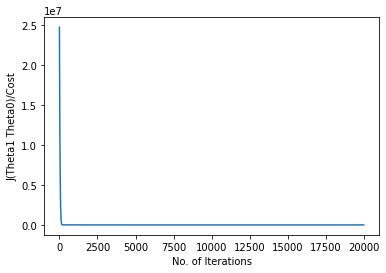

In [85]:
from sklearn.model_selection import train_test_split
model = Sequential()
model.add(Dense(1, input_dim = X.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
history = model.fit(X_train, y_train, epochs=20000)

plt.plot(history.history['loss'])
plt.xlabel("No. of Iterations")
plt.ylabel("J(Theta1 Theta0)/Cost")
plt.show()